In [1]:
from mpl_toolkits import mplot3d
import pandas as pd
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
import pickle
from math import gamma

"""self_norm_sum, self_norm_sum_ast, beta_n, sigma_n, alpha_n, rho_n, max_p(sn_2), min_p(sn_2), beta"""

import time
import concurrent.futures
import random
import os
from scipy.linalg import toeplitz     # to generate toeplitz matrix

def cov_toep(s, q):
    """A function that takes the dependency thresholds $s$ 
    and the dimension $q$ and returns a qxq-toeplitz matrix.
    """
    row = np.array([])
    for k in range(q):
        row = np.append(row, float(s**k))
    return toeplitz(row, row)

def scalar(A,B):
    """Takes two symmetric matrices A and B of sizes q
    and returns the modified frobenius scalar of A and B
    """
    return(np.trace(A.dot(np.transpose(B)))/A.shape[0])


def norm(A):
    """Takes a symmetric matrix A of sizes q
    and returns the norm of A
    This norm is associated to the modified frobenius scalar 
    """
    return np.sqrt(scalar(A,A))

def max_p(M):
    """Largest eigenvalue of a given matrix M"""
    val_p = np.linalg.eigvals(M)
    return max(val_p.real)

def min_p(M):
    """Smallest eigenvalue of a given matrix M that is not null"""
    val_p = np.linalg.eigvals(M)
    val_p = val_p[val_p>=10**-6]
    return min(val_p.real)

def alphaaa1(S_2):
    q = len(S_2)
    I_q = np.diag(np.ones(q))
    sigma2 = scalar(S_2,I_q)
    alpha2 = norm(S_2 - sigma2*I_q)**2
    return alpha2

def alphaaa2(vec):
    q = len(vec)
    I_q = np.diag(np.ones(q))
    S_2 = np.diag(vec)
    sigma2 = scalar(S_2,I_q)
    alpha2 = norm(S_2 - sigma2*I_q)**2
    return alpha2

q_list = list(pickle.load(open("q_list", "rb")))
n_list = list(pickle.load(open("n_list", "rb")))

#def bounding(n, t):
#    return (2*np.exp(3)/9)*((t-n)/2)**(n/2)*np.exp(-(t-n)/2)/gamma((n/2)+1)
#bnd_dict = {}
#for n in n_list:
#    bnd_dict[n] = lambda x : bounding(n, x)


0. **self_norm_sum** (combined version)
1. **self_norm_sum_ast** (penalized version)
2. **beta_n**
3. **sigma_n**
4. **alpha_n** 
5. **rho_n** 
6. **norm1(vp)**\*
7. **norm2(vp)** 
8. **norm3(vp)** 
9. **beta**

\*$ vp =\textrm{valeur prope} = \frac{\lambda_j}{\hat{\rho}_n^{\ast} + \lambda_j} $

In [2]:
#vp_i_d06 = pickle.load(open("vp_collection_d06", "rb"))
#vp_i_d099 = pickle.load(open("vp_collection_d099", "rb"))
#vp_i_d0999999 = pickle.load(open("vp_collection_d0999999", "rb"))
data_i_d06 = pickle.load(open("independent_(d06)", "rb"))
data_i_d099 = pickle.load(open("independent_(d099)", "rb"))
#data_i_d0999999 = pickle.load(open("data_vp_collection_d0999999", "rb"))
#data_id = pickle.load(open("data_vp_collection_id", "rb"))
data_d06 = pickle.load(open("dependent_(d06)", "rb"))
data_d099 = pickle.load(open("dependent_(d099)", "rb"))
#data_d0999999 = pickle.load(open("data_d_s0.999999", "rb"))

FileNotFoundError: [Errno 2] No such file or directory: 'independent_(d06)'


0. **self_norm_sum** (combined version)
1. **self_norm_sum_ast** (penalized version)
2. **beta_n**
3. **sigma_n**
4. **alpha_n** 
5. **rho_n** 
6. **max_p(sn_2)** 
7. **min_p(sn_2)** 
8. **beta**

In [3]:
list(data_i_d06.keys())[3]

(50, 200)

In [3]:
%matplotlib notebook

<IPython.core.display.Javascript object>


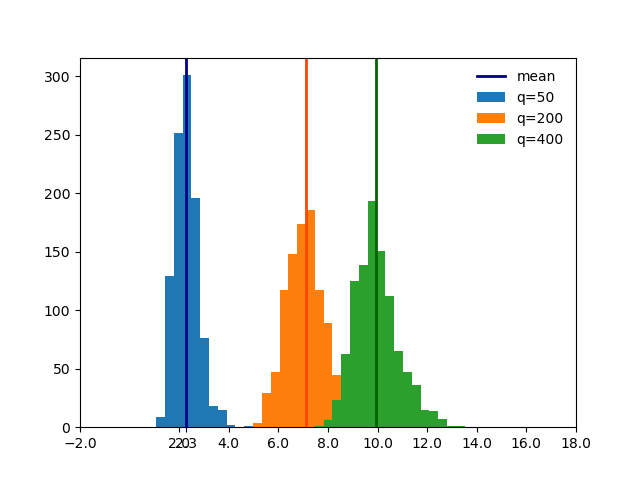

In [19]:
xmin = 0 ; xmax = 16
plt.hist(data_i_d06[list(data_i_d06.keys())[0]][:,5], bins=45, label="q=50", range=[xmin,xmax])
plt.axvline(np.mean(data_i_d06[list(data_i_d06.keys())[0]][:,5]), color="darkblue", alpha=1, label="mean", linewidth=2)
plt.hist(data_i_d06[list(data_i_d06.keys())[3]][:,5], bins=45, label="q=200", range=[xmin,xmax])
plt.axvline(np.mean(data_i_d06[list(data_i_d06.keys())[3]][:,5]),  alpha=1, color="orangered", linewidth=2)
plt.hist(data_i_d06[list(data_i_d06.keys())[7]][:,5], bins=45, label="q=400", range=[xmin,xmax])
plt.axvline(np.mean(data_i_d06[list(data_i_d06.keys())[7]][:,5]), color="darkgreen", alpha=1, linewidth=2)
# plt.legend(loc="upper right")
plt.legend(loc="upper right", facecolor='white', framealpha=0)
# plt.title("rho* - independent case, n=50")
plt.xticks(list(plt.xticks()[0])[:1]+[round(np.mean(data_i_d06[list(data_i_d06.keys())[0]][:,5]),3)]+list(plt.xticks()[0])[2:])
plt.show()

In [103]:
list(data_i_d06.keys()).index((100,400))

21

## Rho - s0.6 - independent vs dependent

<IPython.core.display.Javascript object>


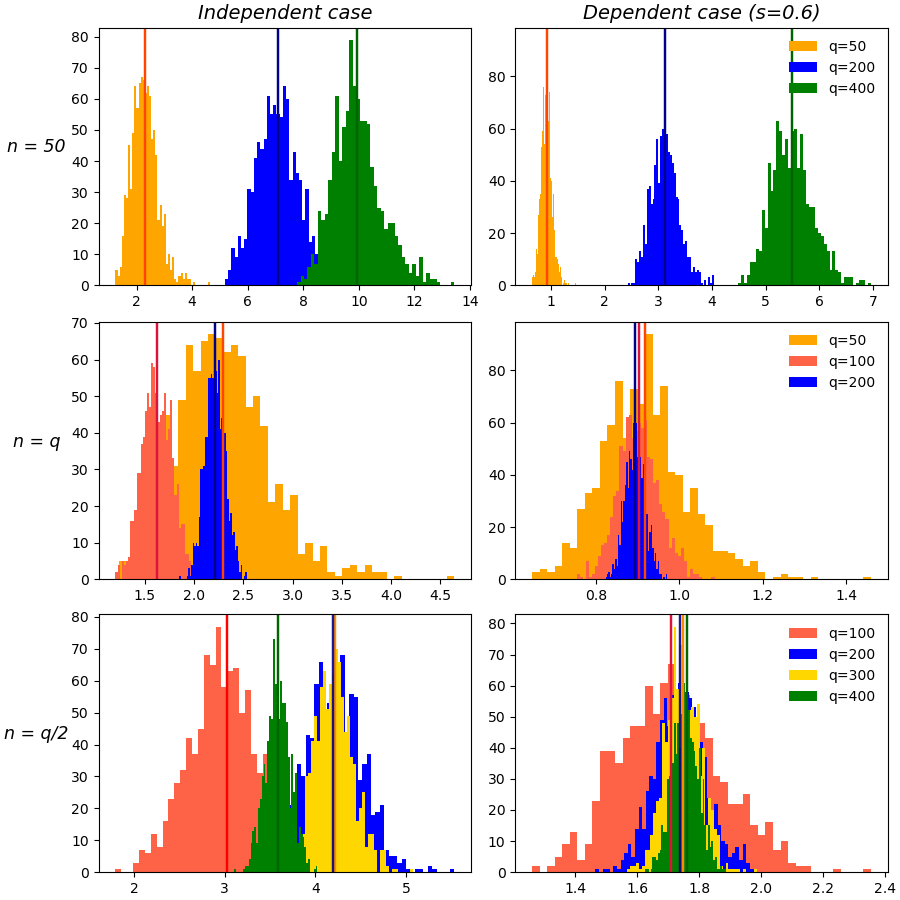

In [22]:
%matplotlib notebook
fig, axs = plt.subplots(3, 2, constrained_layout=True, figsize=(9, 9))
axs = axs.ravel()
# plt.figsize(10, 7)


axs[0].hist(data_i_d06[list(data_i_d06.keys())[0]][:,5], bins=45, label="q=50", color="orange")
axs[0].axvline(np.mean(data_i_d06[list(data_i_d06.keys())[0]][:,5]), color="orangered", alpha=1, linewidth=1.75)
axs[0].hist(data_i_d06[list(data_i_d06.keys())[3]][:,5], bins=45, label="q=200", color="blue")
axs[0].axvline(np.mean(data_i_d06[list(data_i_d06.keys())[3]][:,5]),  alpha=1, color="darkblue", linewidth=1.75)
axs[0].hist(data_i_d06[list(data_i_d06.keys())[7]][:,5], bins=45, label="q=400", color="green")
axs[0].axvline(np.mean(data_i_d06[list(data_i_d06.keys())[7]][:,5]), color="darkgreen", alpha=1, linewidth=1.75)
axs[0].set_ylabel('n = 50', rotation="horizontal", style="italic", fontsize=12.5, labelpad=25)
axs[0].set_title('Independent case', style="italic", fontsize=14)
#axs[0].legend(loc="upper right")

axs[2].hist(data_i_d06[list(data_i_d06.keys())[0]][:,5], bins=45, label="q=50", color="orange")
axs[2].hist(data_i_d06[list(data_i_d06.keys())[15]][:,5], bins=45, label="q=100", color='tomato')
axs[2].hist(data_i_d06[list(data_i_d06.keys())[39]][:,5], bins=45, label="q=200", color="blue")
axs[2].axvline(np.mean(data_i_d06[list(data_i_d06.keys())[0]][:,5]), color="orangered", alpha=1, linewidth=1.75)
axs[2].axvline(np.mean(data_i_d06[list(data_i_d06.keys())[15]][:,5]), color="crimson", alpha=1, linewidth=1.75)
axs[2].axvline(np.mean(data_i_d06[list(data_i_d06.keys())[39]][:,5]), color="darkblue", alpha=1, linewidth=1.75)
axs[2].set_ylabel('n = q', rotation="horizontal", style="italic", fontsize=12.5, labelpad=25)
#axs[2].legend(loc="upper right")

axs[4].hist(data_i_d06[list(data_i_d06.keys())[1]][:,5], bins=45, label="q=100", color='tomato')
axs[4].hist(data_i_d06[list(data_i_d06.keys())[17]][:,5], bins=45, label="q=200", color="blue")
axs[4].hist(data_i_d06[list(data_i_d06.keys())[31]][:,5], bins=45, label="q=300", color="gold")
axs[4].hist(data_i_d06[list(data_i_d06.keys())[43]][:,5], bins=45, label="q=400", color="green")
axs[4].axvline(np.mean(data_i_d06[list(data_i_d06.keys())[1]][:,5]), color="red", alpha=1, linewidth=1.75)

axs[4].axvline(np.mean(data_i_d06[list(data_i_d06.keys())[31]][:,5])+.01, color="darkorange", alpha=1, linewidth=1.75)
axs[4].axvline(np.mean(data_i_d06[list(data_i_d06.keys())[17]][:,5])-.01, color="darkblue", alpha=.9, linewidth=1.75)
axs[4].axvline(np.mean(data_i_d06[list(data_i_d06.keys())[43]][:,5]), color="darkgreen", alpha=1, linewidth=1.75)
axs[4].set_ylabel('n = q/2', rotation="horizontal", style="italic", fontsize=12.5, labelpad=25)
#axs[4].legend(loc="upper right")

axs[1].hist(data_d06[list(data_d06.keys())[0]][:,5], bins=45, label="q=50", color="orange")
axs[1].hist(data_d06[list(data_d06.keys())[3]][:,5], bins=45, label="q=200", color="blue")
axs[1].hist(data_d06[list(data_d06.keys())[7]][:,5], bins=45, label="q=400", color="green")
axs[1].axvline(np.mean(data_d06[list(data_d06.keys())[0]][:,5]), color="orangered", alpha=1, linewidth=1.75)
axs[1].axvline(np.mean(data_d06[list(data_d06.keys())[3]][:,5]), color="darkblue", alpha=1, linewidth=1.75)
axs[1].axvline(np.mean(data_d06[list(data_d06.keys())[7]][:,5]), color="darkgreen", alpha=1, linewidth=1.75)
axs[1].legend(loc="upper right", facecolor='white', framealpha=0)
axs[1].set_title('Dependent case (s=0.6)', style="italic", fontsize=14)

axs[3].hist(data_d06[list(data_d06.keys())[0]][:,5], bins=45, label="q=50", color="orange")
axs[3].hist(data_d06[list(data_d06.keys())[15]][:,5], bins=45, label="q=100", color='tomato')
axs[3].hist(data_d06[list(data_d06.keys())[39]][:,5], bins=45, label="q=200", color="blue")
axs[3].axvline(np.mean(data_d06[list(data_d06.keys())[0]][:,5]), color="orangered", alpha=1, linewidth=1.75)
axs[3].axvline(np.mean(data_d06[list(data_d06.keys())[15]][:,5]), color="crimson", alpha=1, linewidth=1.75)
axs[3].axvline(np.mean(data_d06[list(data_d06.keys())[39]][:,5])-.0001, color="darkblue", alpha=1, linewidth=1.75)
axs[3].legend(loc="upper right", facecolor='white', framealpha=0)

axs[5].hist(data_d06[list(data_d06.keys())[1]][:,5], bins=45, label="q=100", color='tomato')
axs[5].hist(data_d06[list(data_d06.keys())[17]][:,5], bins=45, label="q=200", color="blue")
axs[5].hist(data_d06[list(data_d06.keys())[31]][:,5], bins=45, label="q=300", color="gold")
axs[5].hist(data_d06[list(data_d06.keys())[43]][:,5], bins=45, label="q=400", color="green")
axs[5].axvline(np.mean(data_d06[list(data_d06.keys())[1]][:,5]), color="crimson", alpha=1, linewidth=1.75)
axs[5].axvline(np.mean(data_d06[list(data_d06.keys())[17]][:,5]), color="darkblue", alpha=.9, linewidth=1.75)
axs[5].axvline(np.mean(data_d06[list(data_d06.keys())[31]][:,5]), color="darkorange", alpha=1, linewidth=1.75)
axs[5].axvline(np.mean(data_d06[list(data_d06.keys())[43]][:,5])+.005, color="darkgreen", alpha=1, linewidth=1.75)
axs[5].legend(loc="upper right", facecolor='white', framealpha=0)
#plt.title("rho = dependent case, s=0.6, n=2q")

#handles, labels = axs.get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper center')
plt.show()

## Rho - s0.99 - independent vs dependent

<IPython.core.display.Javascript object>


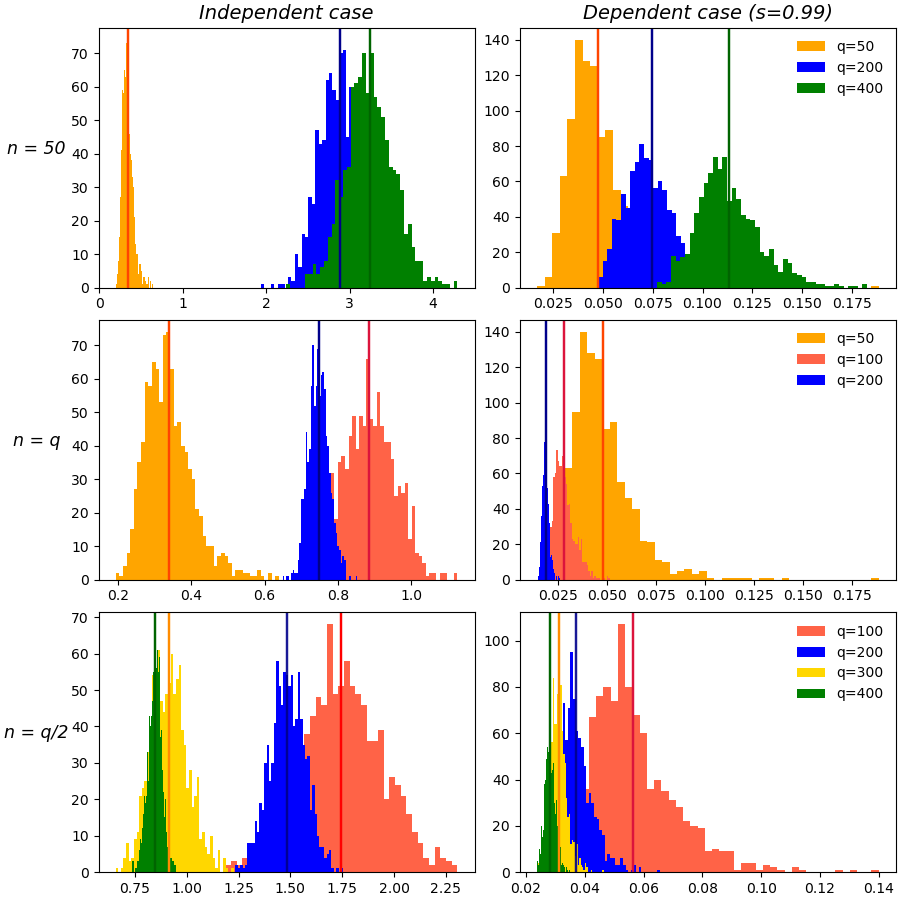

In [23]:
%matplotlib notebook
fig, axs = plt.subplots(3, 2, constrained_layout=True, figsize=(9, 9))
axs = axs.ravel()
# plt.rcParams['figure.figsize'] = [10, 7]

axs[0].hist(data_i_d099[list(data_i_d099.keys())[0]][:,5], bins=45, label="q=50", color="orange")
axs[0].axvline(np.mean(data_i_d099[list(data_i_d099.keys())[0]][:,5]), color="orangered", alpha=1, linewidth=1.75)
axs[0].hist(data_i_d099[list(data_i_d099.keys())[3]][:,5], bins=45, label="q=200", color="blue")
axs[0].axvline(np.mean(data_i_d099[list(data_i_d099.keys())[3]][:,5]),  alpha=1, color="darkblue", linewidth=1.75)
axs[0].hist(data_i_d099[list(data_i_d099.keys())[7]][:,5], bins=45, label="q=400", color="green")
axs[0].axvline(np.mean(data_i_d099[list(data_i_d099.keys())[7]][:,5]), color="darkgreen", alpha=1, linewidth=1.75)
axs[0].set_ylabel('n = 50', rotation="horizontal", style="italic", fontsize=12.5, labelpad=25)
axs[0].set_title('Independent case', style="italic", fontsize=14)
#axs[0].legend(loc="upper right")

axs[2].hist(data_i_d099[list(data_i_d099.keys())[0]][:,5], bins=45, label="q=50", color="orange")
axs[2].hist(data_i_d099[list(data_i_d099.keys())[15]][:,5], bins=45, label="q=100", color='tomato')
axs[2].hist(data_i_d099[list(data_i_d099.keys())[39]][:,5], bins=45, label="q=200", color="blue")
axs[2].axvline(np.mean(data_i_d099[list(data_i_d099.keys())[0]][:,5]), color="orangered", alpha=1, linewidth=1.75)
axs[2].axvline(np.mean(data_i_d099[list(data_i_d099.keys())[15]][:,5]), color="crimson", alpha=1, linewidth=1.75)
axs[2].axvline(np.mean(data_i_d099[list(data_i_d099.keys())[39]][:,5]), color="darkblue", alpha=1, linewidth=1.75)
axs[2].set_ylabel('n = q', rotation="horizontal", style="italic", fontsize=12.5, labelpad=25)
#axs[2].legend(loc="upper right")

axs[4].hist(data_i_d099[list(data_i_d099.keys())[1]][:,5], bins=45, label="q=100", color='tomato')
axs[4].hist(data_i_d099[list(data_i_d099.keys())[17]][:,5], bins=45, label="q=200", color="blue")
axs[4].hist(data_i_d099[list(data_i_d099.keys())[31]][:,5], bins=45, label="q=300", color="gold")
axs[4].hist(data_i_d099[list(data_i_d099.keys())[43]][:,5], bins=45, label="q=400", color="green")
axs[4].axvline(np.mean(data_i_d099[list(data_i_d099.keys())[1]][:,5]), color="red", alpha=1, linewidth=1.75)

axs[4].axvline(np.mean(data_i_d099[list(data_i_d099.keys())[31]][:,5]), color="darkorange", alpha=1, linewidth=1.75)
axs[4].axvline(np.mean(data_i_d099[list(data_i_d099.keys())[17]][:,5]), color="darkblue", alpha=.9, linewidth=1.75)
axs[4].axvline(np.mean(data_i_d099[list(data_i_d099.keys())[43]][:,5]), color="darkgreen", alpha=1, linewidth=1.75)
axs[4].set_ylabel('n = q/2', rotation="horizontal", style="italic", fontsize=12.5, labelpad=25)
#axs[4].legend(loc="upper right")

axs[1].hist(data_d099[list(data_d099.keys())[0]][:,5], bins=45, label="q=50", color="orange")
axs[1].hist(data_d099[list(data_d099.keys())[3]][:,5], bins=45, label="q=200", color="blue")
axs[1].hist(data_d099[list(data_d099.keys())[7]][:,5], bins=45, label="q=400", color="green")
axs[1].axvline(np.mean(data_d099[list(data_d099.keys())[0]][:,5]), color="orangered", alpha=1, linewidth=1.75)
axs[1].axvline(np.mean(data_d099[list(data_d099.keys())[3]][:,5]), color="darkblue", alpha=1, linewidth=1.75)
axs[1].axvline(np.mean(data_d099[list(data_d099.keys())[7]][:,5]), color="darkgreen", alpha=1, linewidth=1.75)
axs[1].legend(loc="upper right", facecolor='white', framealpha=0)
axs[1].set_title('Dependent case (s=0.99)', style="italic", fontsize=14)

axs[3].hist(data_d099[list(data_d099.keys())[0]][:,5], bins=45, label="q=50", color="orange")
axs[3].hist(data_d099[list(data_d099.keys())[15]][:,5], bins=45, label="q=100", color='tomato')
axs[3].hist(data_d099[list(data_d099.keys())[39]][:,5], bins=45, label="q=200", color="blue")
axs[3].axvline(np.mean(data_d099[list(data_d099.keys())[0]][:,5]), color="orangered", alpha=1, linewidth=1.75)
axs[3].axvline(np.mean(data_d099[list(data_d099.keys())[15]][:,5]), color="crimson", alpha=1, linewidth=1.75)
axs[3].axvline(np.mean(data_d099[list(data_d099.keys())[39]][:,5]), color="darkblue", alpha=1, linewidth=1.75)
axs[3].legend(loc="upper right", facecolor='white', framealpha=0)

axs[5].hist(data_d099[list(data_d099.keys())[1]][:,5], bins=45, label="q=100", color='tomato')
axs[5].hist(data_d099[list(data_d099.keys())[17]][:,5], bins=45, label="q=200", color="blue")
axs[5].hist(data_d099[list(data_d099.keys())[31]][:,5], bins=45, label="q=300", color="gold")
axs[5].hist(data_d099[list(data_d099.keys())[43]][:,5], bins=45, label="q=400", color="green")
axs[5].axvline(np.mean(data_d099[list(data_d099.keys())[1]][:,5]), color="crimson", alpha=1, linewidth=1.75)
axs[5].axvline(np.mean(data_d099[list(data_d099.keys())[17]][:,5]), color="darkblue", alpha=.9, linewidth=1.75)
axs[5].axvline(np.mean(data_d099[list(data_d099.keys())[31]][:,5]), color="darkorange", alpha=1, linewidth=1.75)
axs[5].axvline(np.mean(data_d099[list(data_d099.keys())[43]][:,5]), color="darkgreen", alpha=1, linewidth=1.75)
axs[5].legend(loc="upper right", facecolor='white', framealpha=0)
#plt.title("rho = dependent case, s=0.6, n=2q")

#handles, labels = axs.get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper center')
plt.show()

## Sns - s0.6 - independent vs dependent

In [26]:
xmin_i = min([min(data_i_d06[list(data_i_d06.keys())[k]][:,1]) for k in [0,3,7,15,39,1,17,31,39,43]])
xmin_d = min([min(data_d06[list(data_d06.keys())[k]][:,1]) for k in [0,3,7,15,39,1,17,31,39,43]])
xmax_i = max([max(data_i_d06[list(data_i_d06.keys())[k]][:,1]) for k in [0,3,7,15,39,1,17,31,39,43]])
xmax_d = max([max(data_d06[list(data_d06.keys())[k]][:,1]) for k in [0,3,7,15,39,1,17,31,39,43]])
xmin, xmax = min(xmin_i, xmin_d), max(xmax_i, xmax_d) ; limits = [xmin, xmax]
print(limits)

[7.107643981984153, 191.29472951875638]


<IPython.core.display.Javascript object>


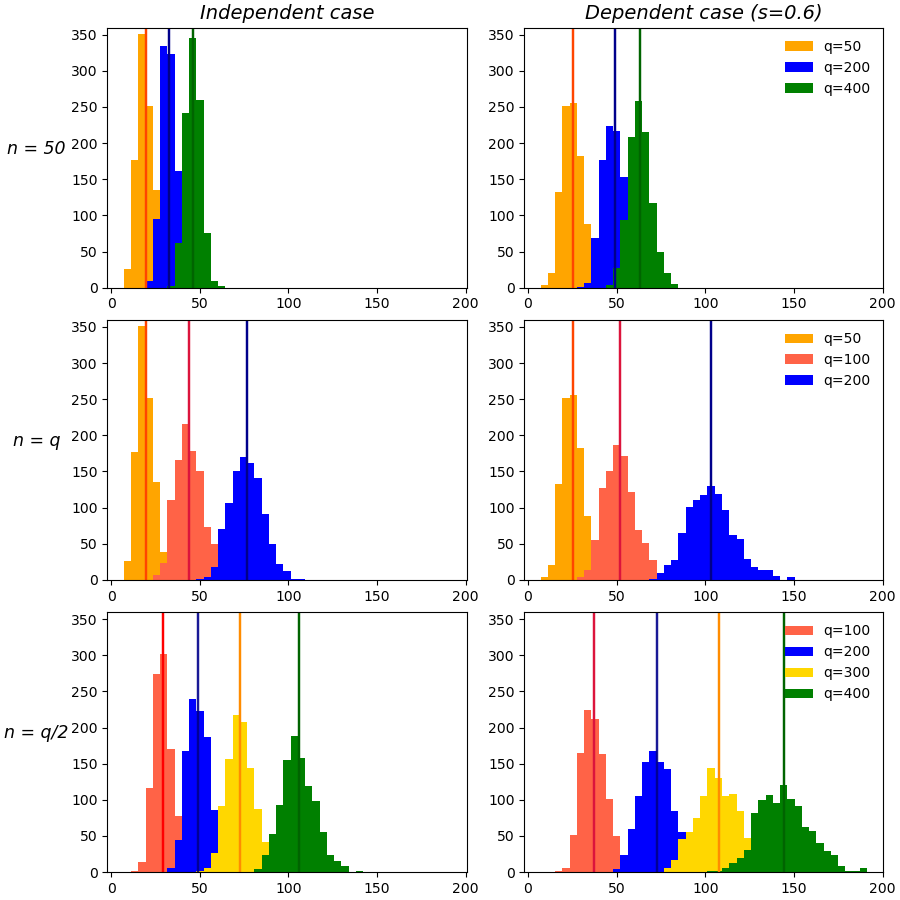

In [27]:
ymax = 360


%matplotlib notebook
fig, axs = plt.subplots(3, 2, constrained_layout=True, figsize=(9, 9))
axs = axs.ravel()

axs[0].hist(data_i_d06[list(data_i_d06.keys())[0]][:,1], bins=45, label="q=50", color="orange", range=[xmin,xmax])
axs[0].axvline(np.mean(data_i_d06[list(data_i_d06.keys())[0]][:,1]), color="orangered", alpha=1, linewidth=1.75)
axs[0].hist(data_i_d06[list(data_i_d06.keys())[3]][:,1], bins=45, label="q=200", color="blue", range=[xmin,xmax])
axs[0].axvline(np.mean(data_i_d06[list(data_i_d06.keys())[3]][:,1]),  alpha=1, color="darkblue", linewidth=1.75)
axs[0].hist(data_i_d06[list(data_i_d06.keys())[7]][:,1], bins=45, label="q=400", color="green", range=[xmin,xmax])
axs[0].axvline(np.mean(data_i_d06[list(data_i_d06.keys())[7]][:,1]), color="darkgreen", alpha=1, linewidth=1.75)
axs[0].set_ylim(top=ymax, bottom=0)
axs[0].set_ylabel('n = 50', rotation="horizontal", style="italic", fontsize=12.5, labelpad=25)
axs[0].set_title('Independent case', style="italic", fontsize=14)
#axs[0].legend(loc="upper right")

axs[2].hist(data_i_d06[list(data_i_d06.keys())[0]][:,1], bins=45, label="q=50", color="orange", range=[xmin,xmax])
axs[2].hist(data_i_d06[list(data_i_d06.keys())[15]][:,1], bins=45, label="q=100", color='tomato', range=[xmin,xmax])
axs[2].hist(data_i_d06[list(data_i_d06.keys())[39]][:,1], bins=45, label="q=200", color="blue", range=[xmin,xmax])
axs[2].axvline(np.mean(data_i_d06[list(data_i_d06.keys())[0]][:,1]), color="orangered", alpha=1, linewidth=1.75)
axs[2].axvline(np.mean(data_i_d06[list(data_i_d06.keys())[15]][:,1]), color="crimson", alpha=1, linewidth=1.75)
axs[2].axvline(np.mean(data_i_d06[list(data_i_d06.keys())[39]][:,1]), color="darkblue", alpha=1, linewidth=1.75)
axs[2].set_ylim(top=ymax, bottom=0)
axs[2].set_ylabel('n = q', rotation="horizontal", style="italic", fontsize=12.5, labelpad=25)
#axs[2].legend(loc="upper right")

axs[4].hist(data_i_d06[list(data_i_d06.keys())[1]][:,1], bins=45, label="q=100", color='tomato', range=[xmin,xmax])
axs[4].hist(data_i_d06[list(data_i_d06.keys())[17]][:,1], bins=45, label="q=200", color="blue", range=[xmin,xmax])
axs[4].hist(data_i_d06[list(data_i_d06.keys())[31]][:,1], bins=45, label="q=300", color="gold", range=[xmin,xmax])
axs[4].hist(data_i_d06[list(data_i_d06.keys())[43]][:,1], bins=45, label="q=400", color="green", range=[xmin,xmax])
axs[4].axvline(np.mean(data_i_d06[list(data_i_d06.keys())[1]][:,1]), color="red", alpha=1, linewidth=1.75)
axs[4].axvline(np.mean(data_i_d06[list(data_i_d06.keys())[31]][:,1]), color="darkorange", alpha=1, linewidth=1.75)
axs[4].axvline(np.mean(data_i_d06[list(data_i_d06.keys())[17]][:,1]), color="darkblue", alpha=.9, linewidth=1.75)
axs[4].axvline(np.mean(data_i_d06[list(data_i_d06.keys())[43]][:,1]), color="darkgreen", alpha=1, linewidth=1.75)
axs[4].set_ylim(top=ymax, bottom=0)
axs[4].set_ylabel('n = q/2', rotation="horizontal", style="italic", fontsize=12.5, labelpad=25)
#axs[4].legend(loc="upper right")

axs[1].hist(data_d06[list(data_d06.keys())[0]][:,1], bins=45, label="q=50", color="orange", range=[xmin,xmax])
axs[1].hist(data_d06[list(data_d06.keys())[3]][:,1], bins=45, label="q=200", color="blue", range=[xmin,xmax])
axs[1].hist(data_d06[list(data_d06.keys())[7]][:,1], bins=45, label="q=400", color="green", range=[xmin,xmax])
axs[1].axvline(np.mean(data_d06[list(data_d06.keys())[0]][:,1]), color="orangered", alpha=1, linewidth=1.75)
axs[1].axvline(np.mean(data_d06[list(data_d06.keys())[3]][:,1]), color="darkblue", alpha=1, linewidth=1.75)
axs[1].axvline(np.mean(data_d06[list(data_d06.keys())[7]][:,1]), color="darkgreen", alpha=1, linewidth=1.75)
axs[1].set_ylim(top=ymax, bottom=0)
axs[1].legend(loc="upper right", facecolor='white', framealpha=0)
axs[1].set_title('Dependent case (s=0.6)', style="italic", fontsize=14)

axs[3].hist(data_d06[list(data_d06.keys())[0]][:,1], bins=45, label="q=50", color="orange", range=[xmin,xmax])
axs[3].hist(data_d06[list(data_d06.keys())[15]][:,1], bins=45, label="q=100", color='tomato', range=[xmin,xmax])
axs[3].hist(data_d06[list(data_d06.keys())[39]][:,1], bins=45, label="q=200", color="blue", range=[xmin,xmax])
axs[3].axvline(np.mean(data_d06[list(data_d06.keys())[0]][:,1]), color="orangered", alpha=1, linewidth=1.75)
axs[3].axvline(np.mean(data_d06[list(data_d06.keys())[15]][:,1]), color="crimson", alpha=1, linewidth=1.75)
axs[3].axvline(np.mean(data_d06[list(data_d06.keys())[39]][:,1]), color="darkblue", alpha=1, linewidth=1.75)
axs[3].set_ylim(top=ymax, bottom=0)
axs[3].legend(loc="upper right", facecolor='white', framealpha=0)

axs[5].hist(data_d06[list(data_d06.keys())[1]][:,1], bins=45, label="q=100", color='tomato', range=[xmin,xmax])
axs[5].hist(data_d06[list(data_d06.keys())[17]][:,1], bins=45, label="q=200", color="blue", range=[xmin,xmax])
axs[5].hist(data_d06[list(data_d06.keys())[31]][:,1], bins=45, label="q=300", color="gold", range=[xmin,xmax])
axs[5].hist(data_d06[list(data_d06.keys())[43]][:,1], bins=45, label="q=400", color="green", range=[xmin,xmax])
axs[5].axvline(np.mean(data_d06[list(data_d06.keys())[1]][:,1]), color="crimson", alpha=1, linewidth=1.75)
axs[5].axvline(np.mean(data_d06[list(data_d06.keys())[17]][:,1]), color="darkblue", alpha=.9, linewidth=1.75)
axs[5].axvline(np.mean(data_d06[list(data_d06.keys())[31]][:,1]), color="darkorange", alpha=1, linewidth=1.75)
axs[5].axvline(np.mean(data_d06[list(data_d06.keys())[43]][:,1]), color="darkgreen", alpha=1, linewidth=1.75)
axs[5].set_ylim(top=ymax, bottom=0)
axs[5].legend(loc="upper right", facecolor='white', framealpha=0)
#plt.title("rho = dependent case, s=0.6, n=2q")

#handles, labels = axs.get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper center')
plt.show()

## Sns - s0.99 - independent vs dependent

In [28]:
xmin_i = min([min(data_i_d099[list(data_i_d099.keys())[k]][:,1]) for k in [0,3,7,15,39,1,17,31,39,43]])
xmin_d = min([min(data_d099[list(data_d099.keys())[k]][:,1]) for k in [0,3,7,15,39,1,17,31,39,43]])
xmax_i = max([max(data_i_d099[list(data_i_d099.keys())[k]][:,1]) for k in [0,3,7,15,39,1,17,31,39,43]])
xmax_d = max([max(data_d099[list(data_d099.keys())[k]][:,1]) for k in [0,3,7,15,39,1,17,31,39,43]])
xmin, xmax = min(xmin_i, xmin_d), max(xmax_i, xmax_d) ; limits = [xmin, xmax]
print(limits)

[5.756894646866307, 530.8674856476084]


<IPython.core.display.Javascript object>


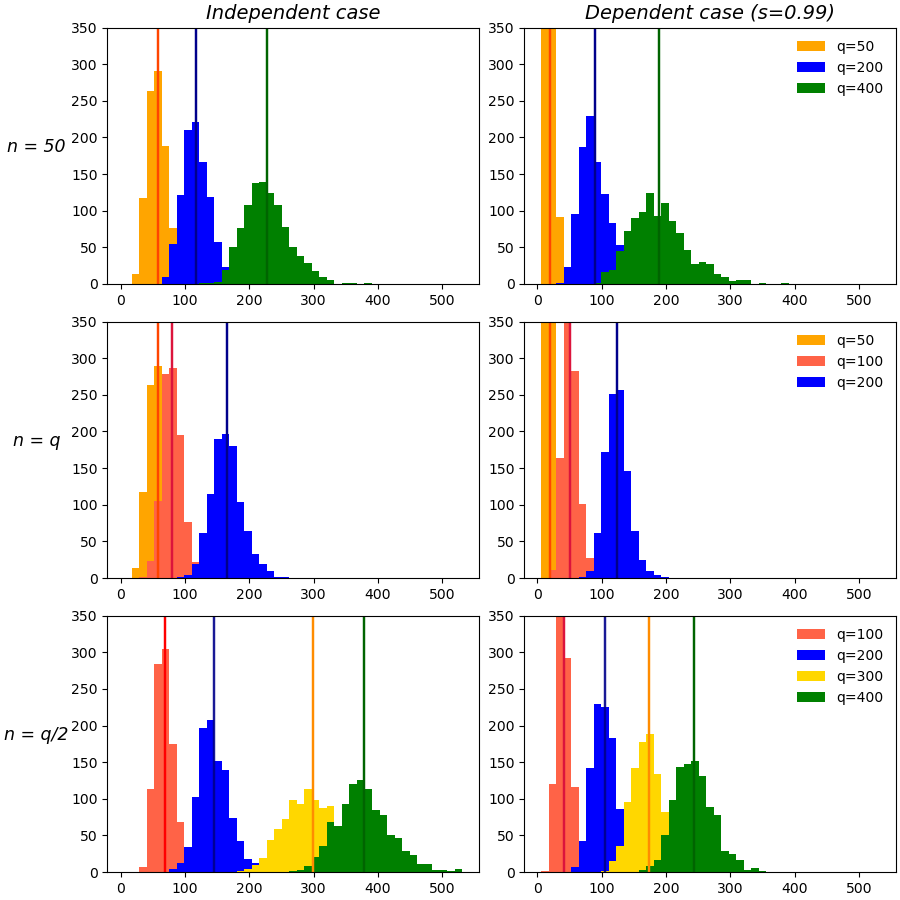

In [29]:
ymax = 350

%matplotlib notebook
fig, axs = plt.subplots(3, 2, constrained_layout=True, figsize=(9, 9))
axs = axs.ravel()

axs[0].hist(data_i_d099[list(data_i_d099.keys())[0]][:,1], bins=45, label="q=50", color="orange", range=[xmin,xmax])
axs[0].axvline(np.mean(data_i_d099[list(data_i_d099.keys())[0]][:,1]), color="orangered", alpha=1, linewidth=1.75)
axs[0].hist(data_i_d099[list(data_i_d099.keys())[3]][:,1], bins=45, label="q=200", color="blue", range=[xmin,xmax])
axs[0].axvline(np.mean(data_i_d099[list(data_i_d099.keys())[3]][:,1]),  alpha=1, color="darkblue", linewidth=1.75)
axs[0].hist(data_i_d099[list(data_i_d099.keys())[7]][:,1], bins=45, label="q=400", color="green", range=[xmin,xmax])
axs[0].axvline(np.mean(data_i_d099[list(data_i_d099.keys())[7]][:,1]), color="darkgreen", alpha=1, linewidth=1.75)
axs[0].set_ylim(top=ymax, bottom=0)
axs[0].set_ylabel('n = 50', rotation="horizontal", style="italic", fontsize=12.5, labelpad=25)
axs[0].set_title('Independent case', style="italic", fontsize=14)
#axs[0].legend(loc="upper right")

axs[2].hist(data_i_d099[list(data_i_d099.keys())[0]][:,1], bins=45, label="q=50", color="orange", range=[xmin,xmax])
axs[2].hist(data_i_d099[list(data_i_d099.keys())[15]][:,1], bins=45, label="q=100", color='tomato', range=[xmin,xmax])
axs[2].hist(data_i_d099[list(data_i_d099.keys())[39]][:,1], bins=45, label="q=200", color="blue", range=[xmin,xmax])
axs[2].axvline(np.mean(data_i_d099[list(data_i_d099.keys())[0]][:,1]), color="orangered", alpha=1, linewidth=1.75)
axs[2].axvline(np.mean(data_i_d099[list(data_i_d099.keys())[15]][:,1]), color="crimson", alpha=1, linewidth=1.75)
axs[2].axvline(np.mean(data_i_d099[list(data_i_d099.keys())[39]][:,1]), color="darkblue", alpha=1, linewidth=1.75)
axs[2].set_ylim(top=ymax, bottom=0)
axs[2].set_ylabel('n = q', rotation="horizontal", style="italic", fontsize=12.5, labelpad=25)
#axs[2].legend(loc="upper right")

axs[4].hist(data_i_d099[list(data_i_d099.keys())[1]][:,1], bins=45, label="q=100", color='tomato', range=[xmin,xmax])
axs[4].hist(data_i_d099[list(data_i_d099.keys())[17]][:,1], bins=45, label="q=200", color="blue", range=[xmin,xmax])
axs[4].hist(data_i_d099[list(data_i_d099.keys())[31]][:,1], bins=45, label="q=300", color="gold", range=[xmin,xmax])
axs[4].hist(data_i_d099[list(data_i_d099.keys())[43]][:,1], bins=45, label="q=400", color="green", range=[xmin,xmax])
axs[4].axvline(np.mean(data_i_d099[list(data_i_d099.keys())[1]][:,1]), color="red", alpha=1, linewidth=1.75)
axs[4].axvline(np.mean(data_i_d099[list(data_i_d099.keys())[31]][:,1]), color="darkorange", alpha=1, linewidth=1.75)
axs[4].axvline(np.mean(data_i_d099[list(data_i_d099.keys())[17]][:,1]), color="darkblue", alpha=.9, linewidth=1.75)
axs[4].axvline(np.mean(data_i_d099[list(data_i_d099.keys())[43]][:,1]), color="darkgreen", alpha=1, linewidth=1.75)
axs[4].set_ylim(top=ymax, bottom=0)
axs[4].set_ylabel('n = q/2', rotation="horizontal", style="italic", fontsize=12.5, labelpad=25)
#axs[4].legend(loc="upper right")

axs[1].hist(data_d099[list(data_d099.keys())[0]][:,1], bins=45, label="q=50", color="orange", range=[xmin,xmax])
axs[1].hist(data_d099[list(data_d099.keys())[3]][:,1], bins=45, label="q=200", color="blue", range=[xmin,xmax])
axs[1].hist(data_d099[list(data_d099.keys())[7]][:,1], bins=45, label="q=400", color="green", range=[xmin,xmax])
axs[1].axvline(np.mean(data_d099[list(data_d099.keys())[0]][:,1]), color="orangered", alpha=1, linewidth=1.75)
axs[1].axvline(np.mean(data_d099[list(data_d099.keys())[3]][:,1]), color="darkblue", alpha=1, linewidth=1.75)
axs[1].axvline(np.mean(data_d099[list(data_d099.keys())[7]][:,1]), color="darkgreen", alpha=1, linewidth=1.75)
axs[1].set_ylim(top=ymax, bottom=0)
axs[1].legend(loc="upper right", facecolor='white', framealpha=0)
axs[1].set_title('Dependent case (s=0.99)', style="italic", fontsize=14)

axs[3].hist(data_d099[list(data_d099.keys())[0]][:,1], bins=45, label="q=50", color="orange", range=[xmin,xmax])
axs[3].hist(data_d099[list(data_d099.keys())[15]][:,1], bins=45, label="q=100", color='tomato', range=[xmin,xmax])
axs[3].hist(data_d099[list(data_d099.keys())[39]][:,1], bins=45, label="q=200", color="blue", range=[xmin,xmax])
axs[3].axvline(np.mean(data_d099[list(data_d099.keys())[0]][:,1]), color="orangered", alpha=1, linewidth=1.75)
axs[3].axvline(np.mean(data_d099[list(data_d099.keys())[15]][:,1]), color="crimson", alpha=1, linewidth=1.75)
axs[3].axvline(np.mean(data_d099[list(data_d099.keys())[39]][:,1]), color="darkblue", alpha=1, linewidth=1.75)
axs[3].set_ylim(top=ymax, bottom=0)
axs[3].legend(loc="upper right", facecolor='white', framealpha=0)

axs[5].hist(data_d099[list(data_d099.keys())[1]][:,1], bins=45, label="q=100", color='tomato', range=[xmin,xmax])
axs[5].hist(data_d099[list(data_d099.keys())[17]][:,1], bins=45, label="q=200", color="blue", range=[xmin,xmax])
axs[5].hist(data_d099[list(data_d099.keys())[31]][:,1], bins=45, label="q=300", color="gold", range=[xmin,xmax])
axs[5].hist(data_d099[list(data_d099.keys())[43]][:,1], bins=45, label="q=400", color="green", range=[xmin,xmax])
axs[5].axvline(np.mean(data_d099[list(data_d099.keys())[1]][:,1]), color="crimson", alpha=1, linewidth=1.75)
axs[5].axvline(np.mean(data_d099[list(data_d099.keys())[17]][:,1]), color="darkblue", alpha=.9, linewidth=1.75)
axs[5].axvline(np.mean(data_d099[list(data_d099.keys())[31]][:,1]), color="darkorange", alpha=1, linewidth=1.75)
axs[5].axvline(np.mean(data_d099[list(data_d099.keys())[43]][:,1]), color="darkgreen", alpha=1, linewidth=1.75)
axs[5].set_ylim(top=ymax, bottom=0)
axs[5].legend(loc="upper right", facecolor='white', framealpha=0)
#plt.title("rho = dependent case, s=0.6, n=2q")

#handles, labels = axs.get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper center')
plt.show()

---
---
<center><h2>Self normalized sums</h2></center>

---
---

## Behavior of tail distribution and exponantial bound

### Small value of eigenvalues dispersion s = 0.6

At left, x abcisses are varying from  3.5538219909920765  to  69.4101672997359
At right x abcisses are varying from  4.943290704135637  to  95.64736475937819


<IPython.core.display.Javascript object>


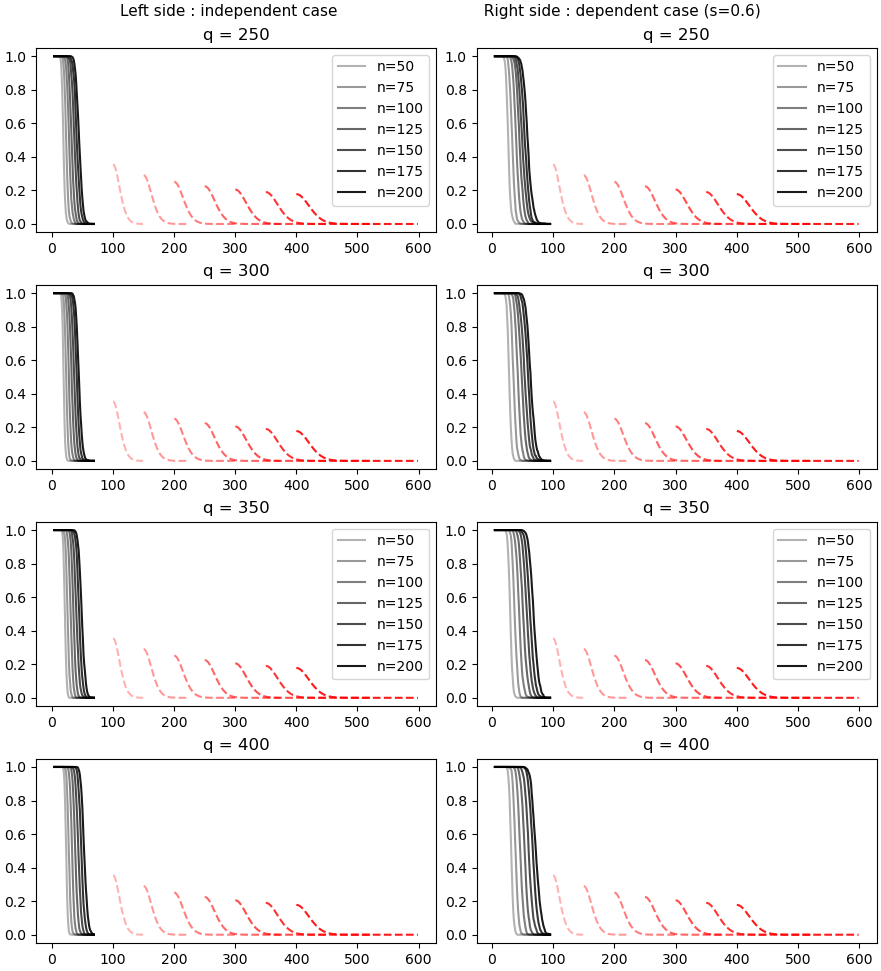

In [107]:
sns_i06 = {}
for q in q_list:
    sns_i06[q]=[(k[0],s[:,1]/2) for k,s in data_i_d06.items() if k[1]==q]
    

self_collection = {}
self_collection = dict([(q,[i[1] for i in sns_i06[q]]) for q in q_list])

min_v = min([min(j) for i in self_collection.values() for j in i])
max_v = max([max(j) for i in self_collection.values() for j in i])
print("At left, x abcisses are varying from ", min_v, " to ", max_v)

sns_d06 = {}
for q in q_list:
    sns_d06[q]=[(k[0],s[:,1]/2) for k,s in data_d06.items() if k[1]==q]
    

self_collection2 = {}
self_collection2 = dict([(q,[i[1] for i in sns_d06[q]]) for q in q_list])

min_v2 = min([min(j) for i in self_collection2.values() for j in i])
max_v2 = max([max(j) for i in self_collection2.values() for j in i])
print("At right x abcisses are varying from ", min_v2, " to ", max_v2)

%matplotlib notebook
fig, axs = plt.subplots(4, 2, constrained_layout=True)
axs = axs.ravel()

for j, q in enumerate(q_list[4:]) :
    elem = self_collection[q]
    for i in range(0,len(elem),1):
        n = n_list[i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        axs[2*j].plot(np.arange(min_v,max_v,1), 
                 list(map(cum_tail, np.arange(min_v,max_v,1))), label="n="+str(n),
                color="black", alpha=0.3 + 0.7*(i/k))
        axs[2*j].set_title('q = '+str(q))
        axs[2*j].plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", color="red", alpha=0.3 + 0.7*(i/k))
    if j%2==0: axs[2*j].legend(loc="upper right")

for j, q in enumerate(q_list[4:]) :
    elem = self_collection2[q]
    for i in range(0,len(elem),1):
        n = n_list[i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        axs[2*j+1].plot(np.arange(min_v2,max_v2,1), 
                 list(map(cum_tail, np.arange(min_v2,max_v2,1))), label="n="+str(n),
                color="black", alpha=0.3 + 0.7*(i/k))
        axs[2*j+1].set_title('q = '+str(q))
        axs[2*j+1].plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", color="red", alpha=0.3 + 0.7*(i/k))
    if j%2==0: axs[2*j+1].legend(loc="upper right")

fig.suptitle("Self normalized sums \n Left side : independent case                         Right side : dependent case (s=0.6)", size=11)

At left, x abcisses are varying from  3.5538219909920765  to  69.4101672997359
At right x abcisses are varying from  4.943290704135637  to  95.64736475937819


<IPython.core.display.Javascript object>


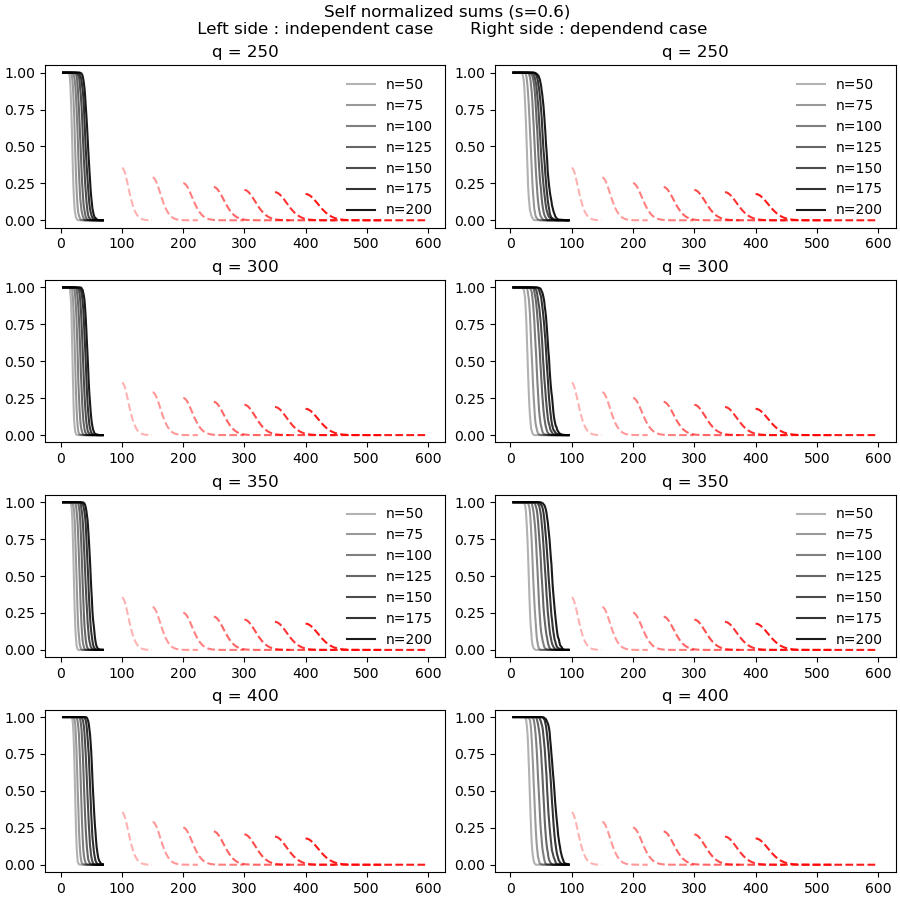

Text(0.5, 0.98, 'Self normalized sums (s=0.6) \n Left side : independent case       Right side : dependend case')

In [4]:
sns_i06 = {}
for q in q_list:
    sns_i06[q]=[(k[0],s[:,1]/2) for k,s in data_i_d06.items() if k[1]==q]
    

self_collection = {}
self_collection = dict([(q,[i[1] for i in sns_i06[q]]) for q in q_list])

min_v = min([min(j) for i in self_collection.values() for j in i])
max_v = max([max(j) for i in self_collection.values() for j in i])
print("At left, x abcisses are varying from ", min_v, " to ", max_v)

sns_d06 = {}
for q in q_list:
    sns_d06[q]=[(k[0],s[:,1]/2) for k,s in data_d06.items() if k[1]==q]
    

self_collection2 = {}
self_collection2 = dict([(q,[i[1] for i in sns_d06[q]]) for q in q_list])

min_v2 = min([min(j) for i in self_collection2.values() for j in i])
max_v2 = max([max(j) for i in self_collection2.values() for j in i])
print("At right x abcisses are varying from ", min_v2, " to ", max_v2)

%matplotlib notebook
fig, axs = plt.subplots(4, 2, constrained_layout=True, figsize=(9, 9))
axs = axs.ravel()

for j, q in enumerate(q_list[4:]) :
    elem = self_collection[q]
    for i in range(0,len(elem),1):
        n = n_list[i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        axs[2*j].plot(np.arange(min_v,max_v,1), 
                 list(map(cum_tail, np.arange(min_v,max_v,1))), label="n="+str(n),
                color="black", alpha=0.3 + 0.7*(i/k))
        axs[2*j].set_title('q = '+str(q))
        axs[2*j].plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", color="red", alpha=0.3 + 0.7*(i/k))
    if j%2==0: axs[2*j].legend(loc="upper right", facecolor='white', framealpha=0)

for j, q in enumerate(q_list[4:]) :
    elem = self_collection2[q]
    for i in range(0,len(elem),1):
        n = n_list[i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        axs[2*j+1].plot(np.arange(min_v2,max_v2,1), 
                 list(map(cum_tail, np.arange(min_v2,max_v2,1))), label="n="+str(n),
                color="black", alpha=0.3 + 0.7*(i/k))
        axs[2*j+1].set_title('q = '+str(q))
        axs[2*j+1].plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", color="red", alpha=0.3 + 0.7*(i/k))
    if j%2==0: axs[2*j+1].legend(loc="upper right", facecolor='white', framealpha=0)

fig.suptitle("Self normalized sums (s=0.6) \n Left side : independent case       Right side : dependend case")

### Large value of eigenvalues dispersion s = 0.99

At left, x abcisses are varying from  6.854616603507005  to  182.33652848105416
At right x abcisses are varying from  1.918964882288769  to  132.7074429484273


<IPython.core.display.Javascript object>


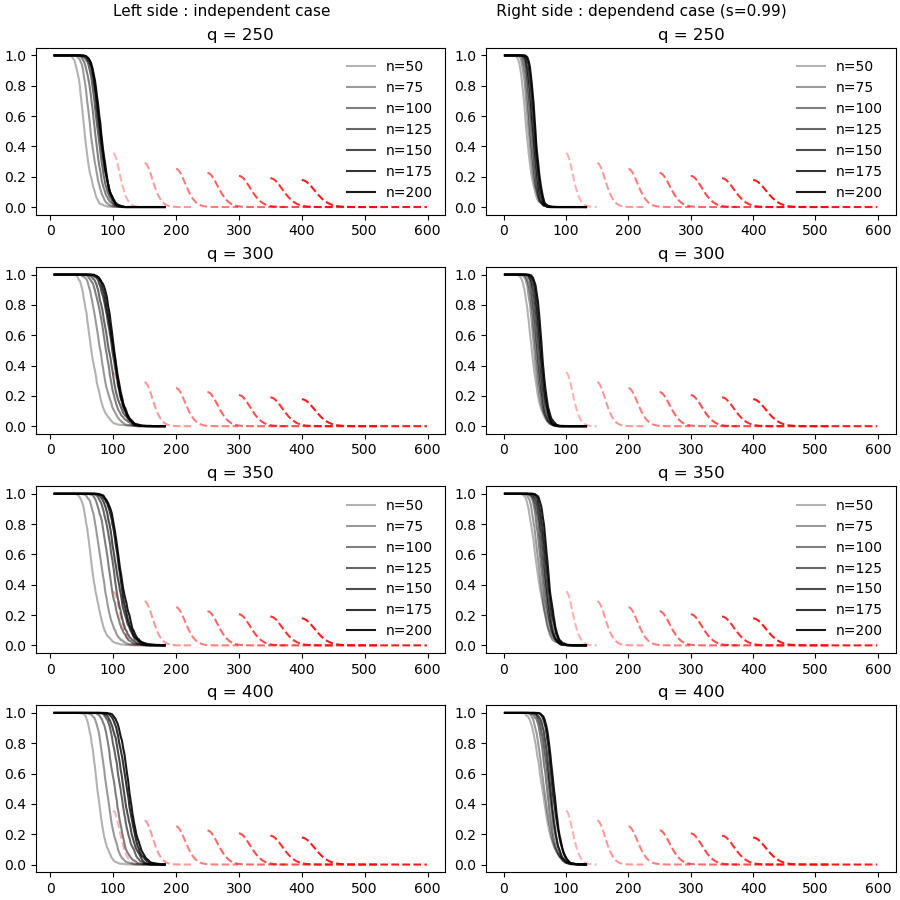

In [5]:
sns_i099 = {}
for q in q_list:
    sns_i099[q]=[(k[0],s[:,1]/3) for k,s in data_i_d099.items() if k[1]==q]
    

self_collection = {}
self_collection = dict([(q,[i[1] for i in sns_i099[q]]) for q in q_list])

min_v = min([min(j) for i in self_collection.values() for j in i])
max_v = max([max(j) for i in self_collection.values() for j in i])
print("At left, x abcisses are varying from ", min_v, " to ", max_v)

sns_d099 = {}
for q in q_list:
    sns_d099[q]=[(k[0],s[:,1]/3) for k,s in data_d099.items() if k[1]==q]
    

self_collection2 = {}
self_collection2 = dict([(q,[i[1] for i in sns_d099[q]]) for q in q_list])

min_v2 = min([min(j) for i in self_collection2.values() for j in i])
max_v2 = max([max(j) for i in self_collection2.values() for j in i])
print("At right x abcisses are varying from ", min_v2, " to ", max_v2)

%matplotlib notebook
fig, axs = plt.subplots(4, 2, constrained_layout=True, figsize=(9, 9))
axs = axs.ravel()

for j, q in enumerate(q_list[4:]) :
    elem = self_collection[q]
    for i in range(0,len(elem),1):
        n = n_list[i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        axs[2*j].plot(np.arange(min_v,max_v,1), 
                 list(map(cum_tail, np.arange(min_v,max_v,1))), label="n="+str(n),
                color="black", alpha=0.3 + 0.7*(i/k))
        axs[2*j].set_title('q = '+str(q))
        axs[2*j].plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", color="red", alpha=0.3 + 0.7*(i/k))
    if j%2==0: axs[2*j].legend(loc="upper right", facecolor='white', framealpha=0)

for j, q in enumerate(q_list[4:]) :
    elem = self_collection2[q]
    for i in range(0,len(elem),1):
        n = n_list[i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        axs[2*j+1].plot(np.arange(min_v2,max_v2,1), 
                 list(map(cum_tail, np.arange(min_v2,max_v2,1))), label="n="+str(n),
                color="black", alpha=0.3 + 0.7*(i/k))
        axs[2*j+1].set_title('q = '+str(q))
        axs[2*j+1].plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", color="red", alpha=0.3 + 0.7*(i/k))
    if j%2==0: axs[2*j+1].legend(loc="upper right", facecolor='white', framealpha=0)

fig.suptitle("Left side : independent case                                  Right side : dependend case (s=0.99)", size=11)
plt.show()

In [ ]:
sns_id = {}
for q in q_list:
    sns_id[q]=[(k[0],s[:,5][~np.isfinite(s[:,5])==False] ) for k,s in data_id.items() if k[1]==q]
    

self_collection = {}
self_collection = dict([(q,[i[1] for i in sns_id[q]]) for q in q_list])

min_v = min([min(j) for i in self_collection.values() for j in i])
max_v = max([max(j) for i in self_collection.values() for j in i])
print("At left, x abcisses are varying from ", min_v, " to ", max_v)

%matplotlib notebook
fig, axs = plt.subplots(4, 2, constrained_layout=True)
axs = axs.ravel()

for j, q in enumerate(q_list) :
    elem = self_collection[q]
    for i in range(0,len(elem),1):
        n = n_list[i]
        k = len(elem)
        axs[j].hist(elem[i], label="n="+str(n), color="black", alpha=0.3 + 0.7*(i/k), bins=50, density=True, range=(0, 400))
        axs[j].set_title('q = '+str(q))
        axs[j].hist(np.random.chisquare(n,999), range=(0,400), color="red", alpha=0.3 + 0.7*(i/k), density=True, bins=50)
    if j%2==0: axs[j].legend(loc="upper right")

fig.suptitle("rho* - Identity covariance matrix")

### True $\rho^{\ast}$

In [ ]:
data_i_d06[list(data_i_d06.keys())[0]][:,5]

0.13316120741307022 4.4000829892661875


<IPython.core.display.Javascript object>


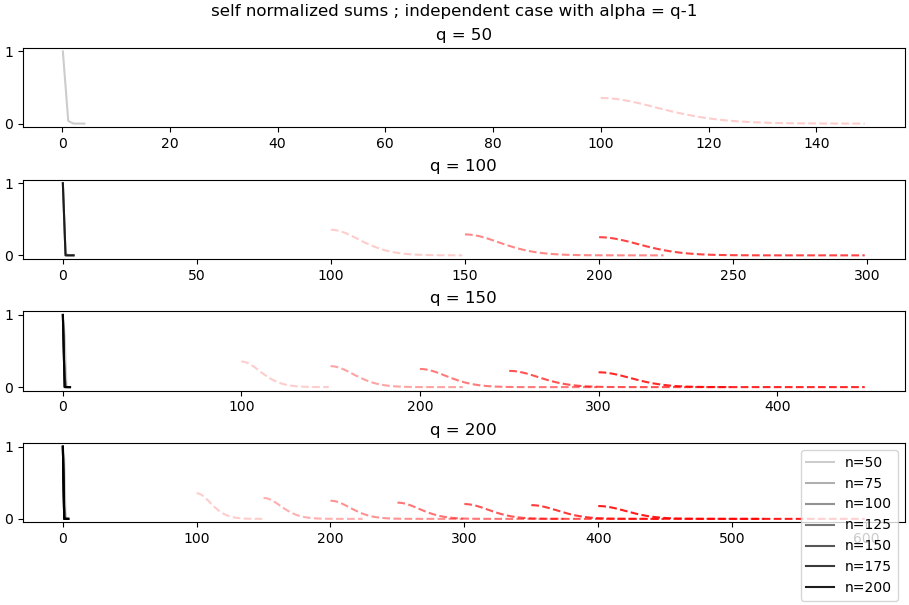

Text(0.5, 0.98, 'self normalized sums ; independent case with alpha = q-1')

In [81]:
sns_i_d0999999 = {}
for q in q_list:
    sns_i_d0999999[q]=[(k[0],s[:,1]/(2+(k3_d0999999[q_list.index(q)]/s[:,5]))) for k,s in data_i_d0999999.items() if k[1]==q]

self_collection = {}
self_collection = dict([(q,[i[1] for i in sns_i_d0999999[q]]) for q in q_list])

min_v = min([min(j) for i in self_collection.values() for j in i])
max_v = max([max(j) for i in self_collection.values() for j in i])
print(min_v,max_v)

%matplotlib notebook
fig, axs = plt.subplots(4, 1, constrained_layout=True)
axs = axs.ravel()

for j, q in enumerate(q_list[:4]) :
    elem = self_collection[q]
    for i in range(0,len(elem),1):
        n = n_list[i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        axs[j].plot(np.arange(min_v,max_v,1), 
                 list(map(cum_tail, np.arange(min_v,max_v,1))), label="n="+str(n_list[i]),
                color="black", alpha=0.2 + 0.8*(i/k))
        axs[j].set_title('q = '+str(q))
        axs[j].plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", color="red", alpha=0.2 + 0.8*(i/k))
axs[j].legend(loc="upper right")
fig.suptitle("self normalized sums ; independent case with alpha = q-1")

0.13316120741307022 4.4000829892661875


<IPython.core.display.Javascript object>


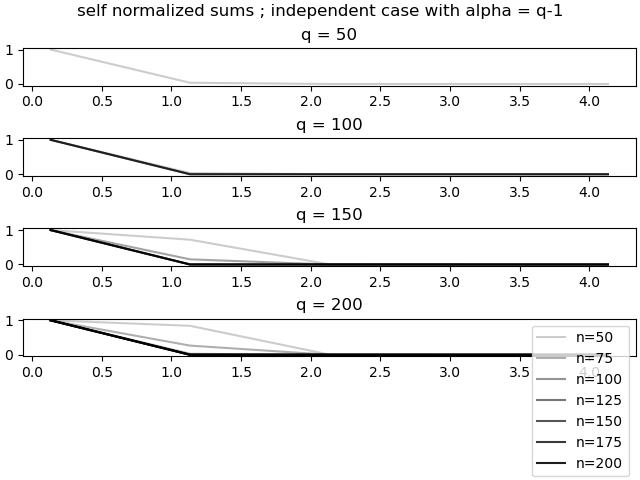

Text(0.5, 0.98, 'self normalized sums ; independent case with alpha = q-1')

In [112]:
sns_i_d0999999 = {}
for q in q_list:
    sns_i_d0999999[q]=[(k[0],s[:,1]/(2+(k3_d0999999[q_list.index(q)]/s[:,5]))) for k,s in data_i_d0999999.items() if k[1]==q]

self_collection = {}
self_collection = dict([(q,[i[1] for i in sns_i_d0999999[q]]) for q in q_list])

min_v = min([min(j) for i in self_collection.values() for j in i])
max_v = max([max(j) for i in self_collection.values() for j in i])
print(min_v,max_v)

%matplotlib notebook
fig, axs = plt.subplots(4, 1, constrained_layout=True)
axs = axs.ravel()

for j, q in enumerate(q_list[:4]) :
    elem = self_collection[q]
    for i in range(0,len(elem),1):
        n = n_list[i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        axs[j].plot(np.arange(min_v,max_v,1), 
                 list(map(cum_tail, np.arange(min_v,max_v,1))), label="n="+str(n_list[i]),
                color="black", alpha=0.2 + 0.8*(i/k))
        axs[j].set_title('q = '+str(q))
        # axs[j].plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", color="red", alpha=0.2 + 0.8*(i/k))
axs[j].legend(loc="upper right")
fig.suptitle("self normalized sums ; independent case with alpha = q-1")

In [85]:
k3_d_0999999 = [max(1/min(np.linalg.eigvals(cov_toep(0.999999,q))),max(np.linalg.eigvals(cov_toep(0.999999,q)))) for q in q_list]
print(*k3_d_0999999)

1998025.729458815 1999505.5595714475 1999779.6834937092 1999875.632787539 1999920.042472222 1999944.169817904 1999958.7162985844 1999968.1582511098


In [88]:
k3_d_06 = [max(1/min(np.linalg.eigvals(cov_toep(0.6,q))),max(np.linalg.eigvals(cov_toep(0.6,q)))) for q in q_list]
print(*k3_d_06)

3.996336838160397 3.9990794093675825 3.9995901488211545 3.9997692631051005 3.999852253522595 3.999897363692014 3.9999245756079675 3.9999422428030087


# Valeur du vrai rho*

In [104]:
for q in q_list:
    sigma = scalar(cov_toep(0.999999,q), np.diag(np.ones(q)))
    alpha = alphaaa1(cov_toep(0.999999,q))
    print((np.mean([np.mean(s[:,-1]) for k,s in data_d0999999.items() if k[1]==q])/alpha)*sigma)

0.038453713565117356
0.02907845671214838
0.024169312807812565
0.020506587178772545
0.019671279381357903
0.01928105858205496
0.02044248941925989
0.020247447831096894


In [105]:
for q in q_list:
    sigma = scalar(cov_toep(0.99,q), np.diag(np.ones(q)))
    alpha = alphaaa1(cov_toep(0.99,q))
    print((np.mean([np.mean(s[:,-1]) for k,s in data_d06.items() if k[1]==q])/alpha)*sigma)

0.029914996809180295
0.026921236285454356
0.02664140660906044
0.02709389711361688
0.03179803425861559
0.03659678269220877
0.04148794435737056
0.04641128263325102


In [106]:
for q in q_list:
    sigma = scalar(cov_toep(0.6,q), np.diag(np.ones(q)))
    alpha = alphaaa1(cov_toep(0.6,q))
    print((np.mean([np.mean(s[:,-1]) for k,s in data_d06.items() if k[1]==q])/alpha)*sigma)

0.9810588466110213
1.3524916477233462
1.60625654133289
1.8010007987604317
2.2422252572570933
2.68285819891338
3.125455167937518
3.5672571686334305


In [103]:
for q in q_list:
    sigma = scalar(np.diag(vp_i_d06[q_list.index(q)]), np.diag(np.ones(q)))
    alpha = alphaaa1(np.diag(vp_i_d06[q_list.index(q)]))
    print((np.mean([np.mean(s[:,-1]) for k,s in data_i_d06.items() if k[1]==q])/alpha)*sigma)

1.7432466881982678
2.1186050077059386
3.0332841995516135
2.9647148993187624
2.8955420053399226
4.255444248770757
4.098080242492344
4.263431499438611


In [101]:
for q in q_list:
    sigma = scalar(np.diag(vp_i_d0999999[q_list.index(q)]), np.diag(np.ones(q)))
    alpha = alphaaa1(np.diag(vp_i_d0999999[q_list.index(q)]))
    print((np.mean([np.mean(s[:,-1]) for k,s in data_i_d0999999.items() if k[1]==q])/alpha)*sigma)

0.763668796759087
0.4518175638091019
0.6627179173507056
0.8396649842206156
0.7191328661599021
1.0916179009439255
1.1592377512394583
1.6614925021130669


In [111]:
# fig, axs = plt.subplots(4, 1, constrained_layout=True)
# axs = axs.ravel()

true_rho = {}

for i, q in enumerate(q_list):
    sigma = scalar(cov_toep(0.999999,q), np.diag(np.ones(q)))
    alpha = alphaaa1(cov_toep(0.999999,q))
    true_rho["dep0999"].append((np.mean([np.mean(s[:,-1]) for k,s in data_d0999999.items() if k[1]==q])/alpha)*sigma)
    
true_rho

KeyError: 'dep0999'

In [127]:
sns_i_d0999999 = {}
for q in q_list:
    sns_i_d0999999[q]=[(k[0],s[:,1]) for k,s in data_i_d0999999.items() if k[1]==q]
    
rho_i_d0999999 = {}
for q in q_list:
    rho_i_d0999999[q]=[(k[0],s[:,5]) for k,s in data_i_d0999999.items() if k[1]==q]
    
print(sns_i_d0999999[50][0][1][:10])
print(rho_i_d0999999[50][0][1][:10])
print(rho_i_d0999999[100][1][1][:10])
print()

[43.88733674 35.88542368 46.92557092 35.38860792 48.28979666 26.0180303
 39.58455166 33.21734738 49.70511527 44.70188689]
[0.97517228 0.82186637 1.01884367 0.79663506 0.71673144 0.91771605
 0.7783041  0.61852578 0.81043709 0.80008075]
[0.40597056 0.43360759 0.38844019 0.4904587  0.40451553 0.48624083
 0.52656068 0.38074326 0.53671932 0.45829431]



In [134]:
k3_i_0999999 = [max(1/min(i),max(i)) for i in vp_i_d0999999]
print(*k3_i_0999999)

45.29940815474966 96.87992949000329 134.01271228817757 229.74375940301246 218.14189476429118 263.6794858907057 308.2566589572174 2195.078706817729


In [135]:
normalized_sns_i_d0999999 = {}
for q in q_list:
    normalized_sns_i_d0999999[q]=[(i[1]/(2+k3_i_0999999[q_list.index(q)]/j[1])) for i in sns_i_d0999999[q] for j in rho_i_d0999999[q] if i[0]==j[0]]
    
print(normalized_sns_i_d0999999[50][0][:10])
print(normalized_sns_i_d0999999[100][1][:10])

[0.90577647 0.62827119 1.00998636 0.60119846 0.74060965 0.50657144
 0.65752109 0.44149869 0.85853851 0.7625895 ]
[0.48965035 0.50426596 0.65993861 0.51353199 0.56713744 0.62583457
 0.54934117 0.40322703 0.72638404 0.62747615]


In [143]:
sns_d0999999 = {}
for q in q_list:
    sns_d0999999[q]=[(k[0],s[:,1]) for k,s in data_d0999999.items() if k[1]==q]
    
rho_d0999999 = {}
for q in q_list:
    rho_d0999999[q]=[(k[0],s[:,5]) for k,s in data_d0999999.items() if k[1]==q]
    
print("some self normalized sums values for dependent case, s = 0.999999, n=50 and q = 50 \n", sns_d0999999[50][0][1][:10])
print()
print("some rho* values for dependent case, s = 0.999999, n=50 and q = 50 \n", rho_d0999999[50][0][1][:10])
print()
print("some rho* values for dependent case, s = 0.999999, n=125 and q = 100 \n", rho_d0999999[100][1][1][:10])
print()

k3_d0999999 = [max(1/min(np.linalg.eigvals(cov_toep(0.999999,q))),max(np.linalg.eigvals(cov_toep(0.999999,q)))) for q in q_list]
print("K_3 values for dependent case, s = 0.999999, q in [50,400] \n", *k3_d0999999)

normalized_sns_d0999999 = {}
for q in q_list:
    normalized_sns_d0999999[q]=[(i[1]/(2+k3_d0999999[q_list.index(q)]/j[1])) for i in sns_d0999999[q] for j in rho_d0999999[q] if i[0]==j[0]]
    
print()
print("some self normalized sums values when devided by a* for dependent case, s = 0.999999, n=50 and q = 50 \n", normalized_sns_d0999999[50][0][:10])
print()
print("some self normalized sums values when devided by a* for dependent case, s = 0.999999, n=100 and q = 125 \n", normalized_sns_d0999999[100][1][:10])

some self normalized sums values for dependent case, s = 0.999999, n=50 and q = 50 
 [1.64509626 0.29002798 0.10439978 0.73843782 0.49000752 0.40264237
 0.07185128 0.0578168  2.17832531 0.24413013]

some rho* values for dependent case, s = 0.999999, n=50 and q = 50 
 [0.01780515 0.06023146 0.06442765 0.02839663 0.04228446 0.05536354
 0.02220691 0.02856431 0.03139944 0.0503666 ]

some rho* values for dependent case, s = 0.999999, n=125 and q = 100 
 [0.02381535 0.03395323 0.03300447 0.02719997 0.02866538 0.02463004
 0.02746778 0.03677543 0.02465772 0.01337403]

K_3 values for dependent case, s = 0.999999, q in [50,400] 
 1998025.729458815 1999505.5595714475 1999779.6834937092 1999875.632787539 1999920.042472222 1999944.169817904 1999958.7162985844 1999968.1582511098

some self normalized sums values when devided by a* for dependent case, s = 0.999999, n=50 and q = 50 
 [1.46600659e-08 8.74303441e-09 3.36643935e-09 1.04949331e-08
 1.03700885e-08 1.11568667e-08 7.98585847e-10 8.26564505e-

In [138]:
sns_d099 = {}
for q in q_list:
    sns_d099[q]=[(k[0],s[:,1]) for k,s in data_d099.items() if k[1]==q]
    
rho_d099 = {}
for q in q_list:
    rho_d099[q]=[(k[0],s[:,5]) for k,s in data_d099.items() if k[1]==q]
    
print(sns_d099[50][0][1][:10])
print(rho_d099[50][0][1][:10])
print(rho_d099[100][1][1][:10])

k3_d099 = [max(1/min(np.linalg.eigvals(cov_toep(0.99,q))),max(np.linalg.eigvals(cov_toep(0.99,q)))) for q in q_list]
print(*k3_d099)

normalized_sns_d099 = {}
for q in q_list:
    normalized_sns_d099[q]=[(i[1]/(2+k3_d099[q_list.index(q)]/j[1])) for i in sns_d099[q] for j in rho_d099[q] if i[0]==j[0]]
    
print(normalized_sns_d099[50][0][:10])
print(normalized_sns_d099[100][1][:10])

[31.01505244 15.07263119 22.63964527 13.89893018 13.08751105 20.50934046
 16.89586704 16.65082279 24.96664927 30.51404468]
[0.02948144 0.04663741 0.04675437 0.08096123 0.10420638 0.05668361
 0.03365442 0.04236521 0.05192138 0.06264795]
[0.0395921  0.04981256 0.03648612 0.03710322 0.04278628 0.04827389
 0.02669292 0.03648589 0.04793914 0.03666504]
198.80370389506928 198.95090893008816 198.97818001880813 198.98772585868846 198.99214441245965 198.99454467239042 198.99599197531322 198.99693134025188
[0.00459799 0.00353423 0.00532186 0.00565562 0.00685286 0.00584436
 0.00285924 0.00354679 0.00651711 0.00960967]
[0.00925777 0.01145219 0.00702018 0.01012312 0.00980871 0.01165735
 0.00574763 0.00719292 0.01692436 0.00594775]


In [139]:
sns_d06 = {}
for q in q_list:
    sns_d06[q]=[(k[0],s[:,1]) for k,s in data_d06.items() if k[1]==q]
    
rho_d06 = {}
for q in q_list:
    rho_d06[q]=[(k[0],s[:,5]) for k,s in data_d06.items() if k[1]==q]
    
print(sns_d06[50][0][1][:10])
print(rho_d06[50][0][1][:10])
print(rho_d06[100][1][1][:10])

k3_d06 = [max(1/min(np.linalg.eigvals(cov_toep(0.6,q))),max(np.linalg.eigvals(cov_toep(0.6,q)))) for q in q_list]
print(*k3_d06)

normalized_sns_d06 = {}
for q in q_list:
    normalized_sns_d06[q]=[(i[1]/(2+k3_d06[q_list.index(q)]/j[1])) for i in sns_d06[q] for j in rho_d06[q] if i[0]==j[0]]
    
print(normalized_sns_d06[50][0][:10])
print(normalized_sns_d06[100][1][:10])

[22.9947615  24.37122884 19.73926661 24.9843607  31.08560516 33.77272227
 22.70361678 30.4724475  16.45942667 28.33341166]
[0.89177751 0.64923029 0.85137452 0.85866263 0.7219517  0.90697556
 0.82374858 0.9416749  0.84967525 0.91411616]
[1.22036355 1.20685844 1.22842528 1.04214334 1.13271142 1.1380357
 1.27244876 1.239954   1.16159128 1.14962932]
3.996336838160397 3.9990794093675825 3.9995901488211545 3.9997692631051005 3.999852253522595 3.999897363692014 3.9999245756079675 3.9999422428030087
[3.54785377 2.98831829 2.94880775 3.75470873 4.12524161 5.27186155
 3.31371762 4.88038577 2.45539592 4.44668587]
[ 7.10378629  8.86356148  8.87411051  6.96444967  8.17752318  7.12118819
 10.45928981  7.28044881  7.59714853  8.35607135]


In [107]:
np.linalg.eigvals(cov_toep(0.999999,q))[:10]

array([3.99946673e+02, 3.24177060e-02, 8.10553689e-03, 3.60263455e-03,
       2.02657083e-03, 1.29707007e-03, 9.00795824e-04, 6.61854197e-04,
       5.06771588e-04, 4.00447327e-04])

9.327401002271784e-11 6.231701809997192e-07


<IPython.core.display.Javascript object>


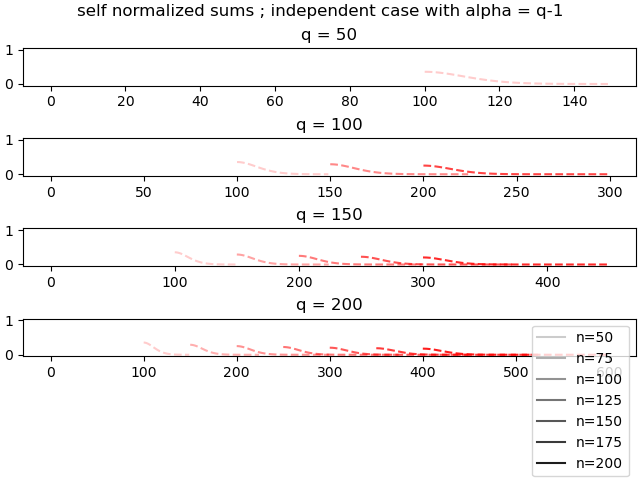

Text(0.5, 0.98, 'self normalized sums ; independent case with alpha = q-1')

In [86]:
sns_d0999999 = {}
for q in q_list:
    sns_d0999999[q]=[(k[0],s[:,1]/(2+(k3_d_0999999[q_list.index(q)]/s[:,5]))) for k,s in data_d0999999.items() if k[1]==q]

self_collection = {}
self_collection = dict([(q,[i[1] for i in sns_d0999999[q]]) for q in q_list])

min_v = min([min(j) for i in self_collection.values() for j in i])
max_v = max([max(j) for i in self_collection.values() for j in i])
print(min_v,max_v)

%matplotlib notebook
fig, axs = plt.subplots(4, 1, constrained_layout=True)
axs = axs.ravel()

for j, q in enumerate(q_list[:4]) :
    elem = self_collection[q]
    for i in range(0,len(elem),1):
        n = n_list[i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        axs[j].plot(np.arange(min_v,max_v,1), 
                 list(map(cum_tail, np.arange(min_v,max_v,1))), label="n="+str(n_list[i]),
                color="black", alpha=0.2 + 0.8*(i/k))
        axs[j].set_title('q = '+str(q))
        axs[j].plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", color="red", alpha=0.2 + 0.8*(i/k))
axs[j].legend(loc="upper right")
fig.suptitle("self normalized sums ; independent case with alpha = q-1")

In [3]:
ls = [data_i_d06, data_i_d0999999, data_i2, data_d06, data_d099, data_d0999999]
names = dict(zip(["i06","i0999999", "d06", "d099", "d0999999"],
                 ["independent case with sigma = 1 and alpha = 1.1",
                  "independent case with sigma = 1 and alpha = q-1",
                 "dependent case with s = 0.6",
                 "dependent case with s = 0.99",
                 "dependent case with s = 0.999999"]))
result = {}
for i, d in enumerate(ls) :
    result[list(names.keys())[i]] = [s[:,1] for k,s in d.items() if k[0]==200 and k[1]==200][0]

In [4]:
sns_i_sigma1 = {}
for q in q_list:
    sns_i_sigma1[q]=[(k[0],s[:,1]) for k,s in data_i1.items() if k[1]==q]
    
sns_i_sigma1.keys()

dict_keys([50, 100, 150, 200, 250, 300, 350, 400])

In [20]:
collection = [i[1] for i in sns_i_sigma1[200]]
len(collection)

collection2 = [i[1] for i in sns_i_sigma1[400]]
len(collection2)

7

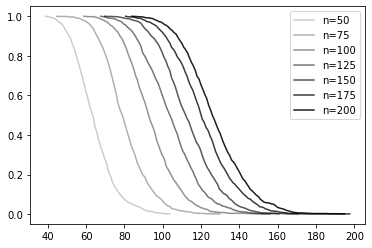

In [6]:
elem = collection
elem2 = collection2
# min_v = min(min(collection), min(collection2))
for i in range(0,len(elem),1):
    k = len(elem)
    def cum(x):
        F = np.array(sorted(elem[i]))
        return(sum(F<x)/len(F))
    def cum_tail(x):
        return(1-cum(x))
    plt.plot(np.arange(min(elem[i]),max(elem[i]),1), 
             list(map(cum_tail, np.arange(min(elem[i]),max(elem[i]),1))), label="n="+str(n_list[i]),
            color="black", alpha=0.2 + 0.8*(i/k))

    plt.legend()
    
plt.show()

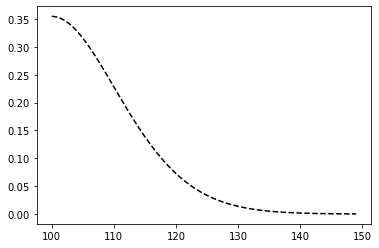

In [7]:
from math import gamma

n = 50

def bounding(t):
    return (2*np.exp(3)/9)*((t-n)/2)**(n/2)*np.exp(-(t-n)/2)/gamma((n/2)+1)


grid = np.arange(2*n,3*n)
plt.plot(grid, list(map(bounding,grid)), alpha=1, linestyle="dashed", color="black")
plt.show()

In [9]:
def bounding(n, t):
    return (2*np.exp(3)/9)*((t-n)/2)**(n/2)*np.exp(-(t-n)/2)/gamma((n/2)+1)
bnd_dict = {}
for n in n_list:
    bnd_dict[n] = lambda x : bounding(n, x)
    
print(bnd_dict[n_list[0]](n_list[0]), bnd_dict[n_list[0]](n_list[1]))
print(bnd_dict[n_list[1]](n_list[1]), bnd_dict[n_list[0]](n_list[4]))

5.726374658622018e+62 2.5767609518622115e+49
2.5767609518622115e+49 2.1430395793193224e-07


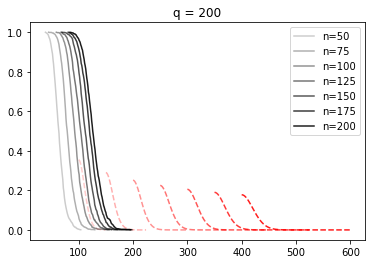

In [12]:
elem = collection
elem2 = collection2
# min_v = min(min(collection), min(collection2))
for i in range(0,len(elem),1):
    n = n_list[i]
    grid = np.arange(2*n,max(max(elem[i]),3*n),1)
    k = len(elem)
    def cum(x):
        F = np.array(sorted(elem[i]))
        return(sum(F<x)/len(F))
    def cum_tail(x):
        return(1-cum(x))
    plt.plot(np.arange(min(elem[i]),max(elem[i]),1), 
             list(map(cum_tail, np.arange(min(elem[i]),max(elem[i]),1))), label="n="+str(n),
            color="black", alpha=0.2 + 0.8*(i/k))

    plt.plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", color="red", alpha=0.2 + 0.8*(i/k))
    plt.title("q = 200")
    plt.legend()
    
plt.show()

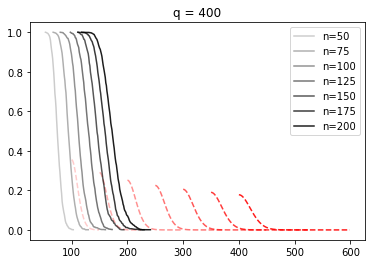

In [14]:
elem = collection
elem2 = collection2
# min_v = min(min(collection), min(collection2))
for i in range(0,len(elem2),1):
    n = n_list[i]
    grid = np.arange(2*n,max(max(elem2[i]),3*n),1)
    k = len(elem2)
    def cum(x):
        F = np.array(sorted(elem2[i]))
        return(sum(F<x)/len(F))
    def cum_tail(x):
        return(1-cum(x))
    plt.plot(np.arange(min(elem2[i]),max(elem2[i]),1), 
             list(map(cum_tail, np.arange(min(elem2[i]),max(elem2[i]),1))), label="n="+str(n),
            color="black", alpha=0.2 + 0.8*(i/k))

    plt.plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", color="red", alpha=0.2 + 0.8*(i/k))
    plt.title("q = 400")
    plt.legend()
    
plt.show()

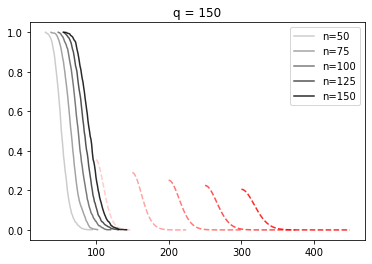

In [15]:
collectionn = [i[1] for i in sns_i_sigma1[150]]
elem2 = collectionn
# min_v = min(min(collection), min(collection2))
for i in range(0,len(elem2),1):
    n = n_list[i]
    grid = np.arange(2*n,max(max(elem2[i]),3*n),1)
    k = len(elem2)
    def cum(x):
        F = np.array(sorted(elem2[i]))
        return(sum(F<x)/len(F))
    def cum_tail(x):
        return(1-cum(x))
    plt.plot(np.arange(min(elem2[i]),max(elem2[i]),1), 
             list(map(cum_tail, np.arange(min(elem2[i]),max(elem2[i]),1))), label="n="+str(n),
            color="black", alpha=0.2 + 0.8*(i/k))

    plt.plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", color="red", alpha=0.2 + 0.8*(i/k))
    plt.title("q = 150")
    plt.legend()
    
plt.show()

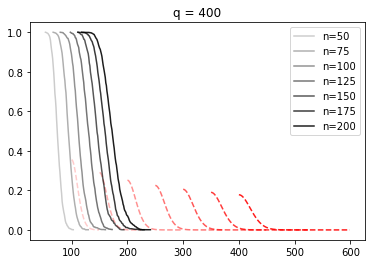

In [23]:
for i in range(0,len(elem2),1):
    n = n_list[i]
    grid = np.arange(2*n,max(max(elem2[i]),3*n),1)
    k = len(elem2)
    def cum(x):
        F = np.array(sorted(elem2[i]))
        return(sum(F<x)/len(F))
    def cum_tail(x):
        return(1-cum(x))
    plt.plot(np.arange(min(elem2[i]),max(elem2[i]),1), 
             list(map(cum_tail, np.arange(min(elem2[i]),max(elem2[i]),1))), label="n="+str(n),
            color="black", alpha=0.2 + 0.8*(i/k))

    plt.plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", color="red", alpha=0.2 + 0.8*(i/k))
    plt.title("q = 400")
    plt.legend()
    
plt.show()

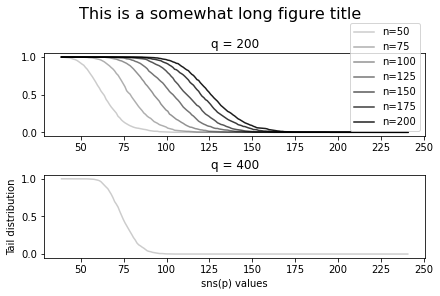

In [21]:
elem2 = collection2
min_v = min([min(i) for i in collection]+[min(i) for i in collection2])
max_v = max([max(i) for i in collection]+[max(i) for i in collection2])

fig, axs = plt.subplots(2, 1, constrained_layout=True)

for i in range(0,len(elem),1):
    k = len(elem)
    def cum(x):
        F = np.array(sorted(elem[i]))
        return(sum(F<x)/len(F))
    def cum_tail(x):
        return(1-cum(x))
    axs[0].plot(np.arange(min_v,max_v,1), 
             list(map(cum_tail, np.arange(min_v,max_v,1))), label="n="+str(n_list[i]),
            color="black", alpha=0.2 + 0.8*(i/k))
    axs[0].set_title('q = 200')
    axs[0].legend()

for i in range(0,len(elem2),1):
    k = len(elem2)
    def cum(x):
        F = np.array(sorted(elem2[i]))
        return(sum(F<x)/len(F))
    def cum_tail(x):
        return(1-cum(x))
    axs[1].plot(np.arange(min_v,max_v,1), 
             list(map(cum_tail, np.arange(min_v,max_v,1))), label="n="+str(n_list[i]),
            color="black", alpha=0.2 + 0.8*(i/k))
    axs[1].set_title('q = 400')
    axs[1].set_xlabel('sns(p) values')
    axs[1].set_ylabel('Tail distribution')
    
    fig.suptitle('This is a somewhat long figure title', fontsize=16)
    plt.show()

In [30]:
self_collection = {}
self_collection = dict([(q,[i[1] for i in sns_i_sigma1[q]]) for q in q_list])

In [41]:
min_v = min([min(j) for i in self_collection.values() for j in i])
max_v = max([max(j) for i in self_collection.values() for j in i])
print(min_v,max_v)

9.579349116655408 264.5940454817879


<IPython.core.display.Javascript object>


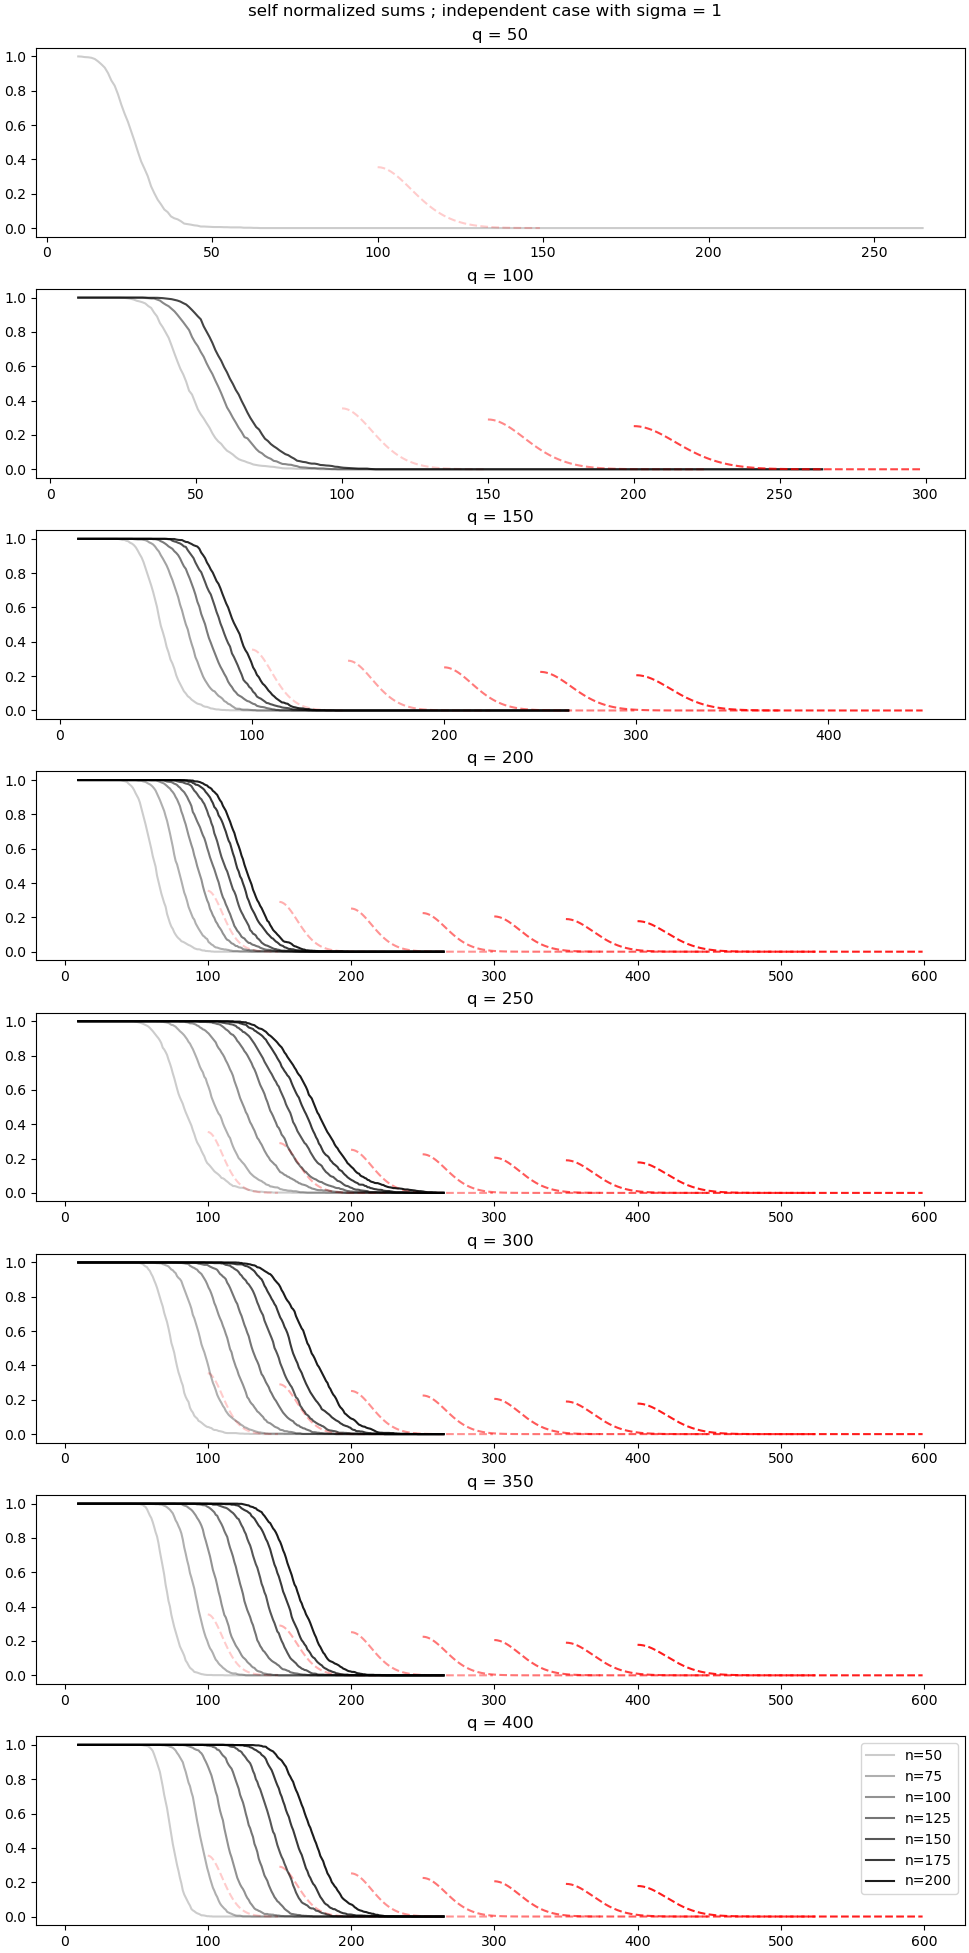

Text(0.5, 0.98, 'self normalized sums ; independent case with sigma = 1')

In [59]:
%matplotlib notebook
fig, axs = plt.subplots(len(q_list), 1, constrained_layout=True)

for j, q in enumerate(q_list) :
    elem = self_collection[q]
    for i in range(0,len(elem),1):
        n = n_list[i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        axs[j].plot(np.arange(min_v,max_v,1), 
                 list(map(cum_tail, np.arange(min_v,max_v,1))), label="n="+str(n_list[i]),
                color="black", alpha=0.2 + 0.8*(i/k))
        axs[j].set_title('q = '+str(q))
        axs[j].plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", color="red", alpha=0.2 + 0.8*(i/k))
axs[j].legend(loc="upper right")
fig.suptitle("self normalized sums ; independent case with sigma = 1")

<IPython.core.display.Javascript object>


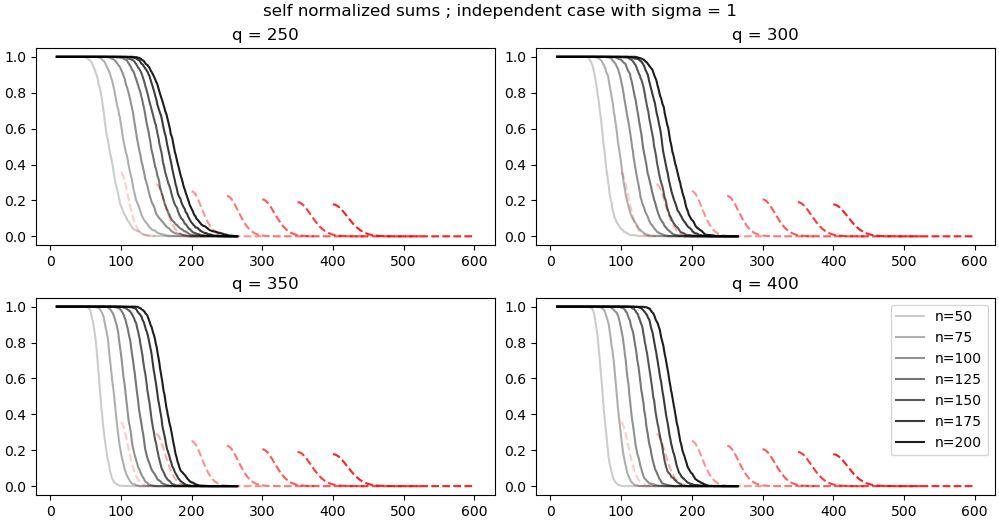

Text(0.5, 0.98, 'self normalized sums ; independent case with sigma = 1')

In [63]:
%matplotlib notebook
fig, axs = plt.subplots(2, 2, constrained_layout=True)
axs = axs.ravel()

for j, q in enumerate(q_list[4:]) :
    elem = self_collection[q]
    for i in range(0,len(elem),1):
        n = n_list[i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        axs[j].plot(np.arange(min_v,max_v,1), 
                 list(map(cum_tail, np.arange(min_v,max_v,1))), label="n="+str(n_list[i]),
                color="black", alpha=0.2 + 0.8*(i/k))
        axs[j].set_title('q = '+str(q))
        axs[j].plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", color="red", alpha=0.2 + 0.8*(i/k))
axs[j].legend(loc="upper right")
fig.suptitle("self normalized sums ; independent case with sigma = 1")

In [64]:
names.keys()

dict_keys(['i4', 'i1', 'i2', 'd025', 'd06', 'd099'])

1.5995775657703097 45.91700505724189


<IPython.core.display.Javascript object>


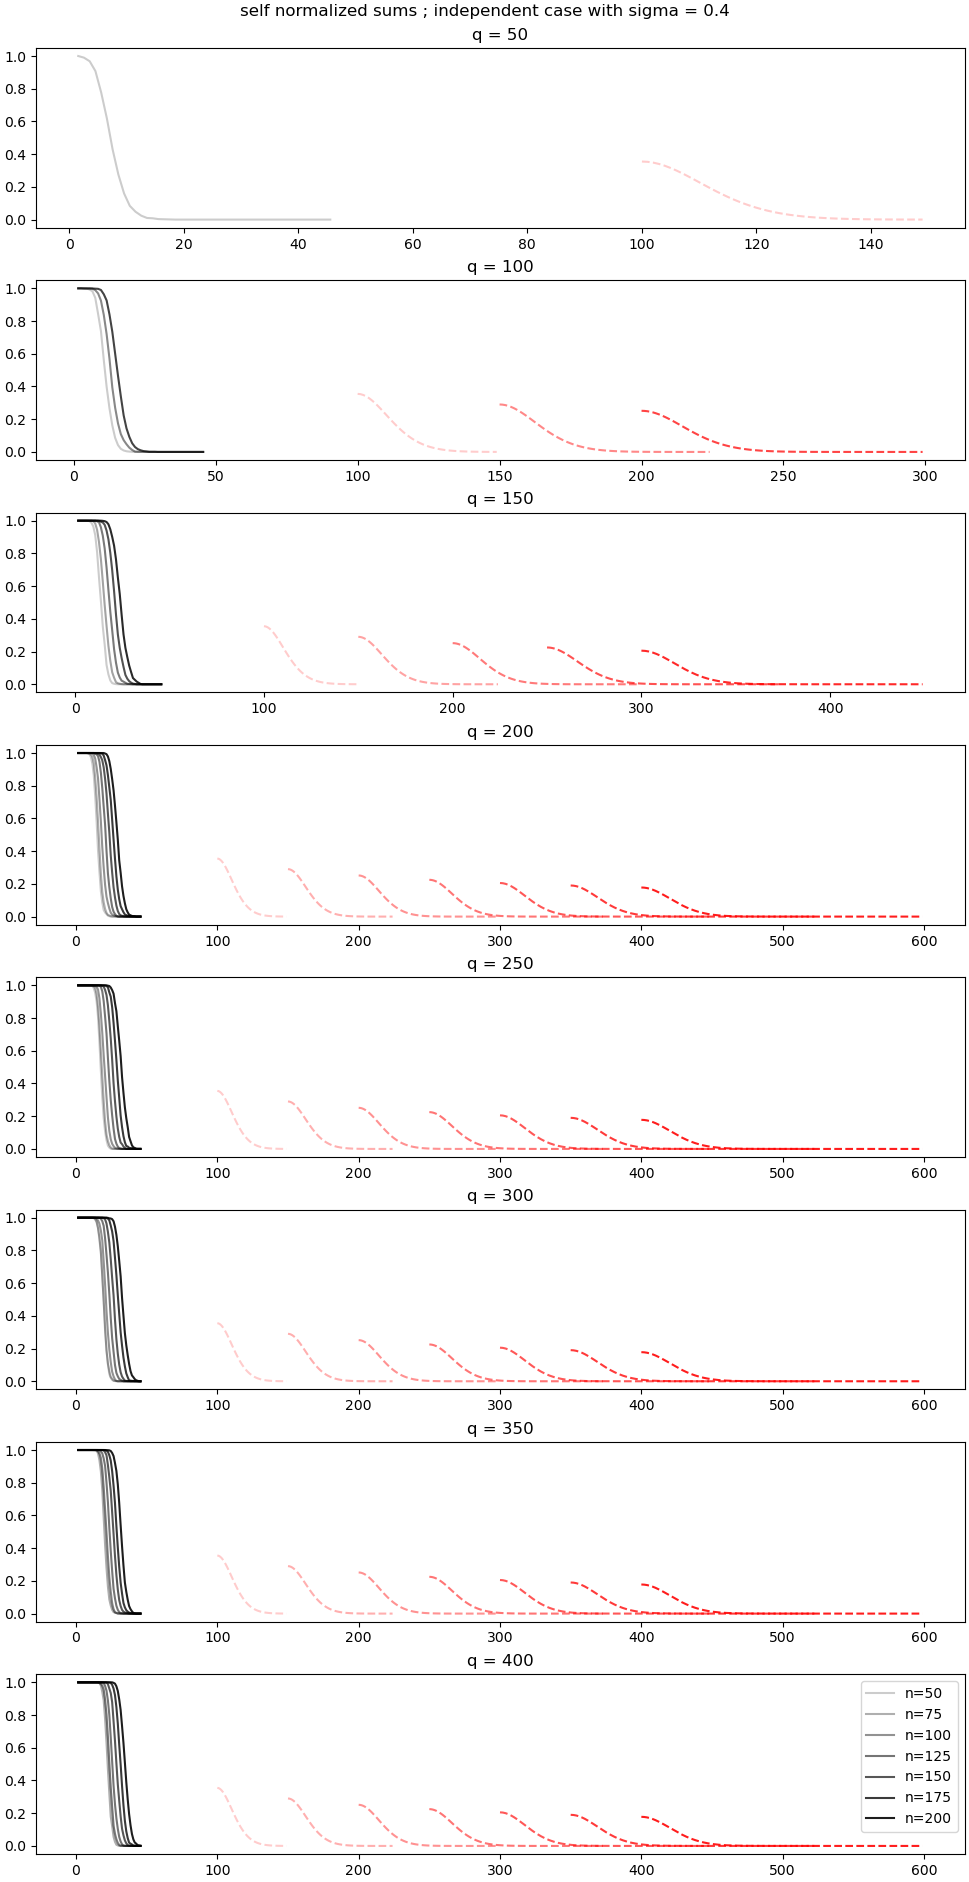

Text(0.5, 0.98, 'self normalized sums ; independent case with sigma = 0.4')

In [66]:
sns_i_sigma04 = {}
for q in q_list:
    sns_i_sigma04[q]=[(k[0],s[:,1]) for k,s in data_i4.items() if k[1]==q]
    
sns_i_sigma04.keys()

self_collection = {}
self_collection = dict([(q,[i[1] for i in sns_i_sigma04[q]]) for q in q_list])

min_v = min([min(j) for i in self_collection.values() for j in i])
max_v = max([max(j) for i in self_collection.values() for j in i])
print(min_v,max_v)

%matplotlib notebook
fig, axs = plt.subplots(8, 1, constrained_layout=True)
axs = axs.ravel()

for j, q in enumerate(q_list) :
    elem = self_collection[q]
    for i in range(0,len(elem),1):
        n = n_list[i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        axs[j].plot(np.arange(min_v,max_v,1), 
                 list(map(cum_tail, np.arange(min_v,max_v,1))), label="n="+str(n_list[i]),
                color="black", alpha=0.2 + 0.8*(i/k))
        axs[j].set_title('q = '+str(q))
        axs[j].plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", color="red", alpha=0.2 + 0.8*(i/k))
axs[j].legend(loc="upper right")
fig.suptitle("self normalized sums ; independent case with sigma = 0.4")

10.974327356978865 515.3209086199577


<IPython.core.display.Javascript object>


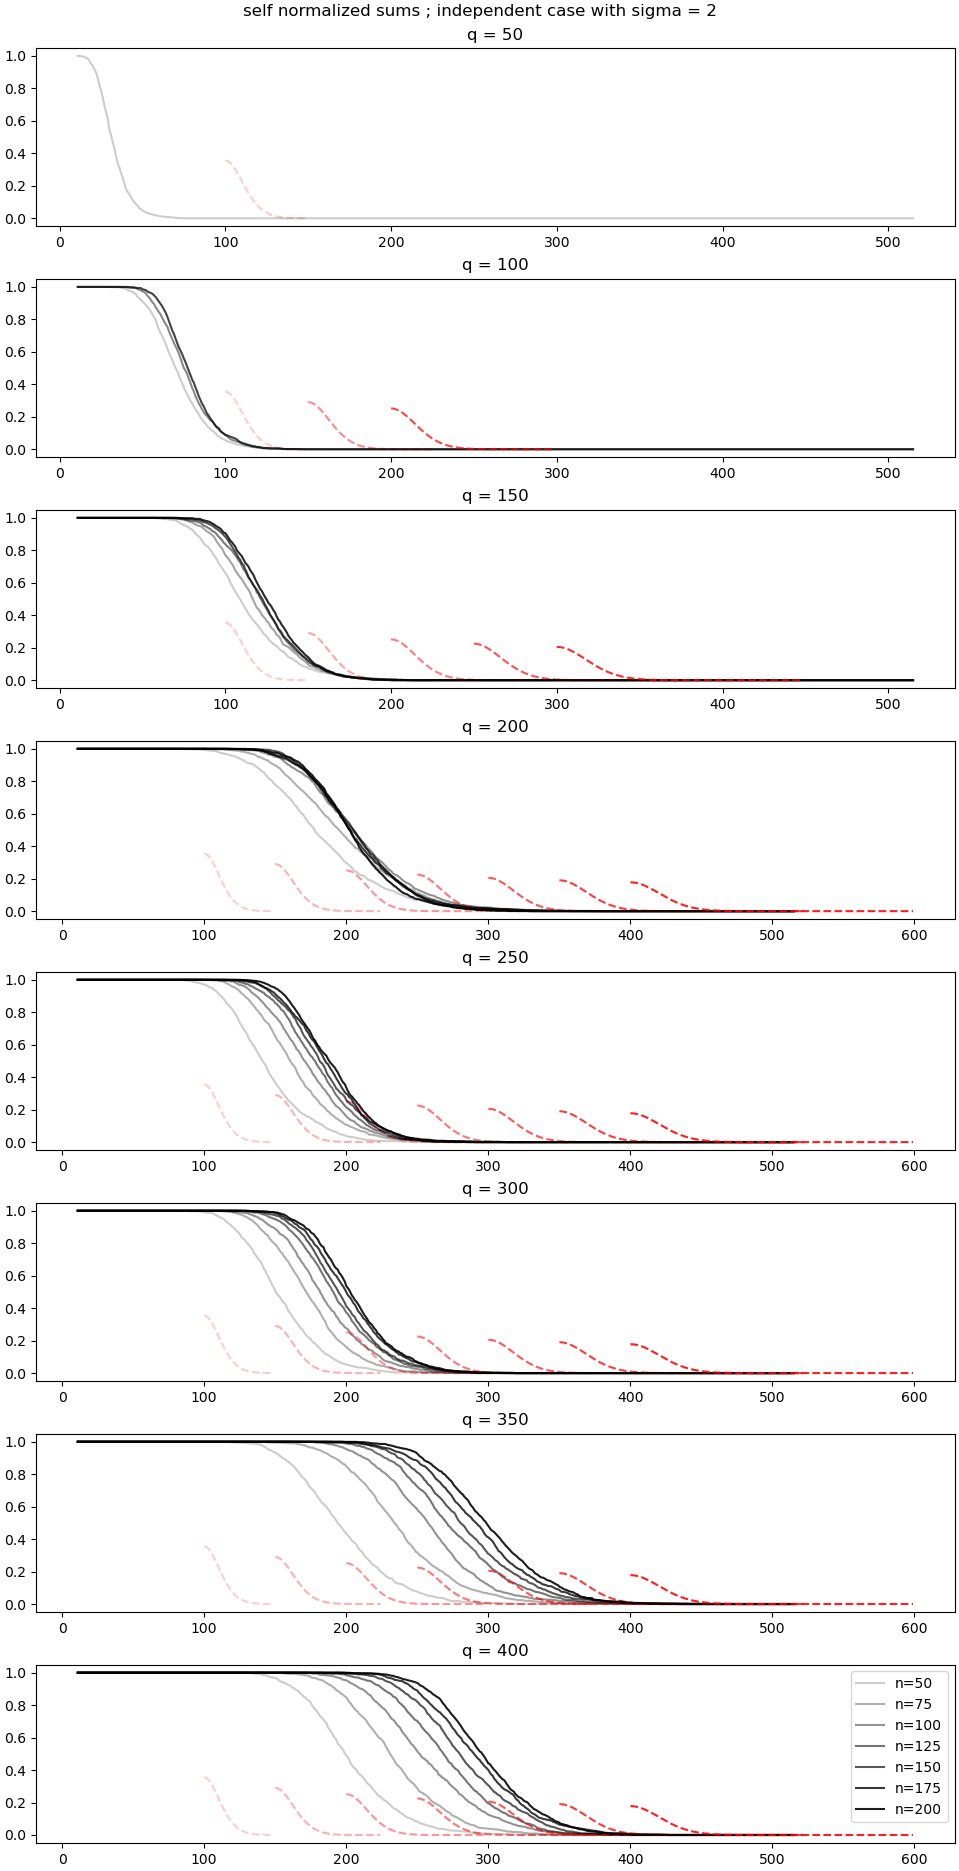

Text(0.5, 0.98, 'self normalized sums ; independent case with sigma = 2')

In [69]:
sns_i_sigma2 = {}
for q in q_list:
    sns_i_sigma2[q]=[(k[0],s[:,1]) for k,s in data_i2.items() if k[1]==q]
    

self_collection = {}
self_collection = dict([(q,[i[1] for i in sns_i_sigma2[q]]) for q in q_list])

min_v = min([min(j) for i in self_collection.values() for j in i])
max_v = max([max(j) for i in self_collection.values() for j in i])
print(min_v,max_v)

%matplotlib notebook
fig, axs = plt.subplots(8, 1, constrained_layout=True)
axs = axs.ravel()

for j, q in enumerate(q_list) :
    elem = self_collection[q]
    for i in range(0,len(elem),1):
        n = n_list[i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        axs[j].plot(np.arange(min_v,max_v,1), 
                 list(map(cum_tail, np.arange(min_v,max_v,1))), label="n="+str(n_list[i]),
                color="black", alpha=0.2 + 0.8*(i/k))
        axs[j].set_title('q = '+str(q))
        axs[j].plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", color="red", alpha=0.2 + 0.8*(i/k))
axs[j].legend(loc="upper right")
fig.suptitle("self normalized sums ; independent case with sigma = 2")

1.3919170730997021 38.96626368226072


<IPython.core.display.Javascript object>


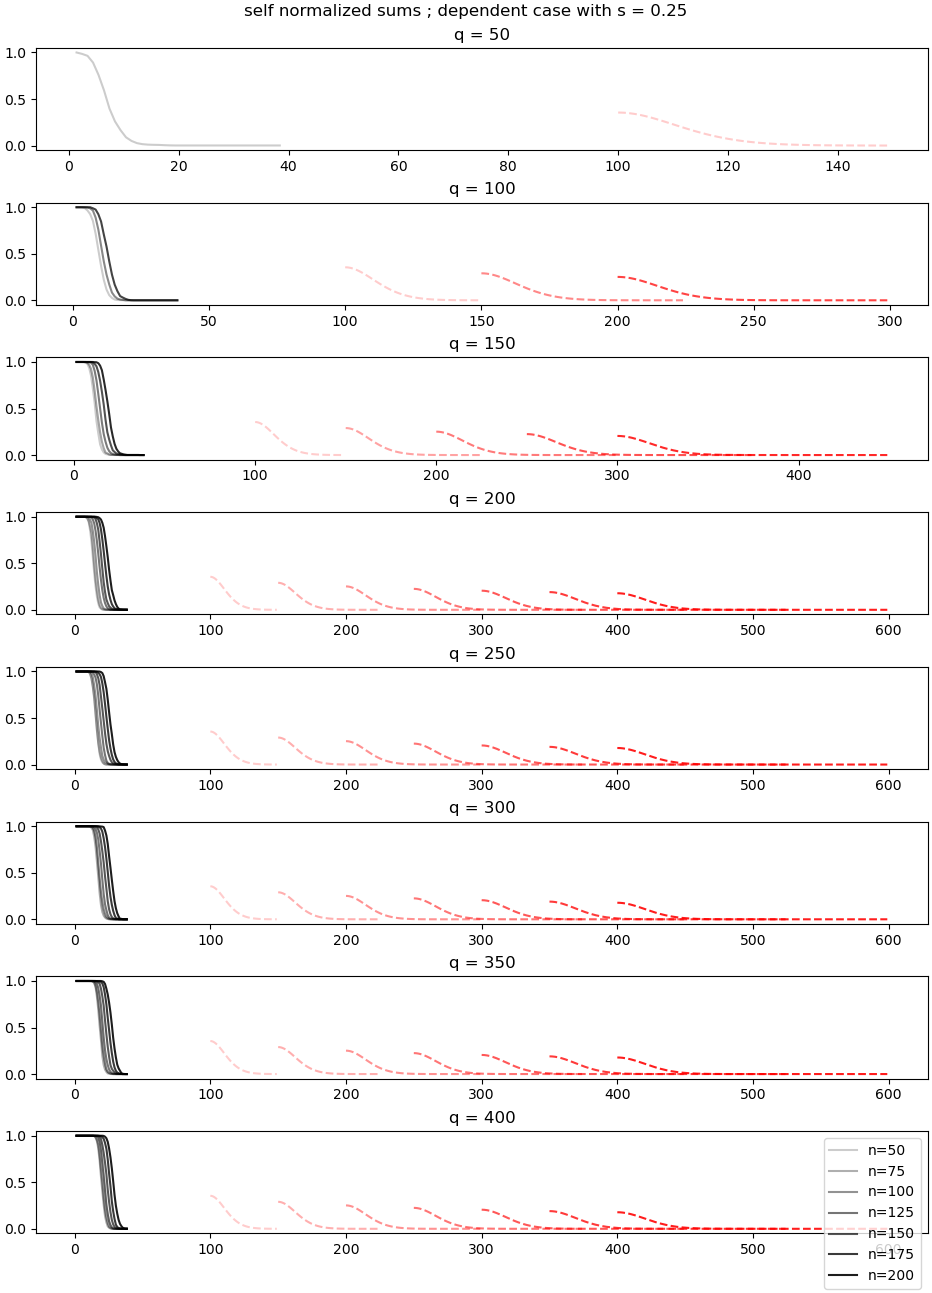

Text(0.5, 0.98, 'self normalized sums ; dependent case with s = 0.25')

In [71]:
sns_d_sigma025 = {}
for q in q_list:
    sns_d_sigma025[q]=[(k[0],s[:,1]) for k,s in data_d025.items() if k[1]==q]
    

self_collection = {}
self_collection = dict([(q,[i[1] for i in sns_d_sigma025[q]]) for q in q_list])

min_v = min([min(j) for i in self_collection.values() for j in i])
max_v = max([max(j) for i in self_collection.values() for j in i])
print(min_v,max_v)

%matplotlib notebook
fig, axs = plt.subplots(8, 1, constrained_layout=True)
axs = axs.ravel()

for j, q in enumerate(q_list) :
    elem = self_collection[q]
    for i in range(0,len(elem),1):
        n = n_list[i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        axs[j].plot(np.arange(min_v,max_v,1), 
                 list(map(cum_tail, np.arange(min_v,max_v,1))), label="n="+str(n_list[i]),
                color="black", alpha=0.2 + 0.8*(i/k))
        axs[j].set_title('q = '+str(q))
        axs[j].plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", color="red", alpha=0.2 + 0.8*(i/k))
axs[j].legend(loc="upper right")
fig.suptitle("self normalized sums ; dependent case with s = 0.25")

In [70]:
names.keys()

dict_keys(['i4', 'i1', 'i2', 'd025', 'd06', 'd099'])

5.4163799687973455 397.3764201542196


<IPython.core.display.Javascript object>


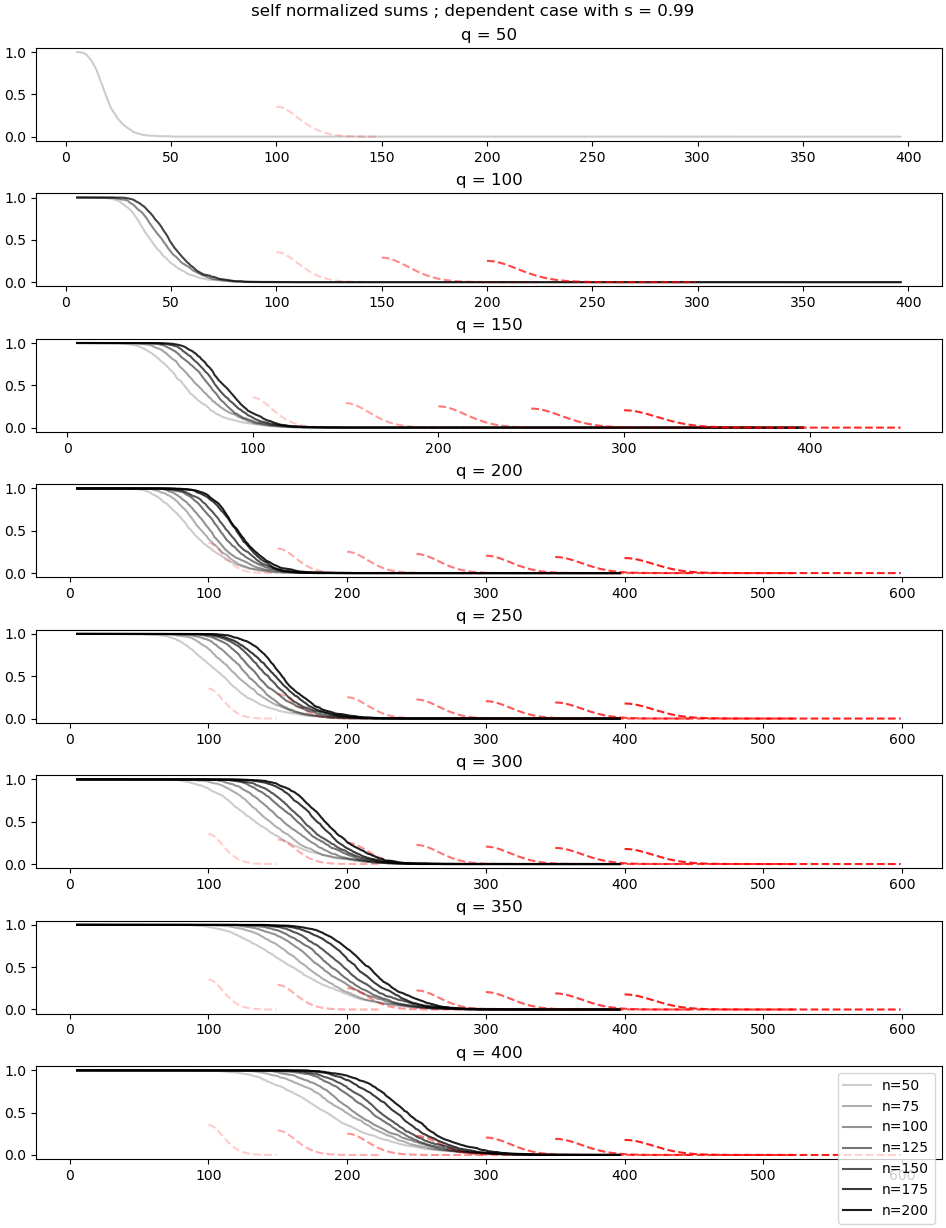

Text(0.5, 0.98, 'self normalized sums ; dependent case with s = 0.99')

In [72]:
sns_d_sigma099 = {}
for q in q_list:
    sns_d_sigma099[q]=[(k[0],s[:,1]) for k,s in data_d099.items() if k[1]==q]
    

self_collection = {}
self_collection = dict([(q,[i[1] for i in sns_d_sigma099[q]]) for q in q_list])

min_v = min([min(j) for i in self_collection.values() for j in i])
max_v = max([max(j) for i in self_collection.values() for j in i])
print(min_v,max_v)

%matplotlib notebook
fig, axs = plt.subplots(8, 1, constrained_layout=True)
axs = axs.ravel()

for j, q in enumerate(q_list) :
    elem = self_collection[q]
    for i in range(0,len(elem),1):
        n = n_list[i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        axs[j].plot(np.arange(min_v,max_v,1), 
                 list(map(cum_tail, np.arange(min_v,max_v,1))), label="n="+str(n_list[i]),
                color="black", alpha=0.2 + 0.8*(i/k))
        axs[j].set_title('q = '+str(q))
        axs[j].plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", color="red", alpha=0.2 + 0.8*(i/k))
axs[j].legend(loc="upper right")
fig.suptitle("self normalized sums ; dependent case with s = 0.99")

1.5995775657703097 45.91700505724189


<IPython.core.display.Javascript object>


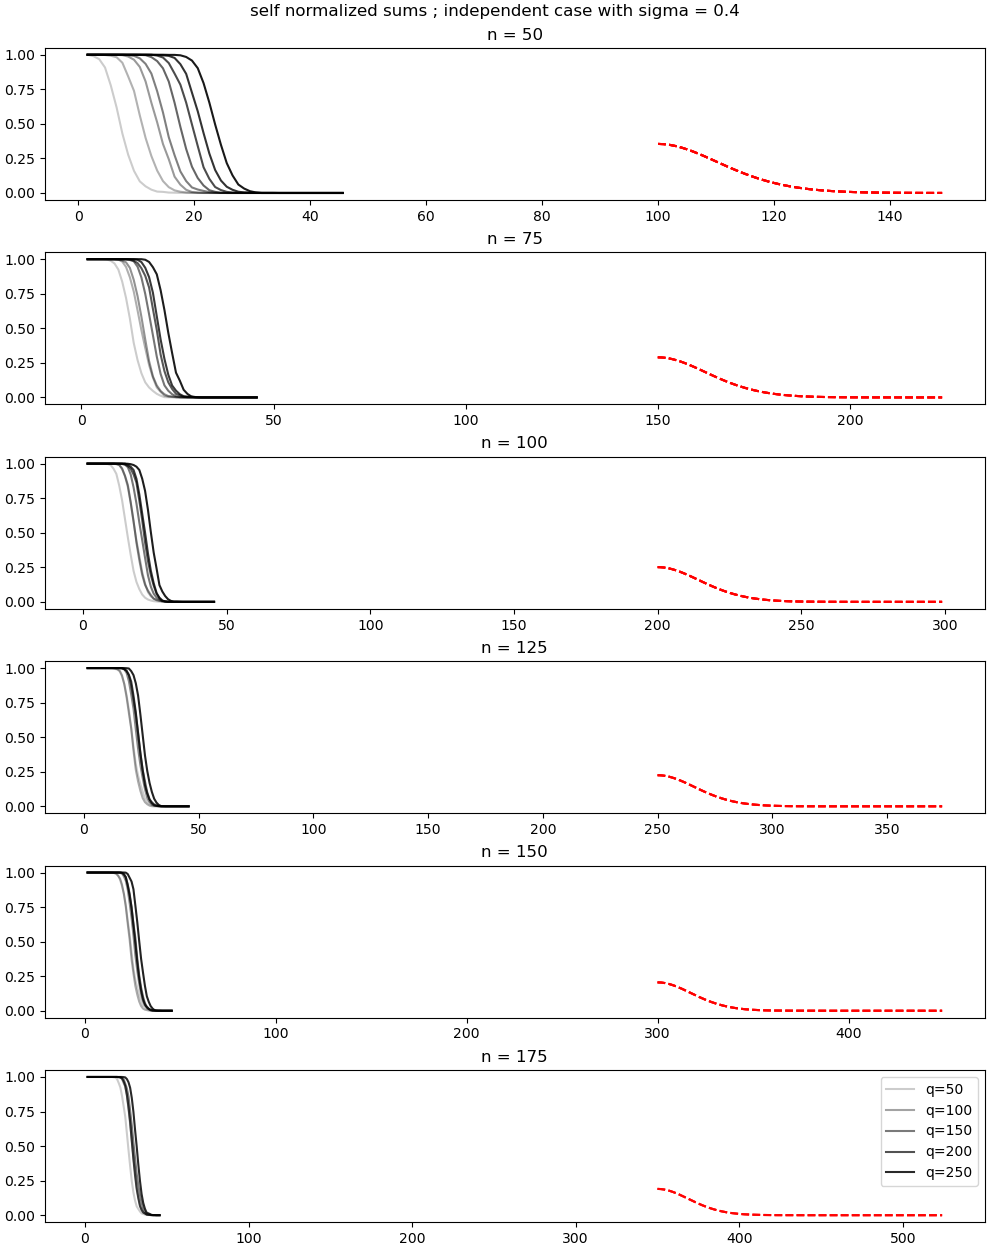

Text(0.5, 0.98, 'self normalized sums ; independent case with sigma = 0.4')

In [87]:
sns_i_sigma04 = {}
for n in n_list:
    sns_i_sigma04[n]=[(k[1],s[:,1]) for k,s in data_i4.items() if k[0]==n]
    
sns_i_sigma04.keys()

self_collection = {}
self_collection = dict([(n,[i[1] for i in sns_i_sigma04[n]]) for n in n_list])

min_v = min([min(j) for i in self_collection.values() for j in i])
max_v = max([max(j) for i in self_collection.values() for j in i])
print(min_v,max_v)

%matplotlib notebook
fig, axs = plt.subplots(6, 1, constrained_layout=True)
axs = axs.ravel()

for j, n in enumerate(n_list[:6]) :
    elem = self_collection[n]
    for i in range(0,len(elem),1):
        q = q_list[i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        axs[j].plot(np.arange(min_v,max_v,1), 
                 list(map(cum_tail, np.arange(min_v,max_v,1))), label="q="+str(q),
                color="black", alpha=0.2 + 0.8*(i/k))
        axs[j].set_title('n = '+str(n))
        axs[j].plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", color="red", alpha=0.2 + 0.8*(i/k))
axs[j].legend(loc="upper right")
fig.suptitle("self normalized sums ; independent case with sigma = 0.4")

In [81]:
names.keys()

dict_keys(['i4', 'i1', 'i2', 'd025', 'd06', 'd099'])

10.974327356978865 515.3209086199577


<IPython.core.display.Javascript object>


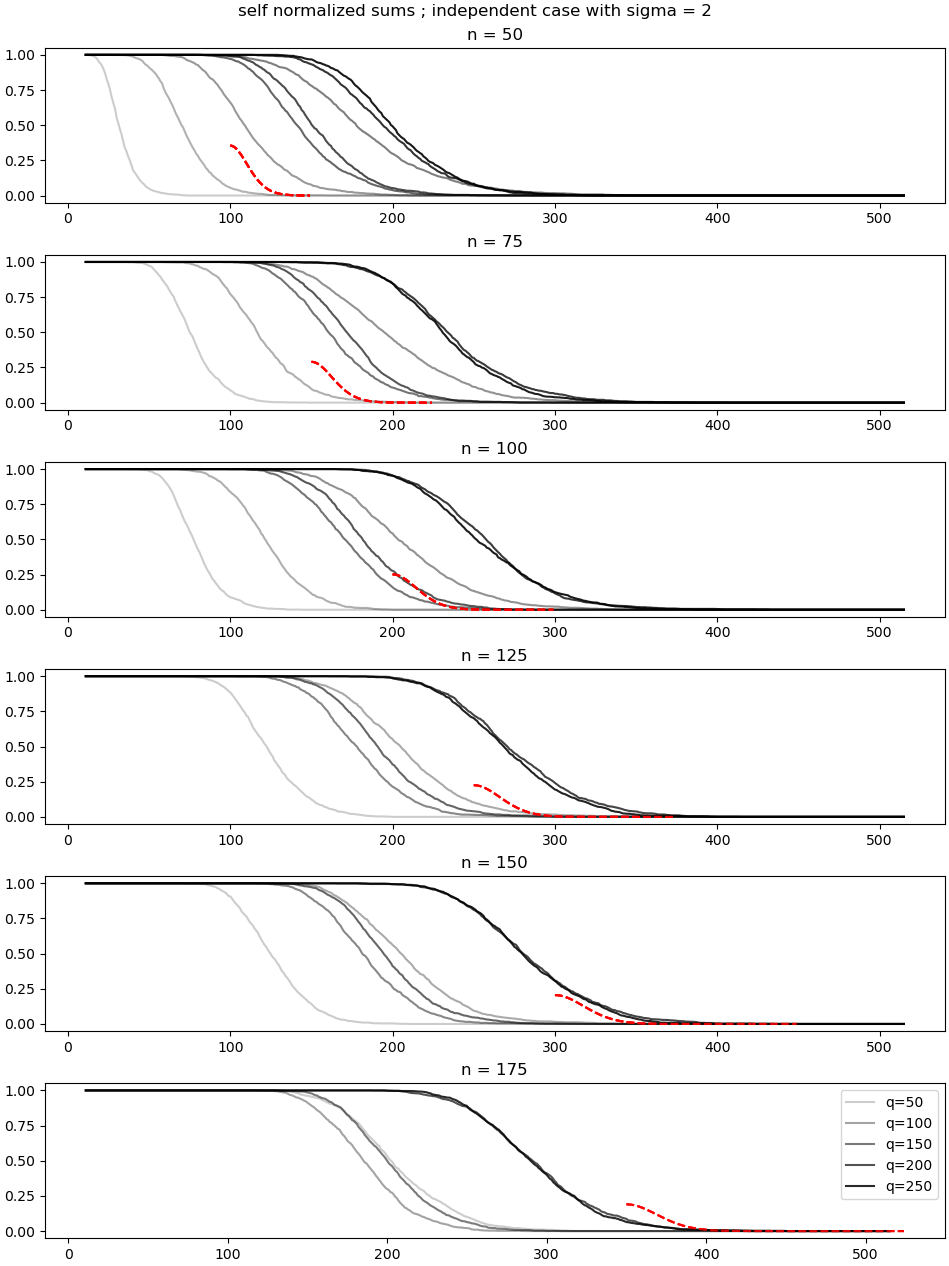

Text(0.5, 0.98, 'self normalized sums ; independent case with sigma = 2')

In [88]:
sns_i_sigma2 = {}
for n in n_list:
    sns_i_sigma2[n]=[(k[1],s[:,1]) for k,s in data_i2.items() if k[0]==n]

self_collection = {}
self_collection = dict([(n,[i[1] for i in sns_i_sigma2[n]]) for n in n_list])

min_v = min([min(j) for i in self_collection.values() for j in i])
max_v = max([max(j) for i in self_collection.values() for j in i])
print(min_v,max_v)

%matplotlib notebook
fig, axs = plt.subplots(6, 1, constrained_layout=True)
axs = axs.ravel()

for j, n in enumerate(n_list[:6]) :
    elem = self_collection[n]
    for i in range(0,len(elem),1):
        q = q_list[i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        axs[j].plot(np.arange(min_v,max_v,1), 
                 list(map(cum_tail, np.arange(min_v,max_v,1))), label="q="+str(q),
                color="black", alpha=0.2 + 0.8*(i/k))
        axs[j].set_title('n = '+str(n))
        axs[j].plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", color="red", alpha=0.2 + 0.8*(i/k))
axs[j].legend(loc="upper right")
fig.suptitle("self normalized sums ; independent case with sigma = 2")

5.4163799687973455 397.3764201542196


<IPython.core.display.Javascript object>


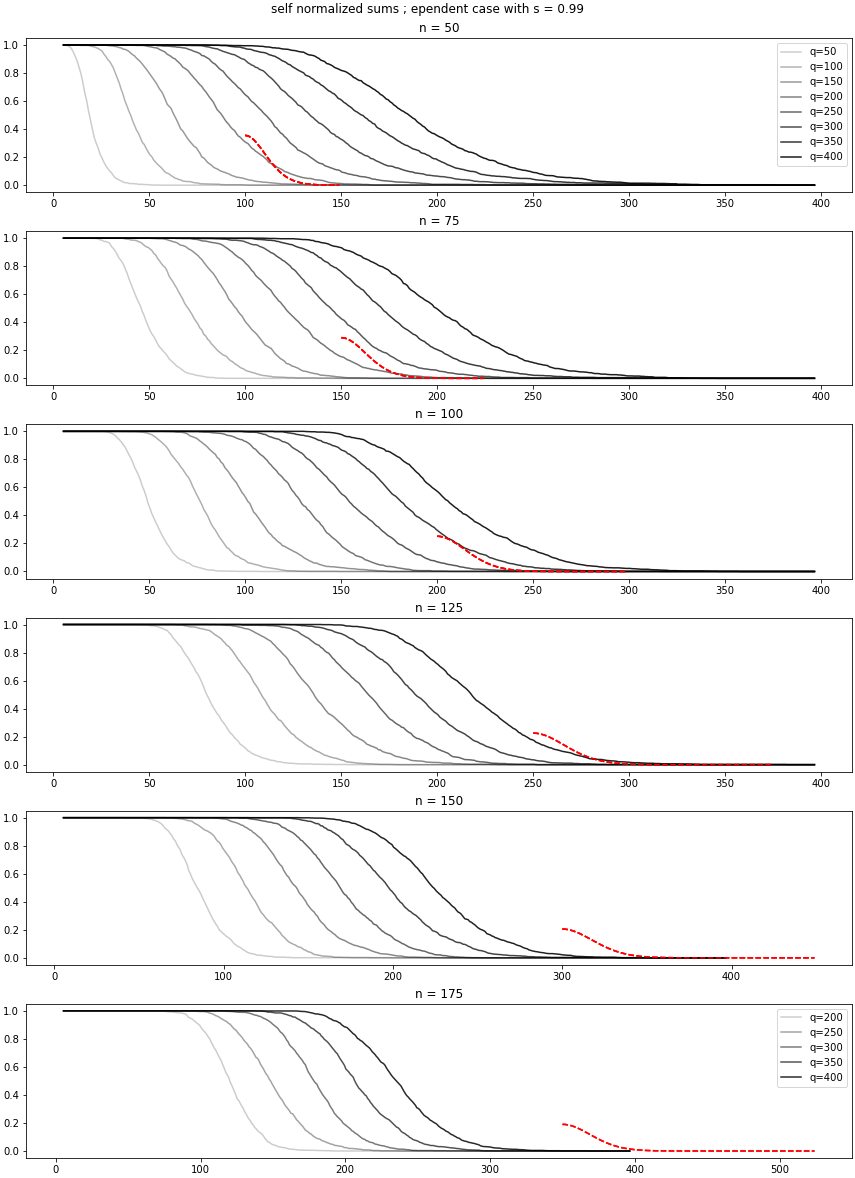

Text(0.5, 0.98, 'self normalized sums ; ependent case with s = 0.99')

In [114]:
sns_d_sigma099 = {}
for n in n_list:
    sns_d_sigma099[n]=[(k[1],s[:,1]) for k,s in data_d099.items() if k[0]==n]

self_collection = {}
self_collection = dict([(n,[i[1] for i in sns_d_sigma099[n]]) for n in n_list])

min_v = min([min(j) for i in self_collection.values() for j in i])
max_v = max([max(j) for i in self_collection.values() for j in i])
print(min_v,max_v)

%matplotlib notebook
fig, axs = plt.subplots(6, 1, constrained_layout=True)
axs = axs.ravel()

for j, n in enumerate(n_list[:6]) :
    elem = self_collection[n]
    for i in range(0,len(elem),1):
        q = [q for q in q_list if q >= n][i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        axs[j].plot(np.arange(min_v,max_v,1), 
                 list(map(cum_tail, np.arange(min_v,max_v,1))), label="q="+str(q),
                color="black", alpha=0.2 + 0.8*(i/k))
        axs[j].set_title('n = '+str(n))
        axs[j].plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", color="red", alpha=0.2 + 0.8*(i/k))
        if j == 0 or j == 5 : axs[j].legend(loc="upper right")
fig.suptitle("self normalized sums ; ependent case with s = 0.99")

<IPython.core.display.Javascript object>


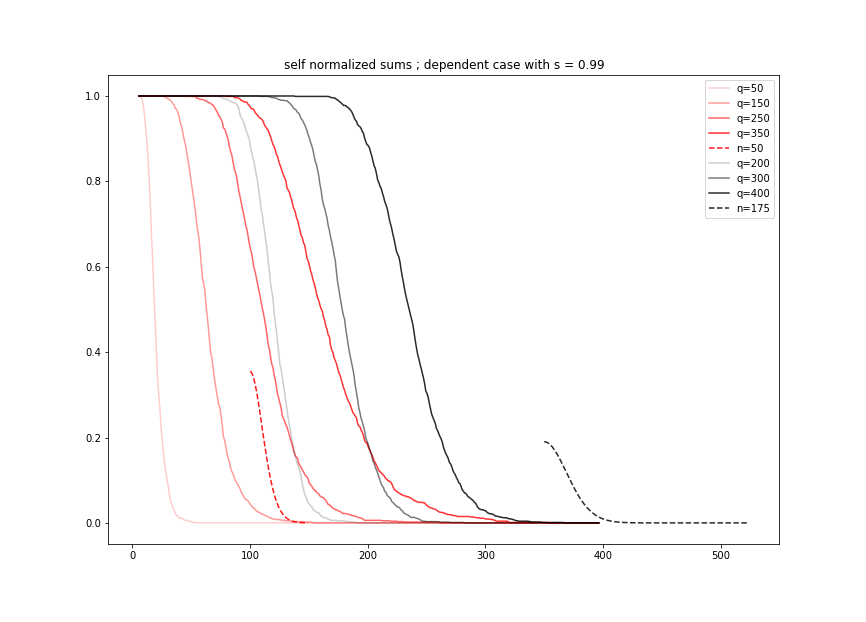

In [115]:
%matplotlib notebook
color = ["r", "b", "g", "orange", "purple","black" ]
for j, n in enumerate(n_list[:6]) :
    elem = self_collection[n]
    for i in range(0,len(elem),1):
        q = [q for q in q_list if q >= n][i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        if i%2 == 0 and (j == 0 or j == 5):
            plt.plot(np.arange(min_v,max_v,1), 
                     list(map(cum_tail, np.arange(min_v,max_v,1))), label="q="+str(q),
                    color=color[j], alpha=0.2 + 0.8*(i/k))
    if j == 0 or j == 5 : plt.plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", color=color[j], alpha=0.2 + 0.8*(i/k), label="n="+str(n))
plt.legend(loc = "upper right")
plt.title("self normalized sums ; dependent case with s = 0.99")
plt.show()

<IPython.core.display.Javascript object>


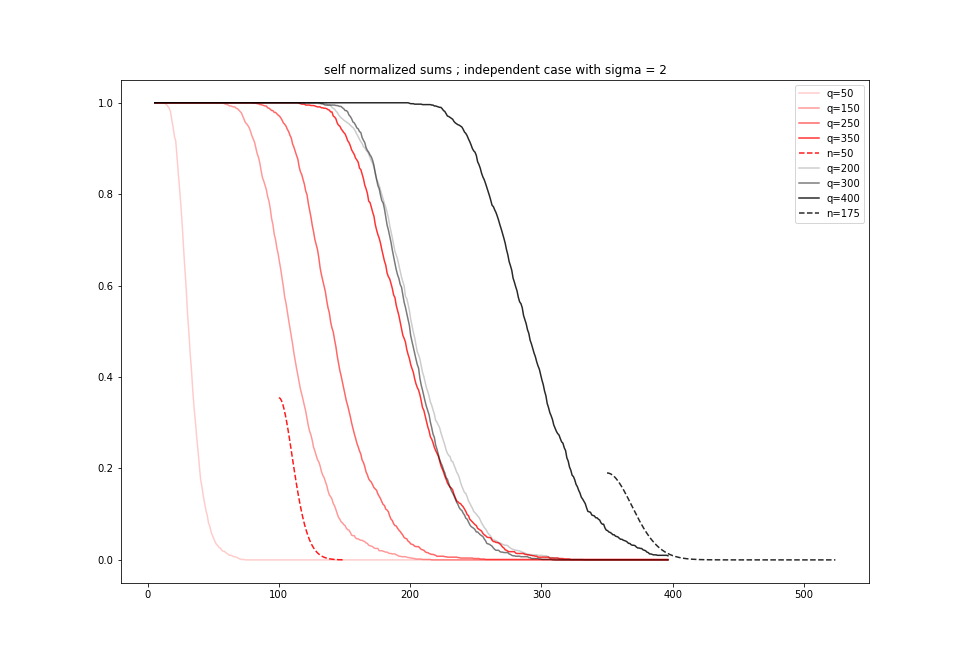

In [111]:
%matplotlib notebook

sns_i_sigma2 = {}
for n in n_list:
    sns_i_sigma2[n]=[(k[1],s[:,1]) for k,s in data_i2.items() if k[0]==n]
    
    
self_collection = {}
self_collection = dict([(n,[i[1] for i in sns_i_sigma2[n]]) for n in n_list])

color = ["r", "b", "g", "orange", "purple","black" ]
for j, n in enumerate(n_list[:6]) :
    elem = self_collection[n]
    for i in range(0,len(elem),1):
        q = [q for q in q_list if q >= n][i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        if i%2 == 0 and (j == 0 or j == 5):
            plt.plot(np.arange(min_v,max_v,1), 
                     list(map(cum_tail, np.arange(min_v,max_v,1))), label="q="+str(q),
                    color=color[j], alpha=0.2 + 0.8*(i/k))
    if j == 0 or j == 5 : plt.plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", color=color[j], alpha=0.2 + 0.8*(i/k), label="n="+str(n))
plt.legend(loc = "upper right")
plt.title("self normalized sums ; independent case with sigma = 2")
plt.show()

<IPython.core.display.Javascript object>


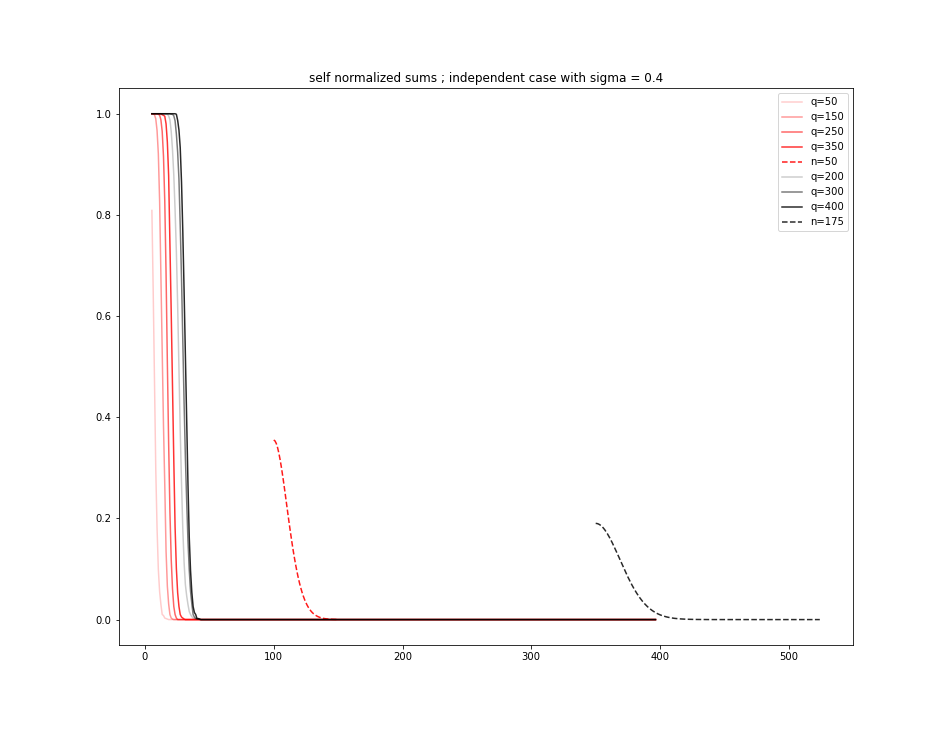

In [112]:
%matplotlib notebook

sns_i_sigma04 = {}
for n in n_list:
    sns_i_sigma04[n]=[(k[1],s[:,1]) for k,s in data_i4.items() if k[0]==n]
    
    
self_collection = {}
self_collection = dict([(n,[i[1] for i in sns_i_sigma04[n]]) for n in n_list])

color = ["r", "b", "g", "orange", "purple","black" ]
for j, n in enumerate(n_list[:6]) :
    elem = self_collection[n]
    for i in range(0,len(elem),1):
        q = [q for q in q_list if q >= n][i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        if i%2 == 0 and (j == 0 or j == 5):
            plt.plot(np.arange(min_v,max_v,1), 
                     list(map(cum_tail, np.arange(min_v,max_v,1))), label="q="+str(q),
                    color=color[j], alpha=0.2 + 0.8*(i/k))
    if j == 0 or j == 5 : plt.plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", color=color[j], alpha=0.2 + 0.8*(i/k), label="n="+str(n))
plt.legend(loc = "upper right")
plt.title("self normalized sums ; independent case with sigma = 0.4")
plt.show()

<IPython.core.display.Javascript object>


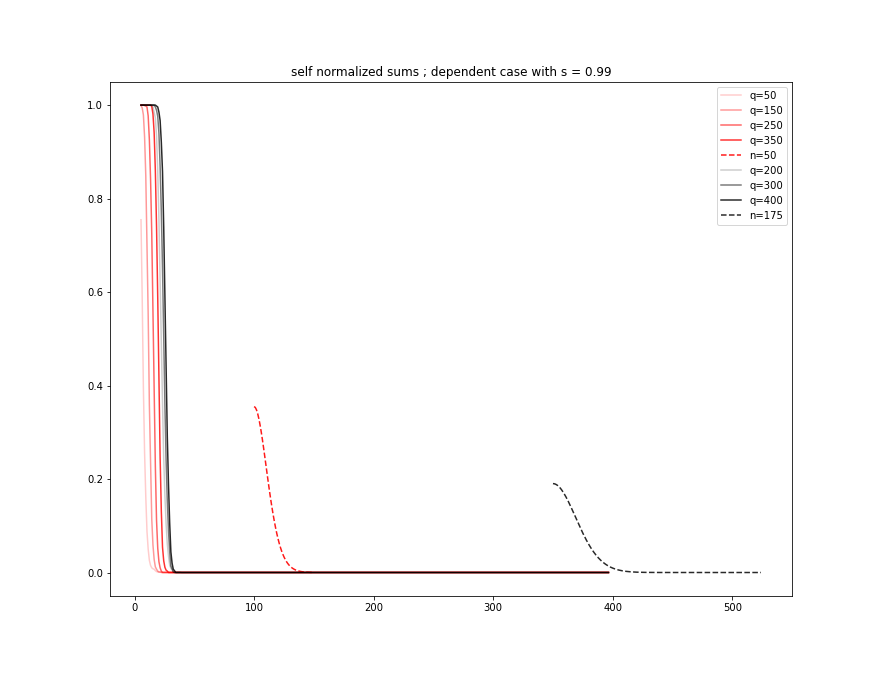

In [117]:
%matplotlib notebook

sns_d_sigma025 = {}
for n in n_list:
    sns_d_sigma025[n]=[(k[1],s[:,1]) for k,s in data_d025.items() if k[0]==n]

self_collection = {}
self_collection = dict([(n,[i[1] for i in sns_d_sigma025[n]]) for n in n_list])

color = ["r", "b", "g", "orange", "purple","black" ]
for j, n in enumerate(n_list[:6]) :
    elem = self_collection[n]
    for i in range(0,len(elem),1):
        q = [q for q in q_list if q >= n][i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        if i%2 == 0 and (j == 0 or j == 5):
            plt.plot(np.arange(min_v,max_v,1), 
                     list(map(cum_tail, np.arange(min_v,max_v,1))), label="q="+str(q),
                    color=color[j], alpha=0.2 + 0.8*(i/k))
    if j == 0 or j == 5 : plt.plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", color=color[j], alpha=0.2 + 0.8*(i/k), label="n="+str(n))
plt.legend(loc = "upper right")
plt.title("self normalized sums ; dependent case with s = 0.99")
plt.show()

---
---
---
---

In [151]:
data_d06.keys()

dict_keys([(50, 50), (50, 100), (50, 150), (50, 200), (50, 250), (50, 300), (50, 350), (50, 400), (75, 100), (75, 150), (75, 200), (75, 250), (75, 300), (75, 350), (75, 400), (100, 100), (100, 150), (100, 200), (100, 250), (100, 300), (100, 350), (100, 400), (125, 150), (125, 200), (125, 250), (125, 300), (125, 350), (125, 400), (150, 150), (150, 200), (150, 250), (150, 300), (150, 350), (150, 400), (175, 200), (175, 250), (175, 300), (175, 350), (175, 400), (200, 200), (200, 250), (200, 300), (200, 350), (200, 400)])

At left, x abcisses are varying from  9.886581408271274  to  191.29472951875638
At right x abcisses are varying from  0.001877292455035084  to  20.99255372015822


<IPython.core.display.Javascript object>


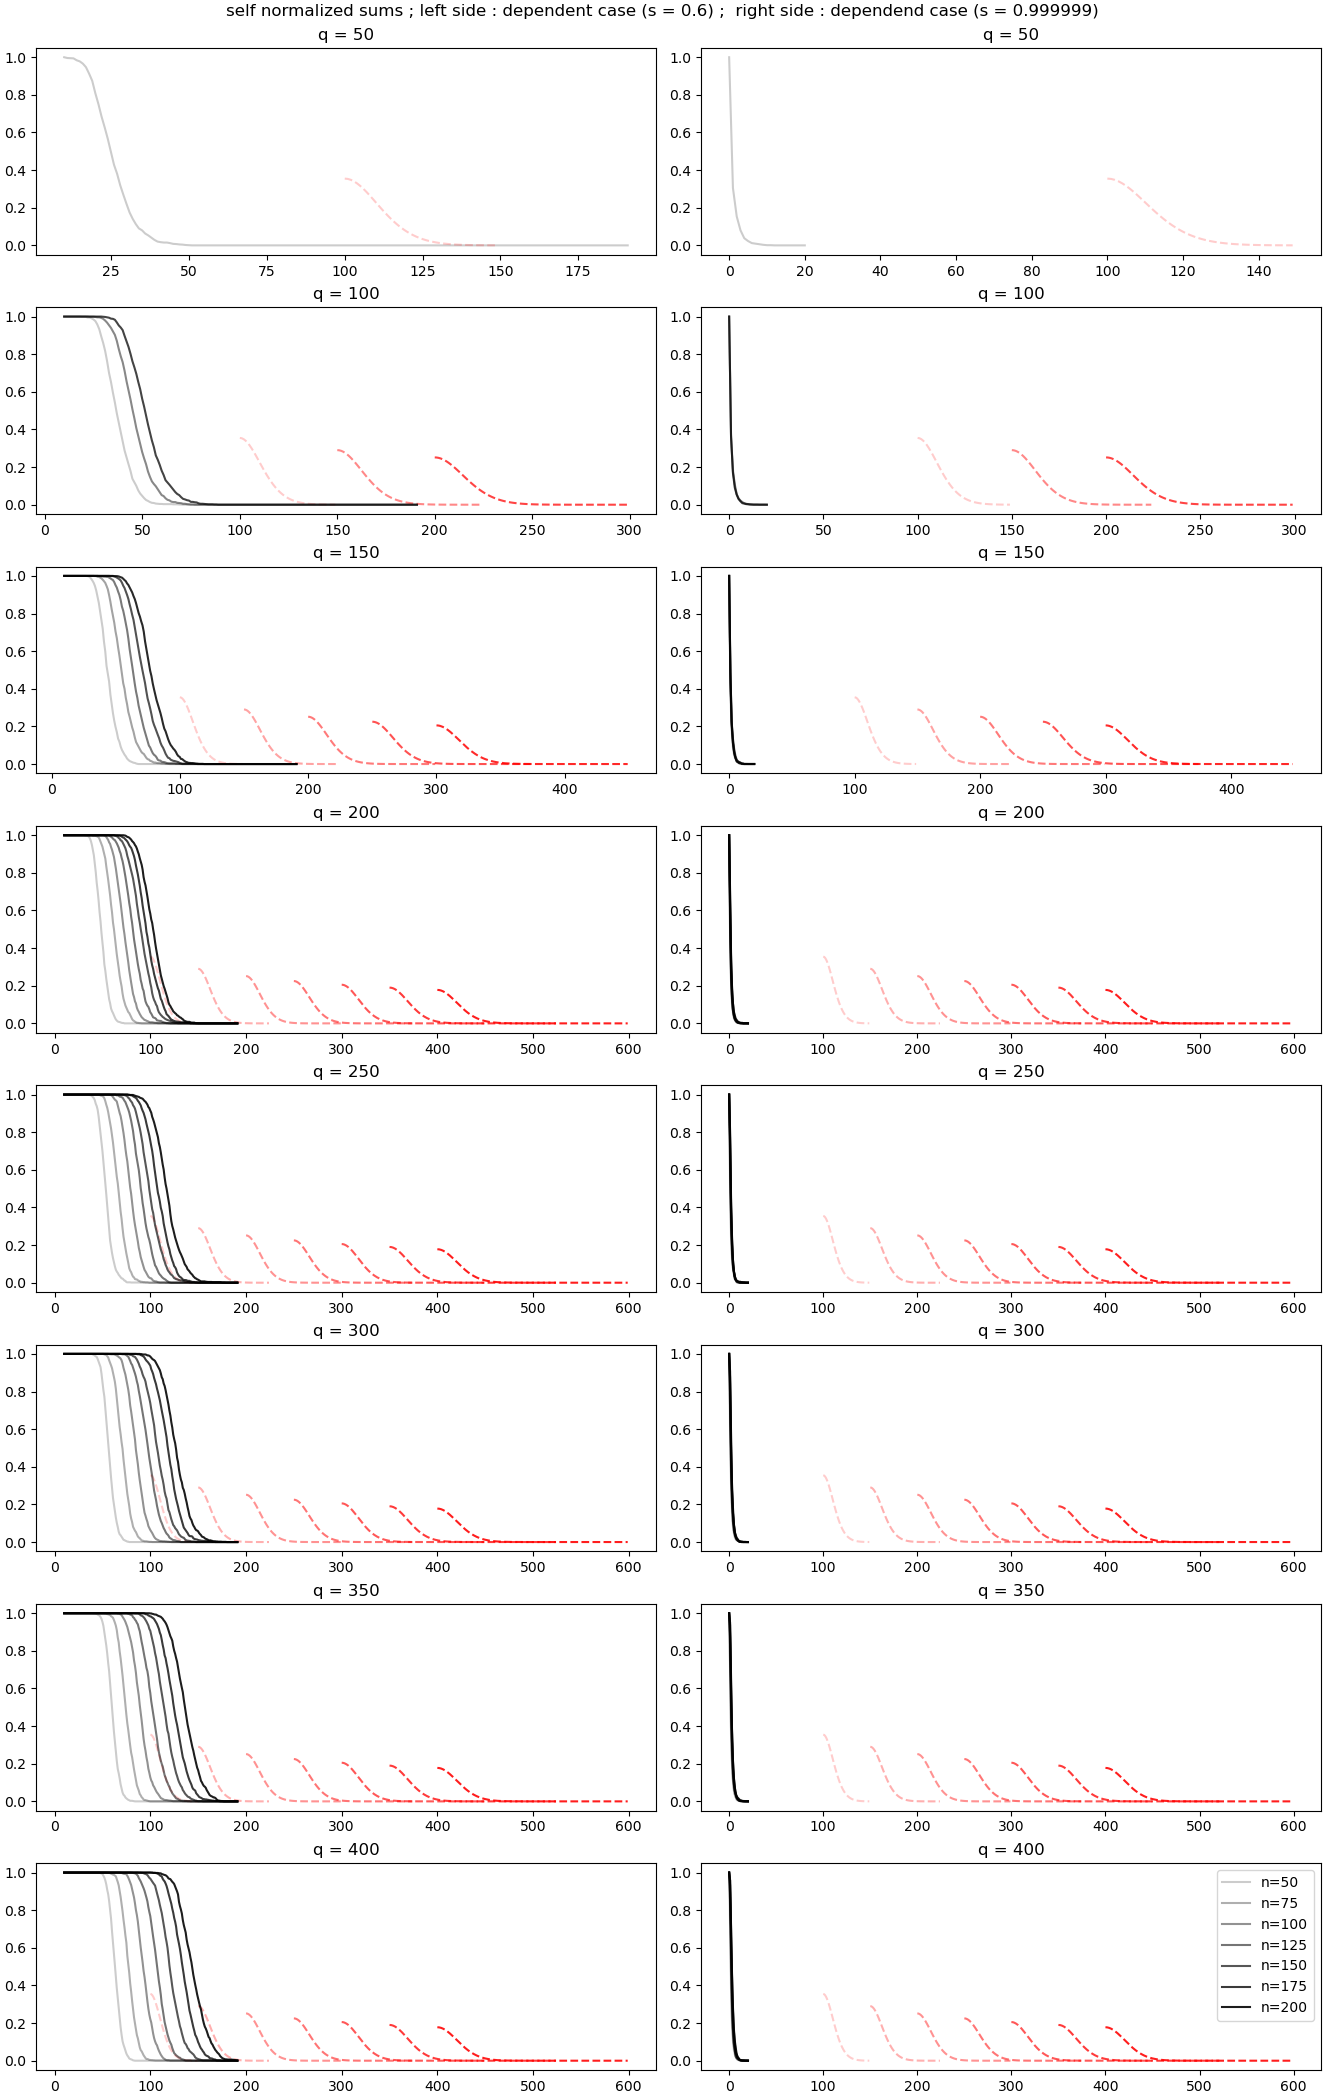

Text(0.5, 0.98, 'self normalized sums ; left side : dependent case (s = 0.6) ;  right side : dependend case (s = 0.999999)')

In [154]:
sns_d06 = {}
for q in q_list:
    sns_d06[q]=[(k[0],s[:,1]) for k,s in data_d06.items() if k[1]==q]
    

self_collection = {}
self_collection = dict([(q,[i[1] for i in sns_d06[q]]) for q in q_list])

min_v = min([min(j) for i in self_collection.values() for j in i])
max_v = max([max(j) for i in self_collection.values() for j in i])
print("At left, x abcisses are varying from ", min_v, " to ", max_v)

sns_d0999999 = {}
for q in q_list:
    sns_d0999999[q]=[(k[0],s[:,1]) for k,s in data_d0999999.items() if k[1]==q]
    

self_collection2 = {}
self_collection2 = dict([(q,[i[1] for i in sns_d0999999[q]]) for q in q_list])

min_v2 = min([min(j) for i in self_collection2.values() for j in i])
max_v2 = max([max(j) for i in self_collection2.values() for j in i])
print("At right x abcisses are varying from ", min_v2, " to ", max_v2)

%matplotlib notebook
fig, axs = plt.subplots(8, 2, constrained_layout=True)
axs = axs.ravel()

for j, q in enumerate(q_list) :
    elem = self_collection[q]
    for i in range(0,len(elem),1):
        n = n_list[i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        axs[2*j].plot(np.arange(min_v,max_v,1), 
                 list(map(cum_tail, np.arange(min_v,max_v,1))), label="n="+str(n),
                color="black", alpha=0.2 + 0.8*(i/k))
        axs[2*j].set_title('q = '+str(q))
        axs[2*j].plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", color="red", alpha=0.2 + 0.8*(i/k))
#axs[2*j].legend(loc="upper right")

for j, q in enumerate(q_list) :
    elem = self_collection2[q]
    for i in range(0,len(elem),1):
        n = n_list[i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        axs[2*j+1].plot(np.arange(min_v2,max_v2,1), 
                 list(map(cum_tail, np.arange(min_v2,max_v2,1))), label="n="+str(n),
                color="black", alpha=0.2 + 0.8*(i/k))
        axs[2*j+1].set_title('q = '+str(q))
        axs[2*j+1].plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", color="red", alpha=0.2 + 0.8*(i/k))
axs[2*j+1].legend(loc="upper right")

fig.suptitle("self normalized sums ; left side : dependent case (s = 0.6) ;  right side : dependend case (s = 0.999999)")

At left, x abcisses are varying from  7.107643981984153  to  138.8203345994718
At right x abcisses are varying from  14.295827342059706  to  834.8600837886366


<IPython.core.display.Javascript object>


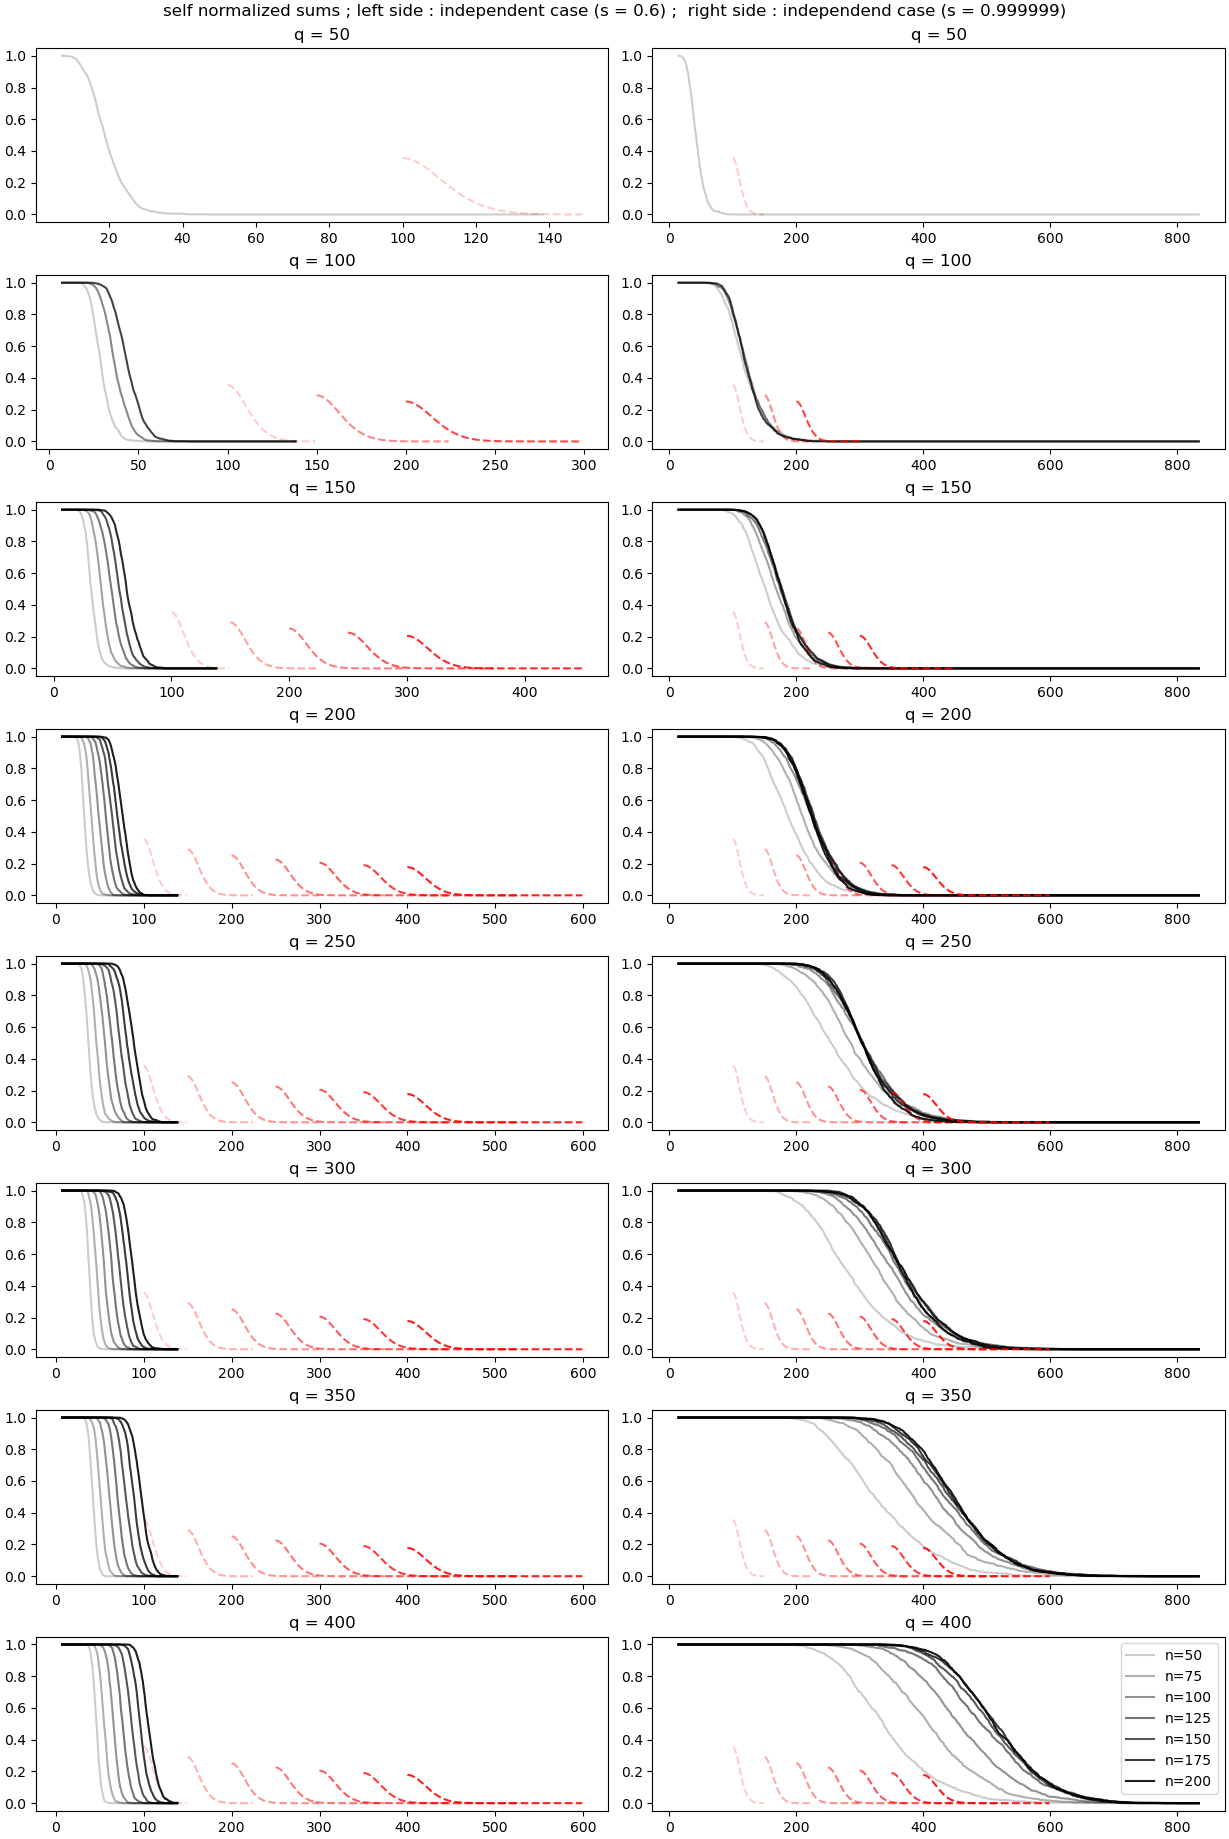

Text(0.5, 0.98, 'self normalized sums ; left side : independent case (s = 0.6) ;  right side : independend case (s = 0.999999)')

In [156]:
sns_i06 = {}
for q in q_list:
    sns_i06[q]=[(k[0],s[:,1]) for k,s in data_i_d06.items() if k[1]==q]
    

self_collection = {}
self_collection = dict([(q,[i[1] for i in sns_i06[q]]) for q in q_list])

min_v = min([min(j) for i in self_collection.values() for j in i])
max_v = max([max(j) for i in self_collection.values() for j in i])
print("At left, x abcisses are varying from ", min_v, " to ", max_v)

sns_i0999999 = {}
for q in q_list:
    sns_i0999999[q]=[(k[0],s[:,1]) for k,s in data_i_d0999999.items() if k[1]==q]
    

self_collection2 = {}
self_collection2 = dict([(q,[i[1] for i in sns_i0999999[q]]) for q in q_list])

min_v2 = min([min(j) for i in self_collection2.values() for j in i])
max_v2 = max([max(j) for i in self_collection2.values() for j in i])
print("At right x abcisses are varying from ", min_v2, " to ", max_v2)

%matplotlib notebook
fig, axs = plt.subplots(8, 2, constrained_layout=True)
axs = axs.ravel()

for j, q in enumerate(q_list) :
    elem = self_collection[q]
    for i in range(0,len(elem),1):
        n = n_list[i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        axs[2*j].plot(np.arange(min_v,max_v,1), 
                 list(map(cum_tail, np.arange(min_v,max_v,1))), label="n="+str(n),
                color="black", alpha=0.2 + 0.8*(i/k))
        axs[2*j].set_title('q = '+str(q))
        axs[2*j].plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", color="red", alpha=0.2 + 0.8*(i/k))
#axs[2*j].legend(loc="upper right")

for j, q in enumerate(q_list) :
    elem = self_collection2[q]
    for i in range(0,len(elem),1):
        n = n_list[i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        axs[2*j+1].plot(np.arange(min_v2,max_v2,1), 
                 list(map(cum_tail, np.arange(min_v2,max_v2,1))), label="n="+str(n),
                color="black", alpha=0.2 + 0.8*(i/k))
        axs[2*j+1].set_title('q = '+str(q))
        axs[2*j+1].plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", color="red", alpha=0.2 + 0.8*(i/k))
axs[2*j+1].legend(loc="upper right")

fig.suptitle("self normalized sums ; left side : independent case (s = 0.6) ;  right side : independend case (s = 0.999999)")

In [160]:
for i in range(10):
    print(9-i)

9
8
7
6
5
4
3
2
1
0


At left, x abcisses are varying from  7.107643981984153  to  138.8203345994718
At right x abcisses are varying from  14.295827342059706  to  834.8600837886366


<IPython.core.display.Javascript object>


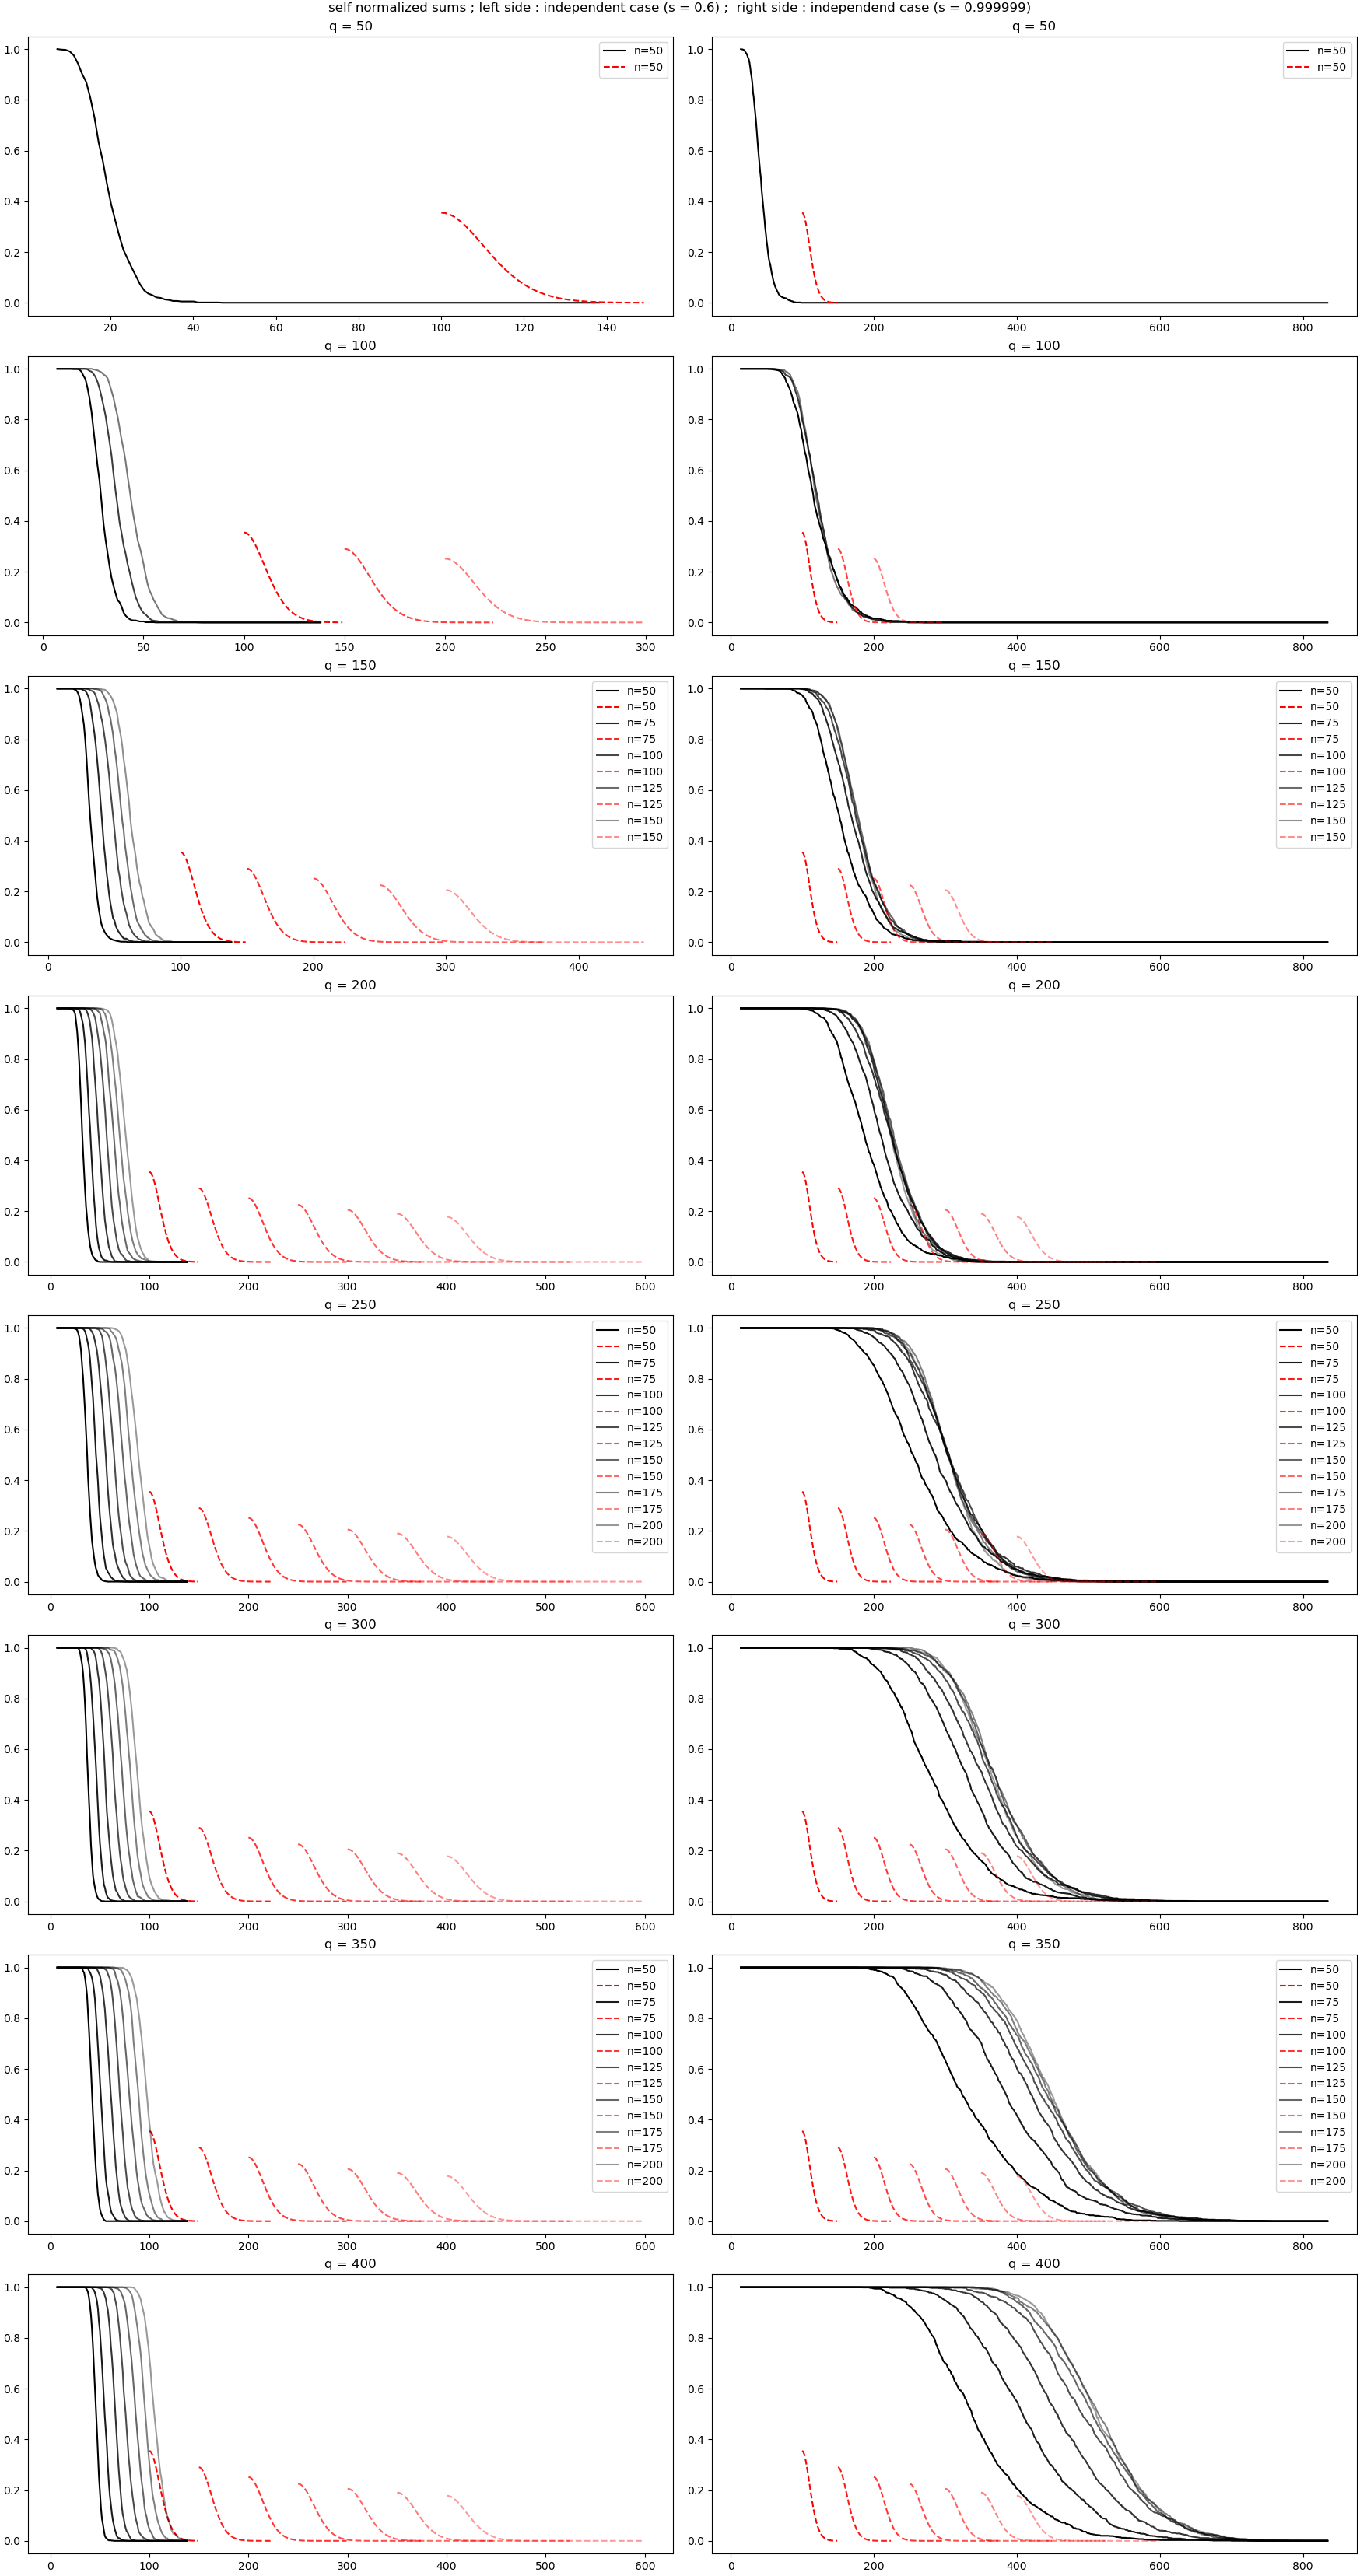

Text(0.5, 0.98, 'self normalized sums ; left side : independent case (s = 0.6) ;  right side : independend case (s = 0.999999)')

In [166]:
sns_i06 = {}
for q in q_list:
    sns_i06[q]=[(k[0],s[:,1]) for k,s in data_i_d06.items() if k[1]==q]
    

self_collection = {}
self_collection = dict([(q,[i[1] for i in sns_i06[q]]) for q in q_list])

min_v = min([min(j) for i in self_collection.values() for j in i])
max_v = max([max(j) for i in self_collection.values() for j in i])
print("At left, x abcisses are varying from ", min_v, " to ", max_v)

sns_i0999999 = {}
for q in q_list:
    sns_i0999999[q]=[(k[0],s[:,1]) for k,s in data_i_d0999999.items() if k[1]==q]
    

self_collection2 = {}
self_collection2 = dict([(q,[i[1] for i in sns_i0999999[q]]) for q in q_list])

min_v2 = min([min(j) for i in self_collection2.values() for j in i])
max_v2 = max([max(j) for i in self_collection2.values() for j in i])
print("At right x abcisses are varying from ", min_v2, " to ", max_v2)

%matplotlib notebook
fig, axs = plt.subplots(8, 2, constrained_layout=True)
axs = axs.ravel()

for j, q in enumerate(q_list) :
    elem = self_collection[q]
    for i in range(0,len(elem),1):
        n = n_list[i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        axs[2*j].plot(np.arange(min_v,max_v,1), 
                 list(map(cum_tail, np.arange(min_v,max_v,1))), label="n="+str(n),
                color="black", alpha=0.3 + 0.7*((k-i)/k))
        axs[2*j].set_title('q = '+str(q))
        axs[2*j].plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", label="n="+str(n), color="red", alpha=0.3 + 0.7*((k-i)/k))
    if j%2 == 0 : axs[2*j].legend(loc="upper right")

for j, q in enumerate(q_list) :
    elem = self_collection2[q]
    for i in range(0,len(elem),1):
        n = n_list[i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        axs[2*j+1].plot(np.arange(min_v2,max_v2,1), 
                 list(map(cum_tail, np.arange(min_v2,max_v2,1))), label="n="+str(n),
                color="black", alpha=0.3 + 0.7*((k-i)/k))
        axs[2*j+1].set_title('q = '+str(q))
        axs[2*j+1].plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", label="n="+str(n), color="red", alpha=0.3 + 0.7*((k-i)/k))
    if j%2 == 0 : axs[2*j+1].legend(loc="upper right")

fig.suptitle("self normalized sums ; left side : independent case (s = 0.6) ;  right side : independend case (s = 0.999999)")

At left, x abcisses are varying from  3.5538219909920765  to  69.4101672997359
At right x abcisses are varying from  4.943290704135637  to  95.64736475937819


<IPython.core.display.Javascript object>


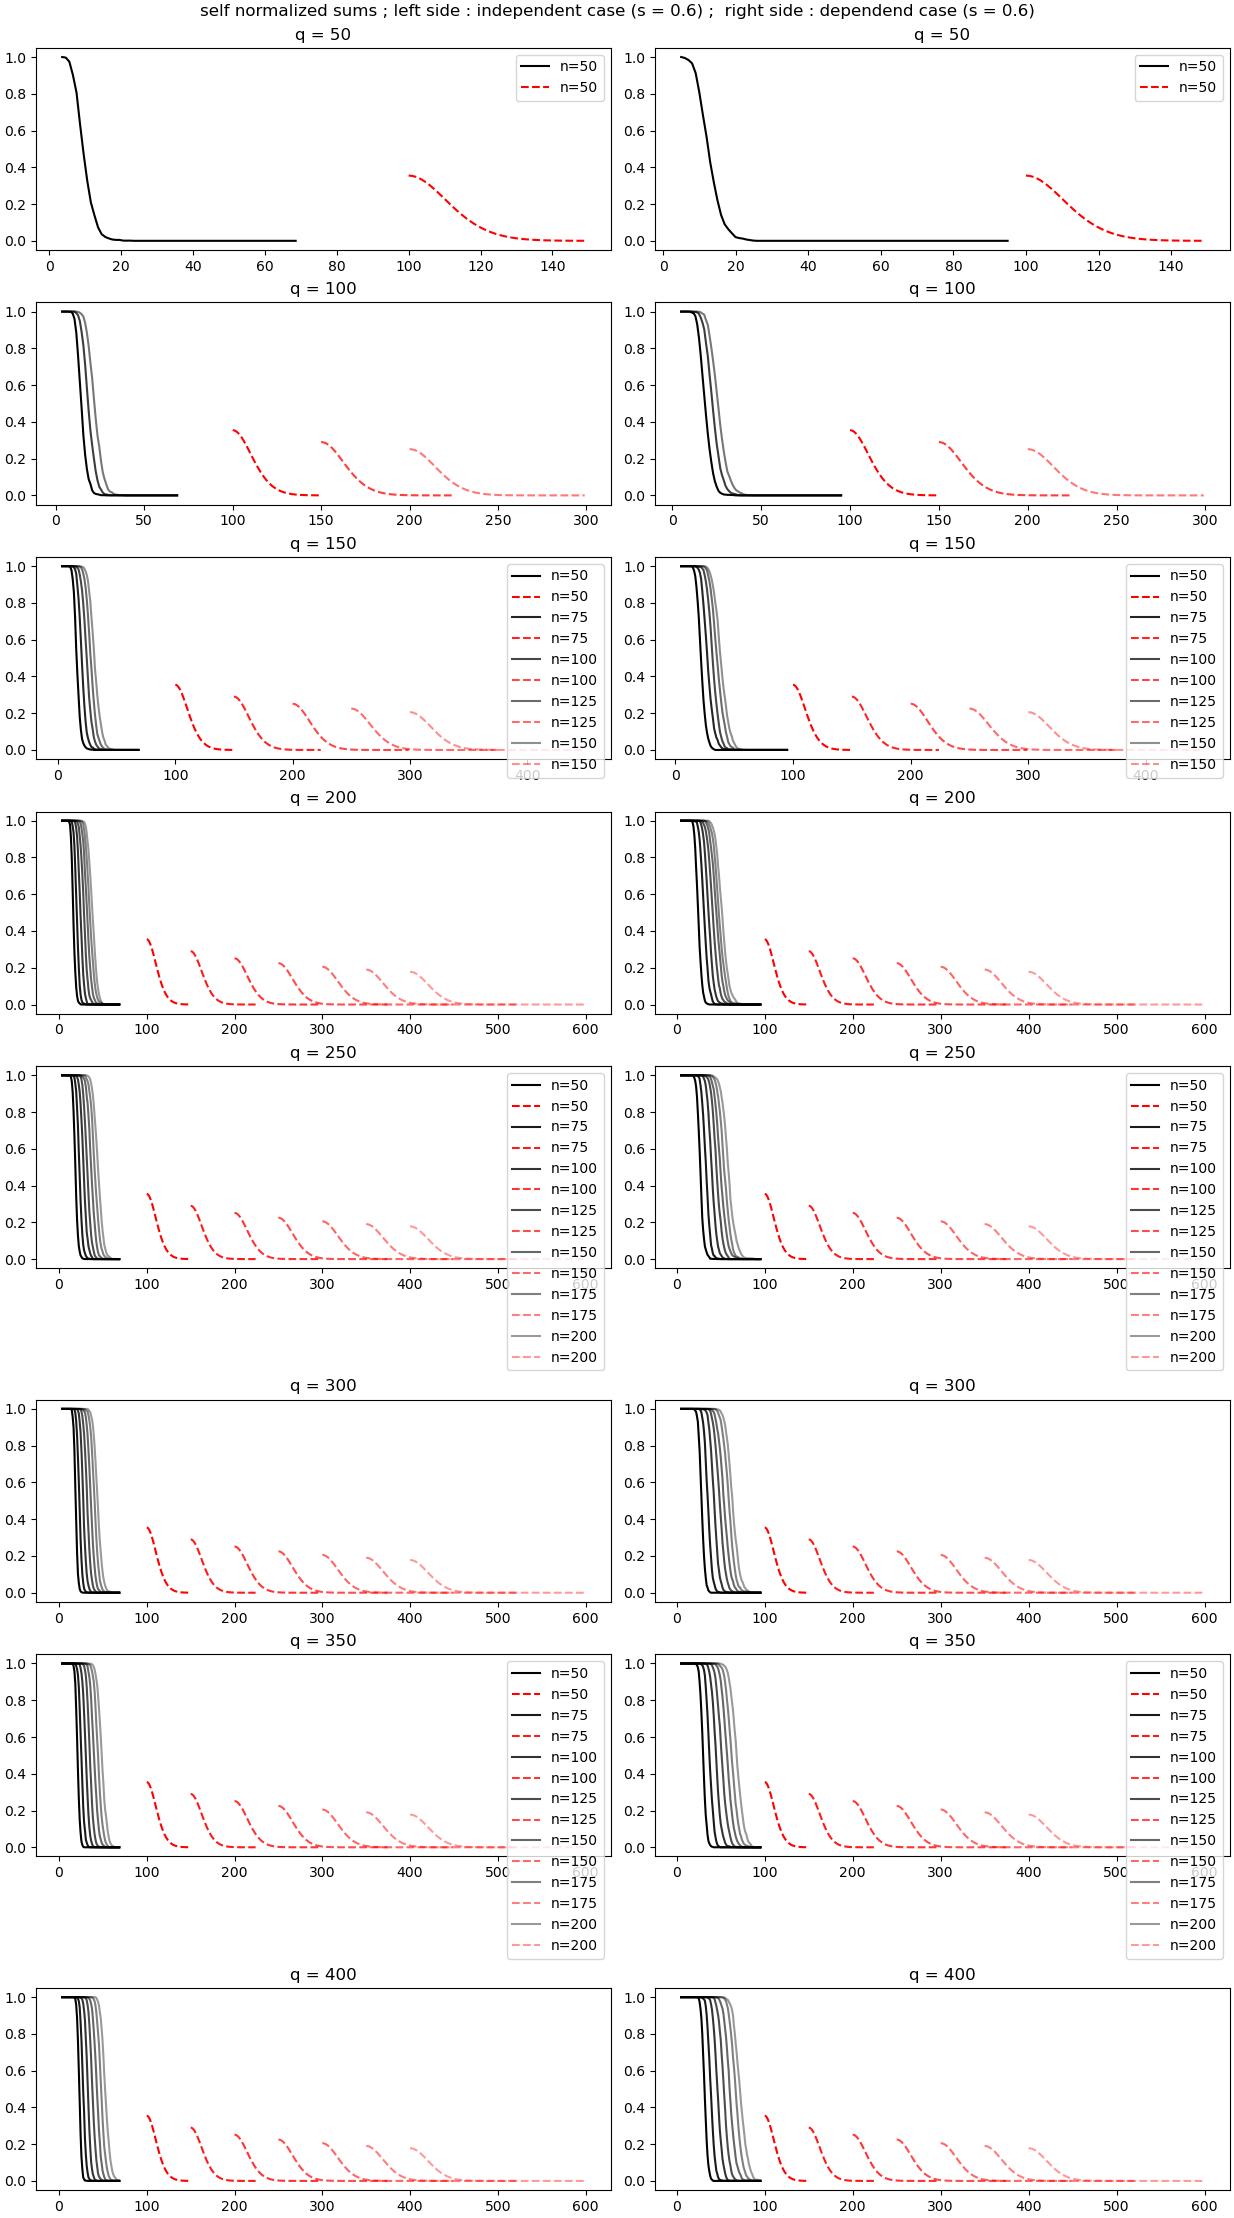

Text(0.5, 0.98, 'self normalized sums ; left side : independent case (s = 0.6) ;  right side : dependend case (s = 0.6)')

In [39]:
sns_i06 = {}
for q in q_list:
    sns_i06[q]=[(k[0],s[:,1]/2) for k,s in data_i_d06.items() if k[1]==q]
    

self_collection = {}
self_collection = dict([(q,[i[1] for i in sns_i06[q]]) for q in q_list])

min_v = min([min(j) for i in self_collection.values() for j in i])
max_v = max([max(j) for i in self_collection.values() for j in i])
print("At left, x abcisses are varying from ", min_v, " to ", max_v)

sns_d06 = {}
for q in q_list:
    sns_d06[q]=[(k[0],s[:,1]/2) for k,s in data_d06.items() if k[1]==q]
    

self_collection2 = {}
self_collection2 = dict([(q,[i[1] for i in sns_d06[q]]) for q in q_list])

min_v2 = min([min(j) for i in self_collection2.values() for j in i])
max_v2 = max([max(j) for i in self_collection2.values() for j in i])
print("At right x abcisses are varying from ", min_v2, " to ", max_v2)

%matplotlib notebook
fig, axs = plt.subplots(8, 2, constrained_layout=True)
axs = axs.ravel()

for j, q in enumerate(q_list) :
    elem = self_collection[q]
    for i in range(0,len(elem),1):
        n = n_list[i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        axs[2*j].plot(np.arange(min_v,max_v,1), 
                 list(map(cum_tail, np.arange(min_v,max_v,1))), label="n="+str(n),
                color="black", alpha=0.3 + 0.7*((k-i)/k))
        axs[2*j].set_title('q = '+str(q))
        axs[2*j].plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", label="n="+str(n), color="red", alpha=0.3 + 0.7*((k-i)/k))
    if j%2 == 0 : axs[2*j].legend(loc="upper right")

for j, q in enumerate(q_list) :
    elem = self_collection2[q]
    for i in range(0,len(elem),1):
        n = n_list[i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        axs[2*j+1].plot(np.arange(min_v2,max_v2,1), 
                 list(map(cum_tail, np.arange(min_v2,max_v2,1))), label="n="+str(n),
                color="black", alpha=0.3 + 0.7*((k-i)/k))
        axs[2*j+1].set_title('q = '+str(q))
        axs[2*j+1].plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", label="n="+str(n), color="red", alpha=0.3 + 0.7*((k-i)/k))
    if j%2 == 0 : axs[2*j+1].legend(loc="upper right")

fig.suptitle("self normalized sums ; left side : independent case (s = 0.6) ;  right side : dependend case (s = 0.6)")

At left, x abcisses are varying from  7.147913671029853  to  417.4300418943183
At right x abcisses are varying from  0.000938646227517542  to  10.49627686007911


<IPython.core.display.Javascript object>


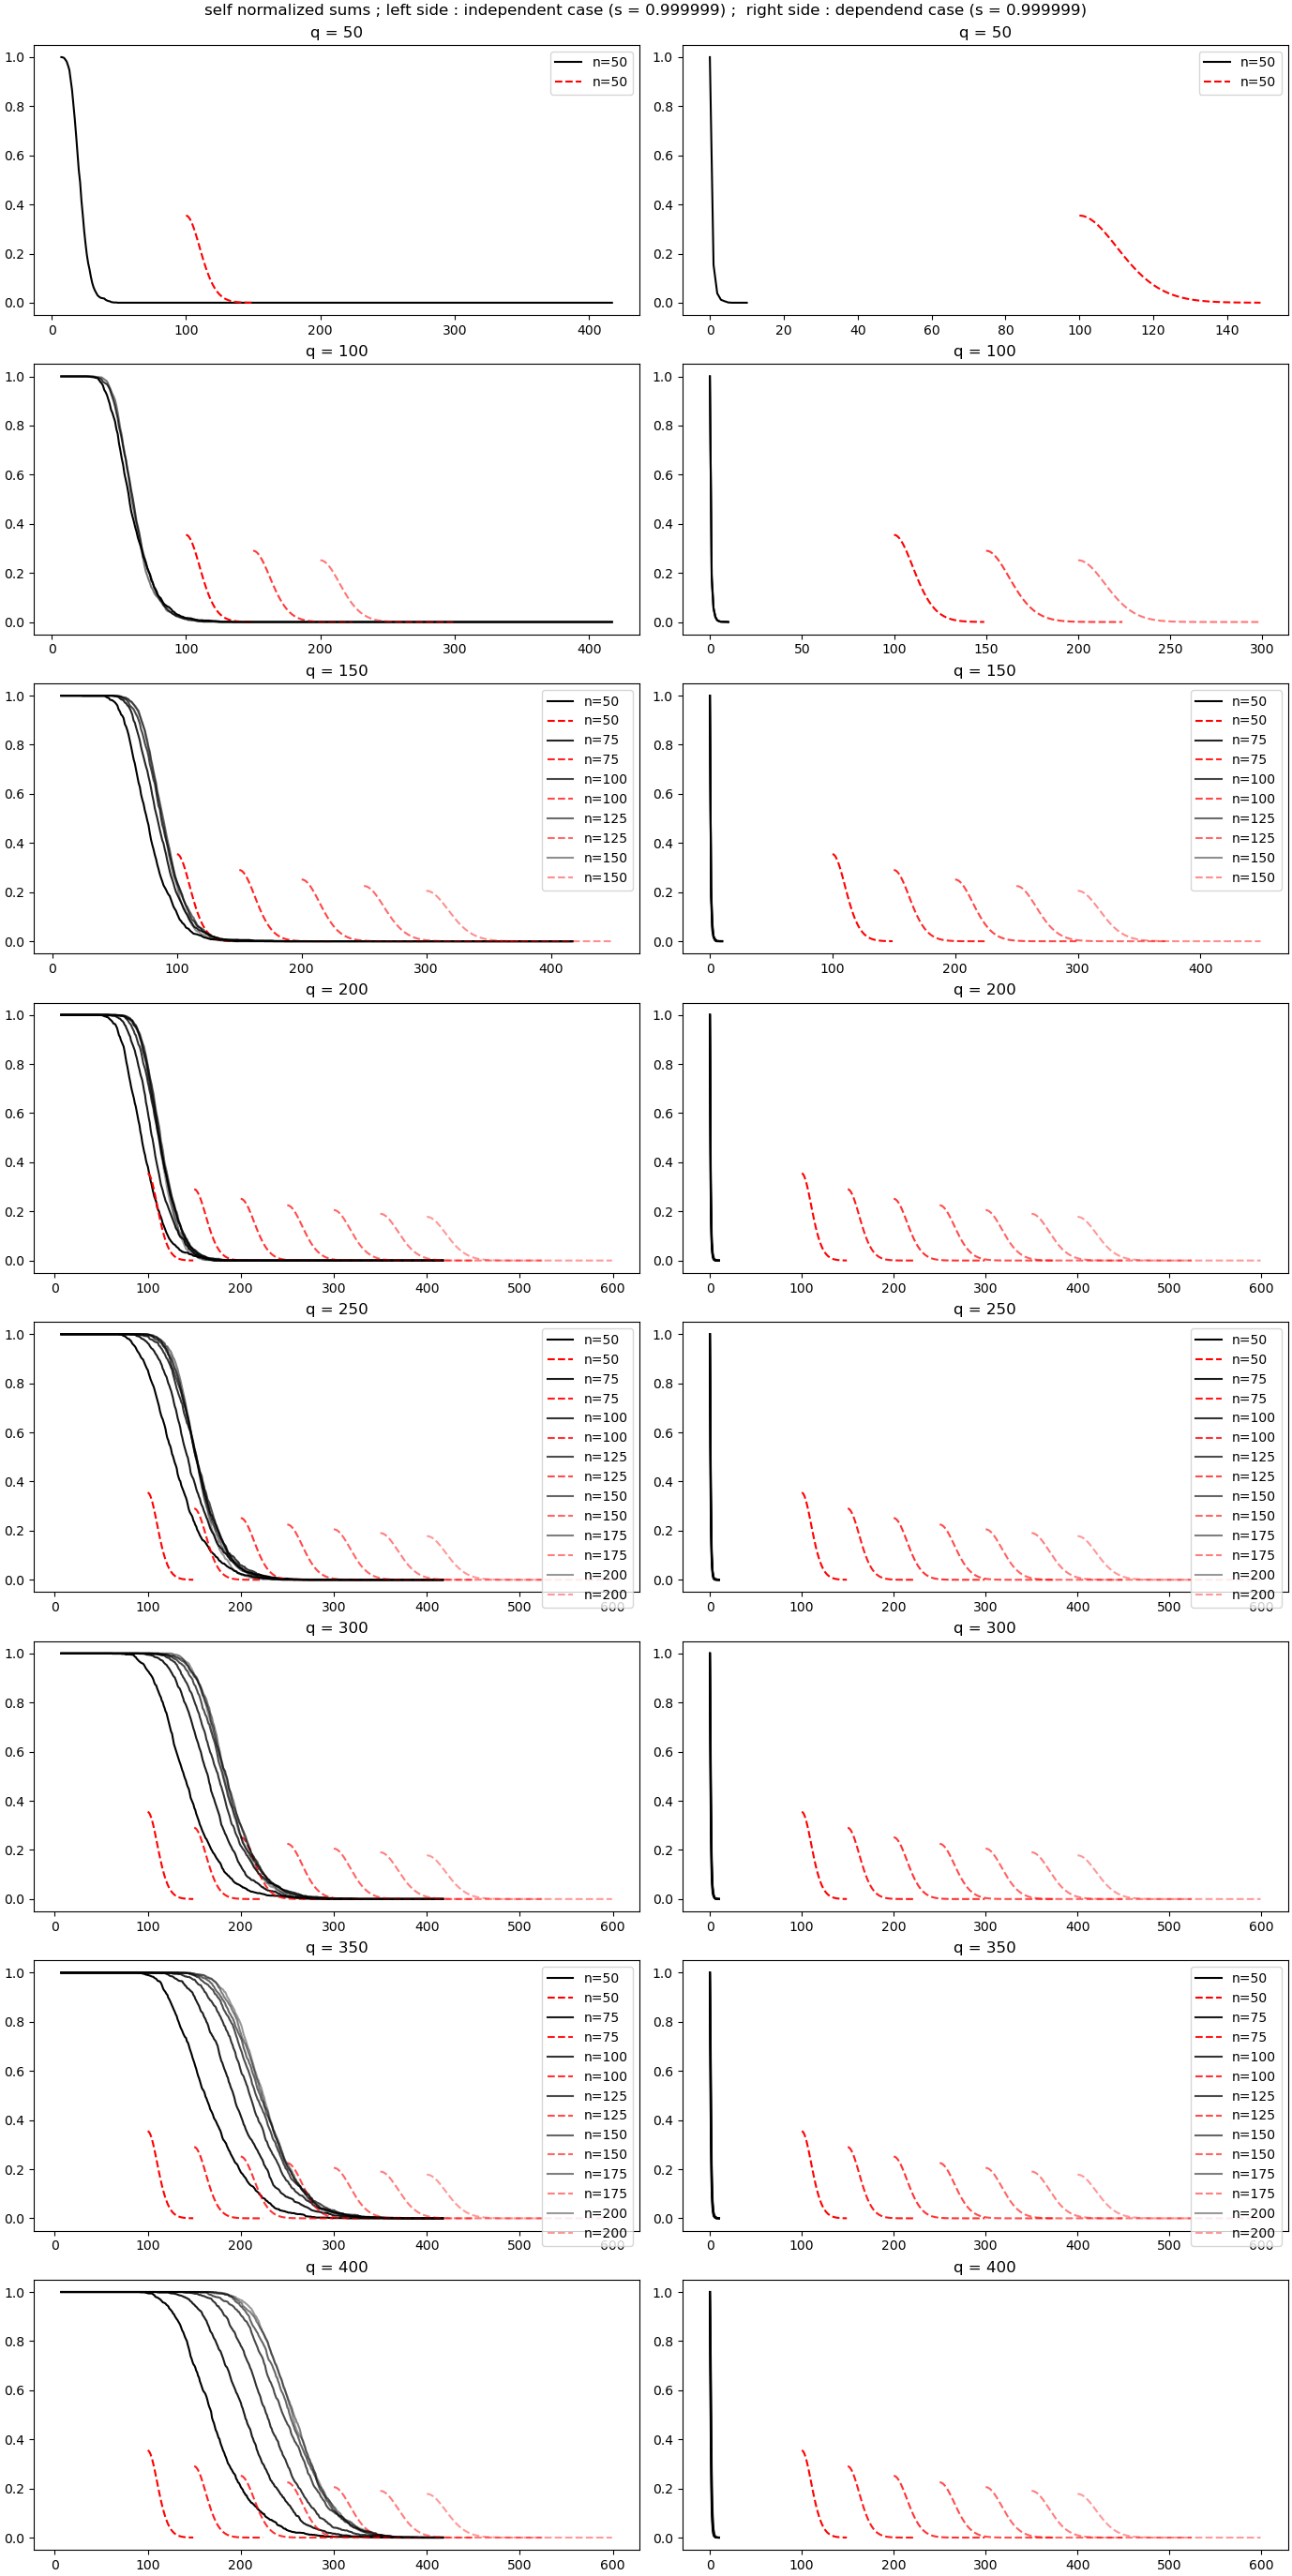

Text(0.5, 0.98, 'self normalized sums ; left side : independent case (s = 0.999999) ;  right side : dependend case (s = 0.999999)')

In [40]:
sns_i0999999 = {}
for q in q_list:
    sns_i0999999[q]=[(k[0],s[:,1]/2) for k,s in data_i_d0999999.items() if k[1]==q]
    

self_collection = {}
self_collection = dict([(q,[i[1] for i in sns_i0999999[q]]) for q in q_list])

min_v = min([min(j) for i in self_collection.values() for j in i])
max_v = max([max(j) for i in self_collection.values() for j in i])
print("At left, x abcisses are varying from ", min_v, " to ", max_v)

sns_d0999999 = {}
for q in q_list:
    sns_d0999999[q]=[(k[0],s[:,1]/2) for k,s in data_d0999999.items() if k[1]==q]
    

self_collection2 = {}
self_collection2 = dict([(q,[i[1] for i in sns_d0999999[q]]) for q in q_list])

min_v2 = min([min(j) for i in self_collection2.values() for j in i])
max_v2 = max([max(j) for i in self_collection2.values() for j in i])
print("At right x abcisses are varying from ", min_v2, " to ", max_v2)

%matplotlib notebook
fig, axs = plt.subplots(8, 2, constrained_layout=True)
axs = axs.ravel()

for j, q in enumerate(q_list) :
    elem = self_collection[q]
    for i in range(0,len(elem),1):
        n = n_list[i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        axs[2*j].plot(np.arange(min_v,max_v,1), 
                 list(map(cum_tail, np.arange(min_v,max_v,1))), label="n="+str(n),
                color="black", alpha=0.3 + 0.7*((k-i)/k))
        axs[2*j].set_title('q = '+str(q))
        axs[2*j].plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", label="n="+str(n), color="red", alpha=0.3 + 0.7*((k-i)/k))
    if j%2 == 0 : axs[2*j].legend(loc="upper right")

for j, q in enumerate(q_list) :
    elem = self_collection2[q]
    for i in range(0,len(elem),1):
        n = n_list[i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        axs[2*j+1].plot(np.arange(min_v2,max_v2,1), 
                 list(map(cum_tail, np.arange(min_v2,max_v2,1))), label="n="+str(n),
                color="black", alpha=0.3 + 0.7*((k-i)/k))
        axs[2*j+1].set_title('q = '+str(q))
        axs[2*j+1].plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", label="n="+str(n), color="red", alpha=0.3 + 0.7*((k-i)/k))
    if j%2 == 0 : axs[2*j+1].legend(loc="upper right")

fig.suptitle("self normalized sums ; left side : independent case (s = 0.999999) ;  right side : dependend case (s = 0.999999)")

At left, x abcisses are varying from  2.8784473234331536  to  199.06116442264096


<IPython.core.display.Javascript object>


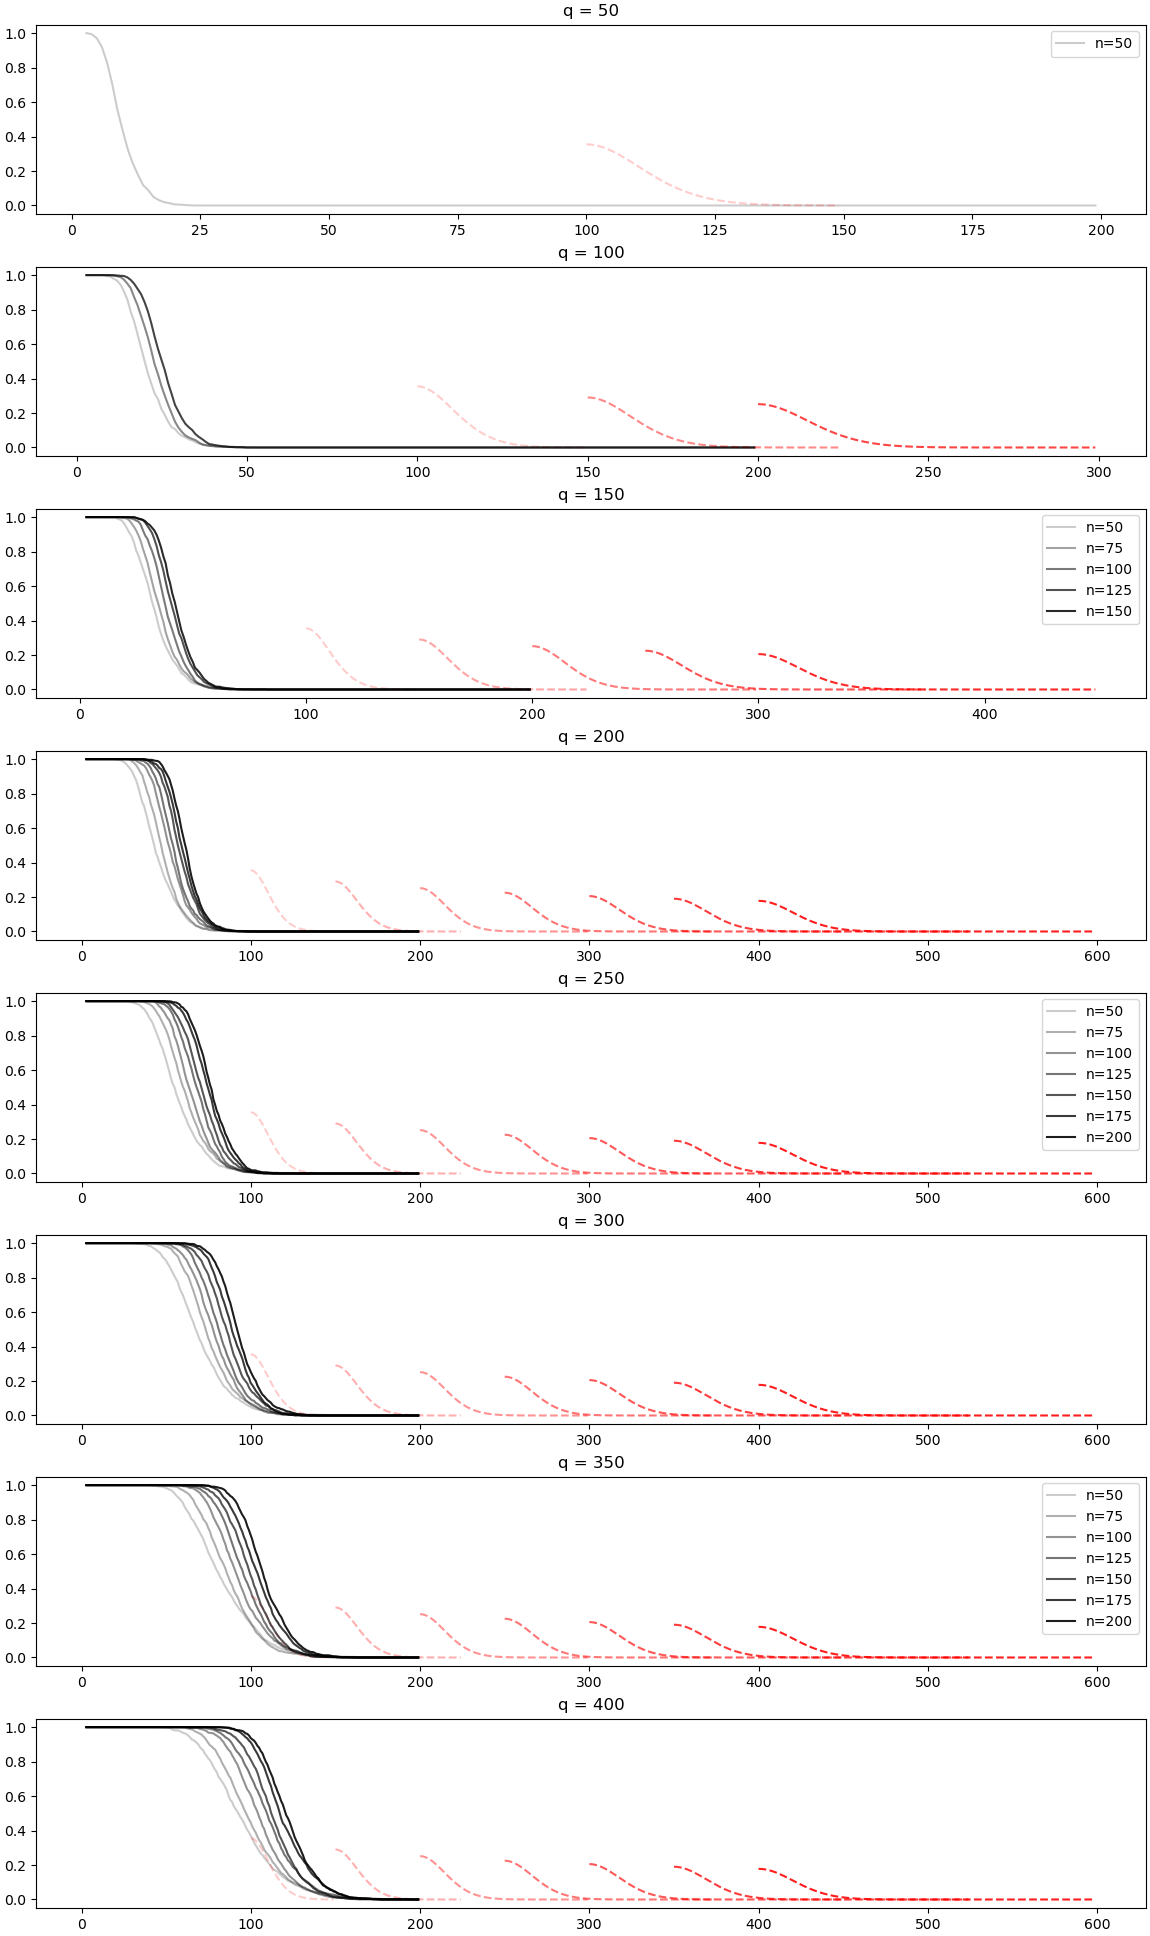

In [44]:
sns_d099 = {}
for q in q_list:
    sns_d099[q]=[(k[0],s[:,1]/2) for k,s in data_d099.items() if k[1]==q]
    

self_collection = {}
self_collection = dict([(q,[i[1] for i in sns_d099[q]]) for q in q_list])

min_v = min([min(j) for i in self_collection.values() for j in i])
max_v = max([max(j) for i in self_collection.values() for j in i])
print("At left, x abcisses are varying from ", min_v, " to ", max_v)

%matplotlib notebook
fig, axs = plt.subplots(8, 1, constrained_layout=True)
axs = axs.ravel()

for j, q in enumerate(q_list) :
    elem = self_collection[q]
    for i in range(0,len(elem),1):
        n = n_list[i]
        grid = np.arange(2*n,3*n,1)
        k = len(elem)
        def cum(x):
            F = np.array(sorted(elem[i]))
            return(sum(F<x)/len(F))
        def cum_tail(x):
            return(1-cum(x))
        axs[j].plot(np.arange(min_v,max_v,1), 
                 list(map(cum_tail, np.arange(min_v,max_v,1))), label="n="+str(n),
                color="black", alpha=0.2 + 0.8*(i/k))
        axs[j].set_title('q = '+str(q))
        axs[j].plot(grid, list(map(bnd_dict[n],grid)), linestyle="dashed", color="red", alpha=0.2 + 0.8*(i/k))
    if j%2==0: axs[j].legend(loc="upper right")

<IPython.core.display.Javascript object>


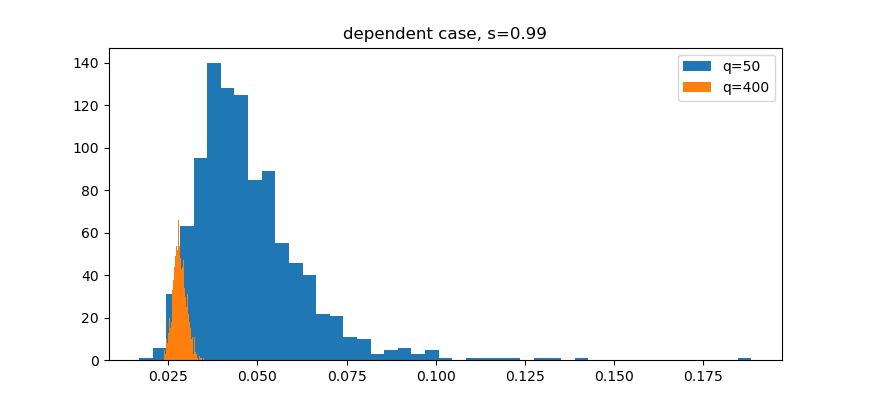

In [45]:
plt.hist(data_d099[list(data_d099.keys())[0]][:,5], bins=45, label="q=50")
plt.hist(data_d099[list(data_d099.keys())[-1]][:,5], bins=45, label="q=400")
plt.legend(loc="upper right")
plt.title("dependent case, s=0.99")
plt.show()

<IPython.core.display.Javascript object>


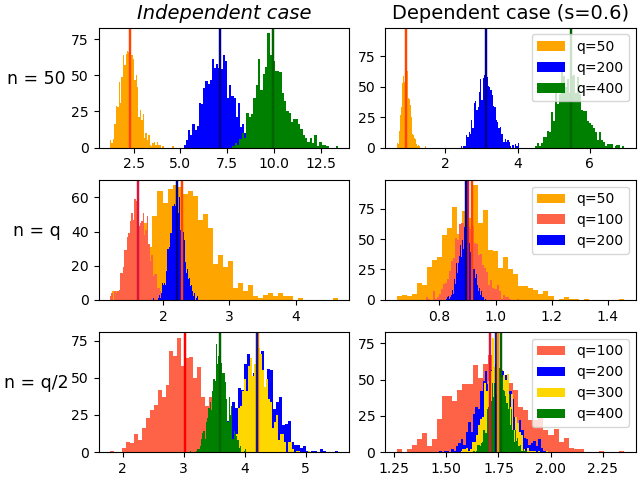

In [89]:
%matplotlib notebook
fig, axs = plt.subplots(3, 2, constrained_layout=True)
axs = axs.ravel()

axs[0].hist(data_i_d06[list(data_i_d06.keys())[0]][:,5], bins=45, label="q=50", color="orange")
axs[0].axvline(np.mean(data_i_d06[list(data_i_d06.keys())[0]][:,5]), color="orangered", alpha=1, linewidth=1.75)
axs[0].hist(data_i_d06[list(data_i_d06.keys())[3]][:,5], bins=45, label="q=200", color="blue")
axs[0].axvline(np.mean(data_i_d06[list(data_i_d06.keys())[3]][:,5]),  alpha=1, color="darkblue", linewidth=1.75)
axs[0].hist(data_i_d06[list(data_i_d06.keys())[7]][:,5], bins=45, label="q=400", color="green")
axs[0].axvline(np.mean(data_i_d06[list(data_i_d06.keys())[7]][:,5]), color="darkgreen", alpha=1, linewidth=1.75)
axs[0].set_ylabel('n = 50', rotation="horizontal", fontsize=12.5, labelpad=25)
axs[0].set_title('Independent case', style="italic", fontsize=14)
#axs[0].legend(loc="upper right")

axs[2].hist(data_i_d06[list(data_i_d06.keys())[0]][:,5], bins=45, label="q=50", color="orange")
axs[2].hist(data_i_d06[list(data_i_d06.keys())[15]][:,5], bins=45, label="q=100", color='tomato')
axs[2].hist(data_i_d06[list(data_i_d06.keys())[39]][:,5], bins=45, label="q=200", color="blue")
axs[2].axvline(np.mean(data_i_d06[list(data_i_d06.keys())[0]][:,5]), color="orangered", alpha=1, linewidth=1.75)
axs[2].axvline(np.mean(data_i_d06[list(data_i_d06.keys())[15]][:,5]), color="crimson", alpha=1, linewidth=1.75)
axs[2].axvline(np.mean(data_i_d06[list(data_i_d06.keys())[39]][:,5]), color="darkblue", alpha=1, linewidth=1.75)
axs[2].set_ylabel('n = q', rotation="horizontal", fontsize=12.5, labelpad=25)
#axs[2].legend(loc="upper right")

axs[4].hist(data_i_d06[list(data_i_d06.keys())[1]][:,5], bins=45, label="q=100", color='tomato')
axs[4].hist(data_i_d06[list(data_i_d06.keys())[17]][:,5], bins=45, label="q=200", color="blue")
axs[4].hist(data_i_d06[list(data_i_d06.keys())[31]][:,5], bins=45, label="q=300", color="gold")
axs[4].hist(data_i_d06[list(data_i_d06.keys())[43]][:,5], bins=45, label="q=400", color="green")
axs[4].axvline(np.mean(data_i_d06[list(data_i_d06.keys())[1]][:,5]), color="red", alpha=1, linewidth=1.75)

axs[4].axvline(np.mean(data_i_d06[list(data_i_d06.keys())[31]][:,5])+.01, color="darkorange", alpha=1, linewidth=1.75)
axs[4].axvline(np.mean(data_i_d06[list(data_i_d06.keys())[17]][:,5])-.01, color="darkblue", alpha=.9, linewidth=1.75)
axs[4].axvline(np.mean(data_i_d06[list(data_i_d06.keys())[43]][:,5]), color="darkgreen", alpha=1, linewidth=1.75)
axs[4].set_ylabel('n = q/2', rotation="horizontal", fontsize=12.5, labelpad=25)
#axs[4].legend(loc="upper right")

axs[1].hist(data_d06[list(data_d06.keys())[0]][:,5], bins=45, label="q=50", color="orange")
axs[1].hist(data_d06[list(data_d06.keys())[3]][:,5], bins=45, label="q=200", color="blue")
axs[1].hist(data_d06[list(data_d06.keys())[7]][:,5], bins=45, label="q=400", color="green")
axs[1].axvline(np.mean(data_d06[list(data_d06.keys())[0]][:,5]), color="orangered", alpha=1, linewidth=1.75)
axs[1].axvline(np.mean(data_d06[list(data_d06.keys())[3]][:,5]), color="darkblue", alpha=1, linewidth=1.75)
axs[1].axvline(np.mean(data_d06[list(data_d06.keys())[7]][:,5]), color="darkgreen", alpha=1, linewidth=1.75)
axs[1].legend(loc="upper right")
axs[1].set_title('Dependent case (s=0.6)', fontsize=14)

axs[3].hist(data_d06[list(data_d06.keys())[0]][:,5], bins=45, label="q=50", color="orange")
axs[3].hist(data_d06[list(data_d06.keys())[15]][:,5], bins=45, label="q=100", color='tomato')
axs[3].hist(data_d06[list(data_d06.keys())[39]][:,5], bins=45, label="q=200", color="blue")
axs[3].axvline(np.mean(data_d06[list(data_d06.keys())[0]][:,5]), color="orangered", alpha=1, linewidth=1.75)
axs[3].axvline(np.mean(data_d06[list(data_d06.keys())[15]][:,5]), color="crimson", alpha=1, linewidth=1.75)
axs[3].axvline(np.mean(data_d06[list(data_d06.keys())[39]][:,5])-.0001, color="darkblue", alpha=1, linewidth=1.75)
axs[3].legend(loc="upper right")

axs[5].hist(data_d06[list(data_d06.keys())[1]][:,5], bins=45, label="q=100", color='tomato')
axs[5].hist(data_d06[list(data_d06.keys())[17]][:,5], bins=45, label="q=200", color="blue")
axs[5].hist(data_d06[list(data_d06.keys())[31]][:,5], bins=45, label="q=300", color="gold")
axs[5].hist(data_d06[list(data_d06.keys())[43]][:,5], bins=45, label="q=400", color="green")
axs[5].axvline(np.mean(data_d06[list(data_d06.keys())[1]][:,5]), color="crimson", alpha=1, linewidth=1.75)
axs[5].axvline(np.mean(data_d06[list(data_d06.keys())[17]][:,5]), color="darkblue", alpha=.9, linewidth=1.75)
axs[5].axvline(np.mean(data_d06[list(data_d06.keys())[31]][:,5]), color="darkorange", alpha=1, linewidth=1.75)
axs[5].axvline(np.mean(data_d06[list(data_d06.keys())[43]][:,5])+.005, color="darkgreen", alpha=1, linewidth=1.75)
axs[5].legend(loc="upper right")
#plt.title("rho = dependent case, s=0.6, n=2q")

#handles, labels = axs.get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper center')
plt.show()